<div style="display:fill;
            border-radius:15px;
            background-color:pink;
            font-size:210%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:Red;
            border-style: solid;
            border-color: red;
            text-align:center;">
<b> Project Title: </b> Development of a Personalized Predictive Model for Identifying Individual Patient Risk Factors for Fatigue Based on Physiological Data
</div>

<blockquote style="margin-right:auto; margin-left:auto; background-color: cyan; padding: 1em; margin:2px;font-size:18px;font-family:Comic Sans Ms;color:Black;letter-spacing:0.7px;text-align: justify;">

## Research Objective
The main objective of this research is to create a personalized predictive model that can predict fatigue( both mental and physical) and identify specific risk factors for fatigue in individual patients. This will be accomplished through the analysis of physiological data.

### Scope of Research
Our study will primarily focus on the evaluation of four classification algorithms:

- Random Forest
- XGBoost Classifier
- Combined Random Forest and XGBoost Classifier on Voting and Stacking
- Convolutional Neural Networks (CNN) and 
- Artificial Neural Networks (ANN) for deep learning

These algorithms will be tested using a secondary dataset of physiological data. The assessment of the models will be based on several performance metrics, including accuracy, precision, recall, F1-score.



<blockquote style="margin-right:auto; margin-left:auto; background-color: #FAFAD2; padding: 1em; margin:1.5px;font-size:15px;font-family:Comic Sans Ms;color:#660000;letter-spacing:0.7px;text-align: justify;">

**Steps:**

1. Load the necessary packages.
2. Perform data preprocessing, cleaning, and exploratory data analysis.
3. Load and combine datasets.
4. Transform the data and engineer features.
5. Aggregate and merge the data.
6. Perform exploratory data analysis (EDA) using visualizations.

**Data Preparation for Model Implementation:**

* Rename columns and handle missing values.
* Handle categorical variables.
* Perform data aggregation and mean computation.
* Perform data mapping and grouping.
* Generate visualizations to visualize various parameters.
* Merge dataframes and convert data types.
* Fill missing values.
* Perform data mapping and conversion.

**Model Building and Evaluation:**

* **Random Forest:** Split the dataset into train and validation sets. Perform hyperparameter tuning using GridSearchCV. Evaluate the model on the validation set using accuracy, weighted precision, recall, and F1 score.
* **XGBoost Classifier:** Use Optuna to find the best parameters for the XGBoost model. Train the model using the best parameters and evaluate its performance on the validation set.
* **Voting and Stacking:** Create voting and stacking classifiers for physical and mental fatigue. Evaluate the performance of the classifiers using various metrics, including accuracy, precision, recall, and F1 score.
* **Convolutional Neural Networks (CNN):** Build two separate CNN models for predicting physical and mental fatigue. Preprocess and reshape the data to fit the CNN model requirements. Tune the hyperparameters using Kerastuner's RandomSearch. Train the models with the best hyperparameters and evaluate their performance on the validation set using various metrics, including accuracy, precision, recall, F1 score, and mean squared error.
* **Artificial Neural Networks (ANN):** Build two distinct ANN models for the prediction of physical and mental fatigue. Prepare and reshape the data to match the input requirements of the ANN models. Build the models using the Keras library and evaluate their performance on the validation set using various metrics.


** Draw conclusions and identify next steps.




<span class="label label-default" style="background-color:green; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; "><b> Step 1. Load the necessary packages</b></span>

In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import xgboost as xgb
import tensorflow as tf
import datetime 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import layers, models
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Import additional libraries
import time

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import plot_tree
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from optuna.visualization import plot_optimization_history, plot_intermediate_values
from datetime import date

# Import for machine learning models
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier


<blockquote style="margin-right:auto; margin-left:auto; background-color: cyan; padding: 1em; margin:2px;font-size:18px;font-family:Comic Sans Ms;color:Black;letter-spacing:0.7px;text-align: justify;">

## Step 2: Data Preprocessing, Cleaning, and Exploratory Data Analysis
- In this step, the following tasks will be undertaken:

- Data Preprocessing: Transformation and normalization of raw data into a format suitable for analysis.
- Data Cleaning: Removal of any inconsistencies, missing values, or outliers in the dataset.
- Exploratory Data Analysis (EDA): Examination of the dataset through various statistical and visualization techniques to identify patterns, trends, and potential relationships between variables.





In [2]:



seed = 42

# Load the CSV files into dataframes
fatigue = pd.read_csv("c:/Users/hp/Downloads/fatiguePROs.csv")
demo = pd.read_csv("C:/Users/hp/Downloads/demo.csv")

# Define a function to read CSV files from a directory
def read_csv_folder(directory_path):
    dataframes = []  # Initialize an empty list to store dataframes
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)  # Construct the complete file path
        if file_path.endswith(".csv"):  # Check if the file is a CSV file
            df = pd.read_csv(file_path)  # Read the CSV file into a dataframe
            df['Source'] = os.path.splitext(filename)[0]  # Add a column indicating the source dataset
            dataframes.append(df)  # Append the dataframe to the list
    return pd.concat(dataframes, ignore_index=True)  # Concatenate all dataframes into a single dataframe

# Example usage of the function
directory_path ="C:/Users/hp/Downloads/4266157"  # Specify the path to the folder containing CSV files
combined_df = read_csv_folder(directory_path)  # Read and combine all CSV files in the specified directory
combined_df.rename(columns={'Source': 'SubjectID'}, inplace=True)  # Rename the 'Source' column to 'SubjectID'

from IPython.display import display
display('fatigue Pro',fatigue,
       "Demographipic Data",demo,
       "Continuous multi-sensor wearable data",combined_df)

'fatigue Pro'

SubjectID        DateTime Timezone  \
0             1  14.03.19 20:01      UTC   
1             1  14.03.19 20:01      UTC   
2             1  14.03.19 20:01      UTC   
3             1  14.03.19 20:01      UTC   
4             1  14.03.19 20:01      UTC   
...         ...             ...      ...   
2266         28  16.08.18 00:51     CEST   
2267         28  16.08.18 00:52     CEST   
2268         28  16.08.18 00:52     CEST   
2269         28  16.08.18 00:52     CEST   
2270         28  16.08.18 00:52     CEST   

                                            PROquestion  PROanswer_value  \
0     Describe fatigue on a scale of 1 to 10, where ...              2.0   
1     Are you feeling better, worse or the same as y...              NaN   
2     Physically, today how often did you feel exhau...              NaN   
3     Mentally, today how often did you feel exhausted?              NaN   
4                               Did you do sport today?              NaN   
...                                                 ...              ...   
2266  Mentally, today how often did you feel exhausted?              NaN   
2267  Describe fatigue on a scale of 1 to 10, where ...              4.0   
2268  Are you feeling better, worse or the same as y...              NaN   
2269  Physically, today how often did you feel exhau...              NaN   
2270  Mentally, today how often did you feel exhausted?              NaN   

     PROanswer_choice  
0                 NaN  
1               Worse  
2               Never  
3           Sometimes  
4                  No  
...               ...  
2266        Sometimes  
2267              NaN  
2268           Better  
2269            Never  
2270        Sometimes  

[2271 rows x 6 columns]

'Demographipic Data'

Subject No. Age range   Gender
0             1     36-45        M
1             2     36-45        M
2             3     36-45        M
3             4     36-45        F
4             5     36-45        F
5             6     46-55        F
6             7     36-45        M
7             8     46-55        M
8             9     36-45        M
9            10     36-45        F
10           11     36-45        F
11           12     46-55        F
12           13     46-55        M
13           14     36-45        F
14           15     46-55        F
15           16     26-35        F
16           17     46-55        M
17           18     46-55        M
18           19     36-45        M
19           20     46-55        M
20           21     46-55        M
21           22   unknown  unknown
22           23     26-35        F
23           24     26-35        M
24           25     46-55        M
25           26     26-35        M
26           27     36-45        F
27           28     26-35        M

'Continuous multi-sensor wearable data'

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0        14.03.19 14:38        0.784314     981.25           0.000   
1        14.03.19 14:39        1.176471     981.20           0.175   
2        14.03.19 14:40        2.352941     981.20           0.190   
3        14.03.19 14:41        1.176471     981.10           0.110   
4        14.03.19 14:42        1.176471     981.20           0.100   
...                 ...             ...        ...             ...   
1355470  13.05.19 09:54        2.352941    1000.60           0.325   
1355471  13.05.19 09:55        7.450980    1000.40           0.385   
1355472  13.05.19 09:56        3.529412    1000.40           0.440   
1355473  13.05.19 09:57        0.784314    1000.35           0.475   
1355474  13.05.19 09:58       11.372549    1000.40           0.710   

         BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0                  0.00         753.636566                   NaN  83.000000   
1                  1.90        1256.060944                   NaN  75.403633   
2                  1.82        1256.060944                   NaN  69.112653   
3                  1.94        1256.060944                   NaN  69.781164   
4                  1.68        1256.060944                   NaN  72.306609   
...                 ...                ...                   ...        ...   
1355470            2.30        1649.145098                   NaN  78.681343   
1355471            2.16        1479.952673                   NaN  74.764512   
1355472            2.56        1482.794317                   NaN  76.447207   
1355473            2.04        1356.516672                   NaN  69.102764   
1355474            1.58        1042.613398                   NaN  58.603489   

         HRV       RESP  Steps  SkinTemperature    SubjectID  ActivityClass  \
0        NaN        NaN    0.0           28.280  subjectID_1            NaN   
1        NaN        NaN    0.0           29.440  subjectID_1            NaN   
2        NaN  14.562500    0.0           30.410  subjectID_1            NaN   
3        NaN  12.175528    0.0           31.000  subjectID_1            NaN   
4        NaN  12.531234    0.0           31.455  subjectID_1            NaN   
...      ...        ...    ...              ...          ...            ...   
1355470  NaN        NaN  103.0           32.765  subjectID_9            NaN   
1355471  NaN  16.864421   16.0           32.440  subjectID_9            NaN   
1355472  NaN  19.536303   91.0           32.310  subjectID_9            NaN   
1355473  NaN  16.578595   13.0           32.280  subjectID_9            NaN   
1355474  NaN  14.363160    0.0           32.440  subjectID_9            NaN   

         SkinTemperature.Value  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
...                        ...  
1355470                    NaN  
1355471                    NaN  
1355472                    NaN  
1355473                    NaN  
1355474                    NaN  

[1355475 rows x 15 columns]

In [3]:
display("# to know the information about the dataset",fatigue.info(),
       demo.info(),
       combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SubjectID         2271 non-null   int64  
 1   DateTime          2271 non-null   object 
 2   Timezone          2271 non-null   object 
 3   PROquestion       2271 non-null   object 
 4   PROanswer_value   525 non-null    float64
 5   PROanswer_choice  1733 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 106.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Subject No.  28 non-null     int64 
 1   Age range    28 non-null     object
 2   Gender       28 non-null     object
dtypes: int64(1), object(2)
memory usage: 804.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355475 entries, 0 to 1355474
Data columns

'# to know the information about the dataset'

None

None

None

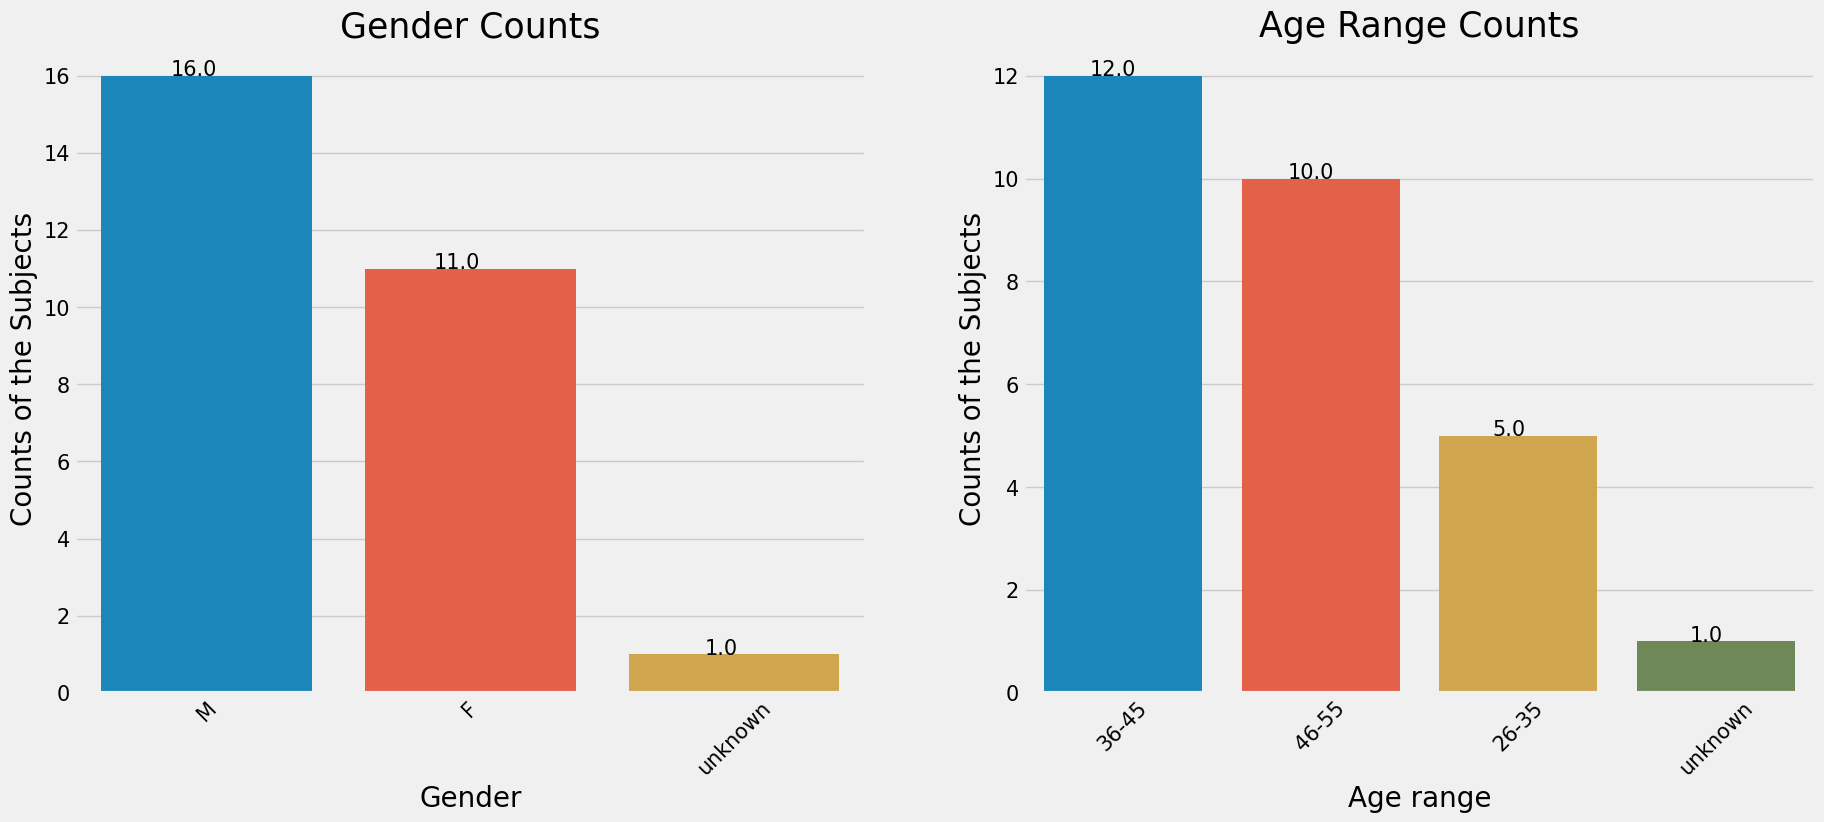

In [4]:
# Create subplots for Gender and Age range
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for Gender
ax1 = sns.countplot(x='Gender', data=demo, ax=axes[0])  # Create a count plot for Gender
for p in ax1.patches:  # Annotate each bar with its count value
    ax1.annotate(f'\n{p.get_height()}', (p.get_x() + 0.35, p.get_height()), ha='center', va='baseline', color='black', size=15)
ax1.set_title("Gender Counts", size=25)  # Set the title for the plot
ax1.set_xlabel("Gender", size=20)  # Set the label for the x-axis
ax1.set_ylabel("Counts of the Subjects", size=20)  # Set the label for the y-axis
ax1.tick_params(axis='x', rotation=45, labelsize=15)  # Set the properties for the x-axis ticks
ax1.tick_params(axis='y', labelsize=15)  # Set the properties for the y-axis ticks

# Plot for Age range
ax2 = sns.countplot(x='Age range', data=demo, ax=axes[1])  # Create a count plot for Age range
for p in ax2.patches:  # Annotate each bar with its count value
    ax2.annotate(f'\n{p.get_height()}', (p.get_x() + 0.35, p.get_height()), ha='center', va='baseline', color='black', size=15)
ax2.set_title("Age Range Counts", size=25)  # Set the title for the plot
ax2.set_xlabel("Age range", size=20)  # Set the label for the x-axis
ax2.set_ylabel("Counts of the Subjects", size=20)  # Set the label for the y-axis
ax2.tick_params(axis='x', rotation=45, labelsize=15)  # Set the properties for the x-axis ticks
ax2.tick_params(axis='y', labelsize=15)  # Set the properties for the y-axis ticks

# Display the plots
plt.show()


<blockquote style="margin-right:auto; margin-left:auto; background-color: #FAFAD2; padding: 1em; margin:1.5px;font-size:15px;font-family:Comic Sans Ms;color:#660000;letter-spacing:0.7px;text-align: justify;">
 According to the graph, the demographic data indicates that there are 16 males, 11 females, and 1 individual with unknown gender. In terms of age distribution, there are 12 individuals in the 36-45 age range, 10 individuals in the 46-55 age range, 5 individuals in the 26-35 age range, and 1 individual with an unknown age.

In [5]:

# Replacing unknown values in 'Age range' with mode
age_mode = demo['Age range'].mode()[0]
demo['Age range'].replace('unknown', age_mode, inplace=True)

# Replacing unknown values in 'Gender' with mode
gender_mode = demo['Gender'].mode()[0]
demo['Gender'].replace('unknown', gender_mode, inplace=True)

print(demo)

    Subject No. Age range Gender
0             1     36-45      M
1             2     36-45      M
2             3     36-45      M
3             4     36-45      F
4             5     36-45      F
5             6     46-55      F
6             7     36-45      M
7             8     46-55      M
8             9     36-45      M
9            10     36-45      F
10           11     36-45      F
11           12     46-55      F
12           13     46-55      M
13           14     36-45      F
14           15     46-55      F
15           16     26-35      F
16           17     46-55      M
17           18     46-55      M
18           19     36-45      M
19           20     46-55      M
20           21     46-55      M
21           22     36-45      M
22           23     26-35      F
23           24     26-35      M
24           25     46-55      M
25           26     26-35      M
26           27     36-45      F
27           28     26-35      M


In [6]:
# Copy the 'fatigue' DataFrame to 'df'
df = fatigue.copy()

# Combine 'PROanswer_value' and 'PROanswer_choice' into 'Combined_Answer' column, filling missing values
df['Combined_Answer'] = df['PROanswer_value'].fillna(df['PROanswer_choice'])

# Drop the 'PROanswer_value' and 'PROanswer_choice' columns
df = df.drop(['PROanswer_value', 'PROanswer_choice'], axis=1)

# Drop rows with missing values in 'Combined_Answer'
df = df.dropna(subset=['Combined_Answer'])

# Replace values in the 'PROquestion' column with shorter labels
df['PROquestion'].replace({
    'Describe fatigue on a scale of 1 to 10, where 1 means you don’t feel tired at all and 10 means the worst tiredness you can imagine': 'VAS',
    'Are you feeling better, worse or the same as yesterday?': 'RelP',
    'Physically, today how often did you feel exhausted?': 'PhF',
    'Mentally, today how often did you feel exhausted?': 'MF',
    'Did you do sport today?': 'sport'
}, inplace=True)

# Create new columns for each 'PROquestion' with values from 'Combined_Answer'
df['VAS'] = df['Combined_Answer'].where(df['PROquestion'] == 'VAS')
df['RelP'] = df['Combined_Answer'].where(df['PROquestion'] == 'RelP')
df['PhF'] = df['Combined_Answer'].where(df['PROquestion'] == 'PhF')
df['MF'] = df['Combined_Answer'].where(df['PROquestion'] == 'MF')
df['sport'] = df['Combined_Answer'].where(df['PROquestion'] == 'sport')

# Drop the specified columns
df = df.drop(columns=['PROquestion', 'Combined_Answer'])

# Reset the index of the DataFrame
df = df.reset_index()

# Convert the 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Group the data by 'DateTime' and 'Timezone' and aggregate other columns
aggregated_data = df.groupby(['DateTime', 'Timezone']).agg({
    'SubjectID': 'first',
    'VAS': 'first',
    'RelP': 'first',
    'PhF': 'first',
    'MF': 'first',
    'sport': 'first'
}).reset_index()

# Display the first few rows of the aggregated data
aggregated_data.head()


DateTime Timezone  SubjectID  VAS    RelP        PhF         MF  \
0 2017-12-13 21:00:00      CET         24  7.0   Worse  Regularly      Often   
1 2017-12-14 21:00:00      CET         24  6.0  Better  Regularly      Often   
2 2017-12-15 21:00:00      CET         24  5.0    Same  Regularly  Regularly   
3 2017-12-16 21:00:00      CET         24  5.0  Better  Sometimes  Sometimes   
4 2017-12-17 21:00:00      CET         24  4.0  Better  Sometimes  Sometimes   

  sport  
0  None  
1  None  
2  None  
3  None  
4  None

In [7]:
# Rename the 'Subject No.' column to 'SubjectID' in the 'demo' dataframe
demo.rename(columns={'Subject No.': 'SubjectID'}, inplace=True)

# Merge the two DataFrames on the 'SubjectID' column
merged_data = pd.merge(aggregated_data, demo, on='SubjectID', how='inner')

# Display the merged DataFrame
merged_data


DateTime Timezone  SubjectID  VAS    RelP        PhF  \
0   2017-12-13 21:00:00      CET         24  7.0   Worse  Regularly   
1   2017-12-14 21:00:00      CET         24  6.0  Better  Regularly   
2   2017-12-15 21:00:00      CET         24  5.0    Same  Regularly   
3   2017-12-16 21:00:00      CET         24  5.0  Better  Sometimes   
4   2017-12-17 21:00:00      CET         24  4.0  Better  Sometimes   
..                  ...      ...        ...  ...     ...        ...   
474 2019-12-06 20:29:00      UTC         14  3.0  Better  Sometimes   
475 2019-06-15 20:02:00      UTC         20  6.0  Better  Regularly   
476 2019-06-17 21:58:00      UTC         20  8.0  Better  Sometimes   
477 2019-06-18 22:29:00      UTC         20  6.0   Worse  Regularly   
478 2019-06-21 07:09:00      UTC         20  6.0    Same  Regularly   

            MF sport Age range Gender  
0        Often  None     26-35      M  
1        Often  None     26-35      M  
2    Regularly  None     26-35      M  
3    Sometimes  None     26-35      M  
4    Sometimes  None     26-35      M  
..         ...   ...       ...    ...  
474  Sometimes    No     36-45      F  
475  Regularly   Yes     46-55      M  
476  Sometimes    No     46-55      M  
477  Regularly   Yes     46-55      M  
478  Sometimes    No     46-55      M  

[479 rows x 10 columns]

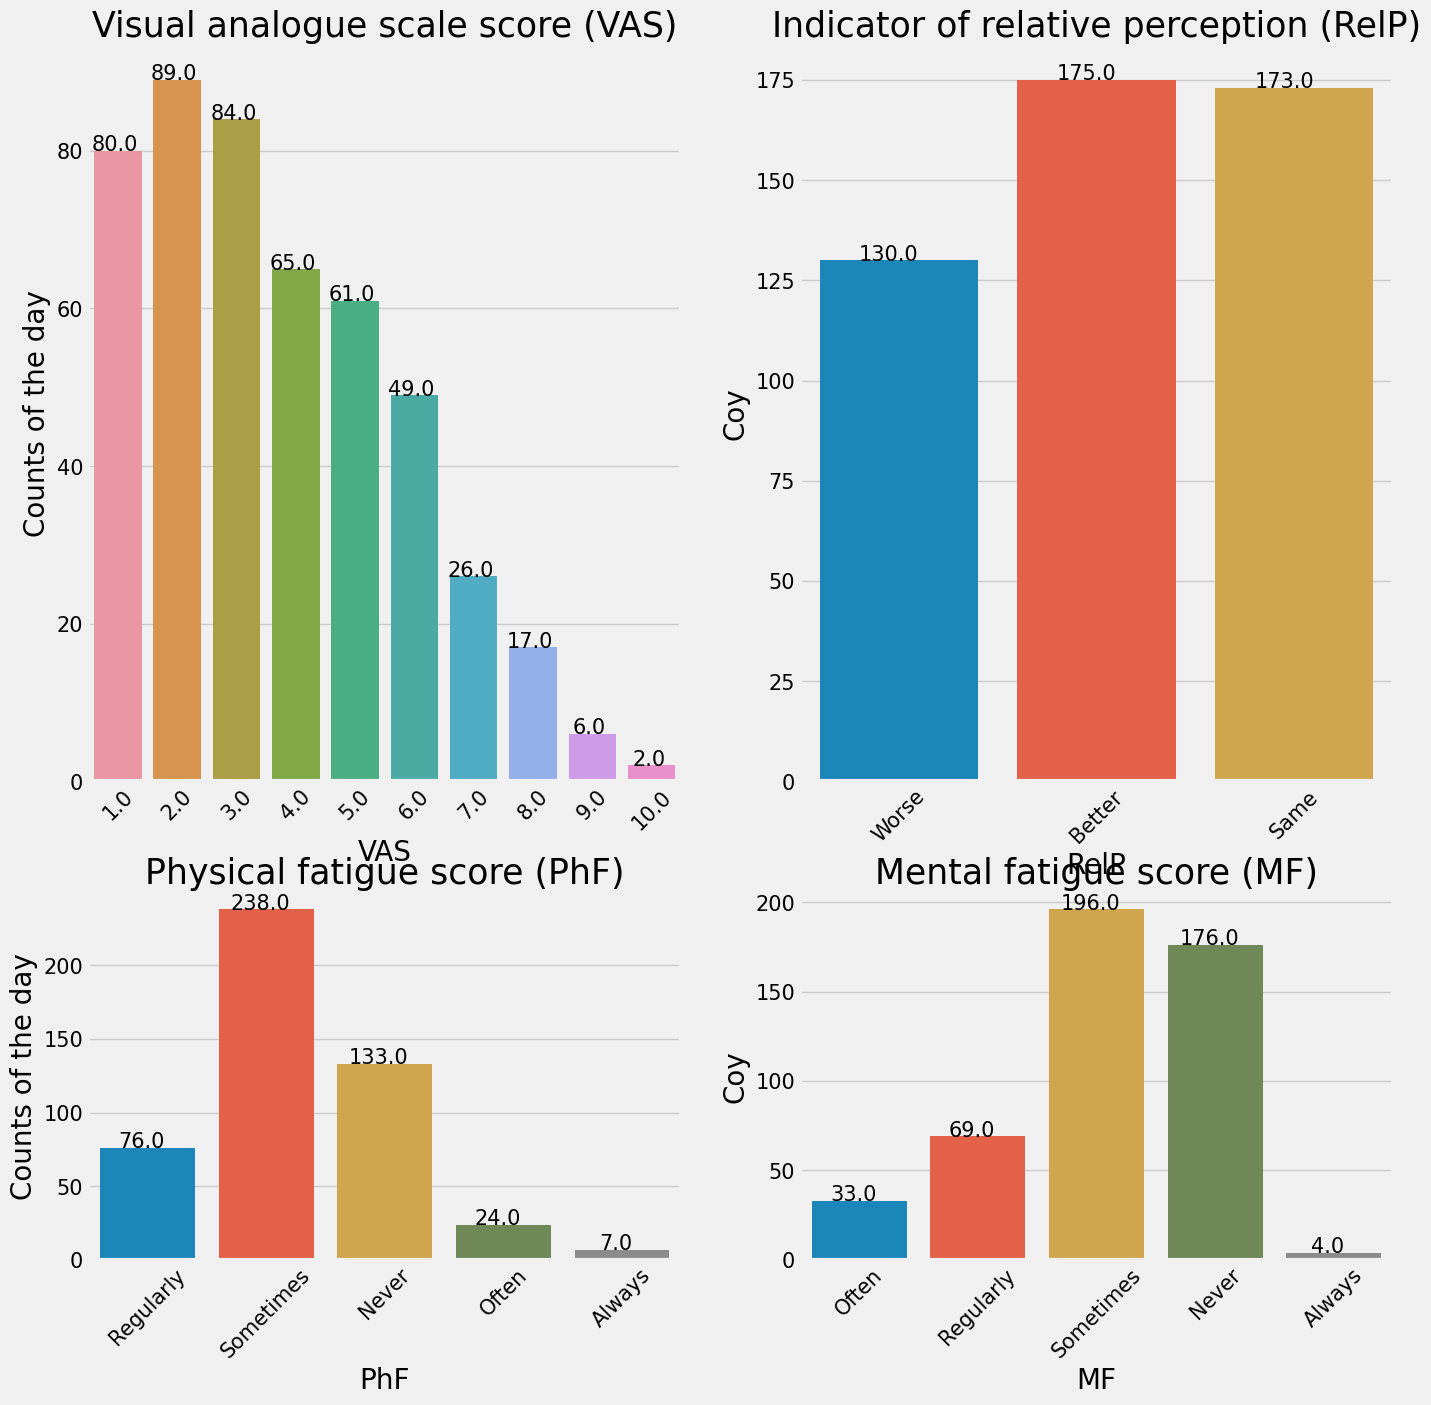

In [8]:

# Create a 2x2 grid of subplots with adjusted height ratios
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1])

# Define the column names and corresponding titles
columns_and_titles = {
    'VAS': "Visual analogue scale score (VAS)",
    'RelP': "Indicator of relative perception (RelP)",
    "PhF": "Physical fatigue score (PhF)",
    'MF': "Mental fatigue score (MF)",
}

# Loop through the columns and titles
for i, (column, title) in enumerate(columns_and_titles.items()):
    ax = fig.add_subplot(gs[i])
    sns.countplot(x=column, data=merged_data, ax=ax)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.35, p.get_height()), ha='center', va='baseline', color='black', size=15)
    ax.set_title(title, size=25)
    ax.set_xlabel(column, size=20)
    ax.set_ylabel("Counts of the day" if i % 2 == 0 else "Coy", size=20)
    ax.tick_params(axis='x', rotation=45, labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

plt.show()


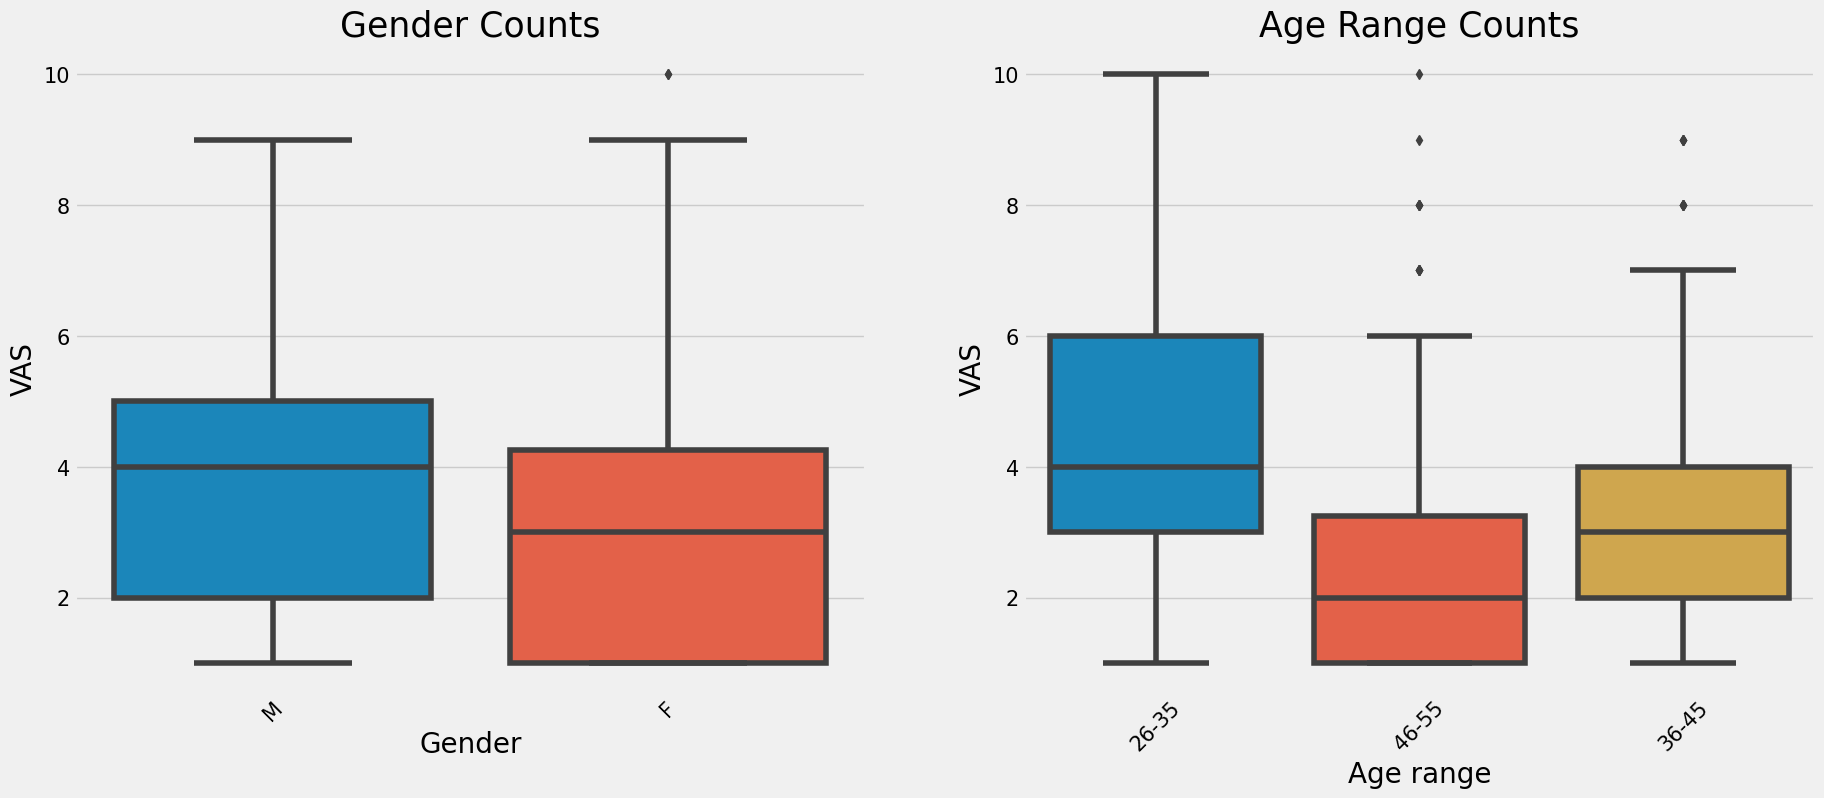

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))

# Plot for Gender and VAS
ax1 = sns.boxplot(x='Gender', y="VAS", data=merged_data, ax=axes[0])
ax1.set_title("Gender Counts", size=25)
ax1.set_xlabel("Gender", size=20)
ax1.set_ylabel("VAS", size=20)
ax1.tick_params(axis='x', rotation=45, labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

# Plot for Age range and VAS 
ax2 = sns.boxplot(x='Age range', y="VAS", data=merged_data, ax=axes[1])
ax2.set_title("Age Range Counts", size=25)
ax2.set_xlabel("Age range", size=20)
ax2.set_ylabel("VAS", size=20)
ax2.tick_params(axis='x', rotation=45, labelsize=15)
ax2.tick_params(axis='y', labelsize=15)

plt.show()


<blockquote style="margin-right:auto; margin-left:auto; background-color: #FAFAD2; padding: 1em; margin:1.5px;font-size:15px;font-family:Comic Sans Ms;color:#660000;letter-spacing:0.7px;text-align: justify;">

## Documentation of Dataset Columns

1. **Sensor Parameter:**
   - **Description:** Indicates the specific sensor used for data collection.
   - **Unit:** N/A

2. **Accelerometer:**
   - **ActivityClass:**
     - Categorical parameter indicating the type of physical activity:
       - 0: Undefined
       - 1: Resting
       - 9: Other
       - 10: Biking
       - 11: Running
       - 12: Walking
   - **ActivityCounts:**
     - The activity value indicates the intensity of motion (activity).
   - **Steps:**
     - Number of steps.
   - **Energy Expenditure:**
     - Amount of energy a person uses to complete all regular bodily functions, measured in calories.
   - **Calories:**
     - The amount of calories expended.

3. **Photoplethysmography:**
   - **HR (Heart Rate):**
     - The rate at which the heart beats.
     - **Unit:** bpm (beats per minute).
   - **HRV (Heart Rate Variability):**
     - Indicates the beat-to-beat variations in heart rate.
     - **Unit:** ms (milliseconds).
   - **RESP (Respiration Rate):**
     - The number of breaths a person takes per minute.
     - **Unit:** bpm (breaths per minute).
   - **Blood Perfusion:**
     - The change in blood volume percentage in local tissue resulting from a heartbeat.
   - **Blood Pulse Wave Temperature:**
     - Skin temperature measured during the pulse wave generated by blood ejection when the heart contracts.
     - **Unit:** "C (degrees Celsius).

4. **Galvanic Skin Response:**
   - **Galvanic Skin Response (GSR):**
     - Describes changes in the electrical conductivity of the skin, serving as a measure of emotional arousal.
     - **Unit:** kOhm (kiloohms).

5. **Barometer:**
   - **Barometer:**
     - Measures changes in barometric pressure, often indicating changes in altitude.
     - **Unit:** mbar (millibars).

Additional Abbreviations: HR (Heart Rate), HRV (Heart Rate Variability), RESP (Respiration Rate), SD (Standard Deviation), Max (Maximum), PSD (Power Spectral Density).

In [10]:
# Rename the 'Source' column to 'SubjectID' in the 'combined_df' dataframe
combined_df.rename(columns={'Source': 'SubjectID'}, inplace=True)

# Drop rows from the DataFrame with at least 3 non-NA values
combined_df = combined_df.dropna(axis=0, thresh=3)

# Replace missing values in the 'ActivityClass' column with 0
combined_df['ActivityClass'].fillna(0, inplace=True)

# Mapping dictionary for 'ActivityClass' values
mapping_dict = {0: 'undefined', 1: 'resting', 9: 'other', 10: 'biking', 11: 'running', 12: 'walking'}
combined_df['ActivityClass'] = combined_df['ActivityClass'].replace(mapping_dict)

# Print the unique values in the 'ActivityClass' column
print(combined_df["ActivityClass"].unique())


['undefined' 'resting' 'biking' 'running' 'walking' 'other']


In [11]:
combined_df.head()

Timestamp  ActivityCounts  Barometer  BloodPerfusion  BloodPulseWave  \
0  14.03.19 14:38        0.784314     981.25           0.000            0.00   
1  14.03.19 14:39        1.176471     981.20           0.175            1.90   
2  14.03.19 14:40        2.352941     981.20           0.190            1.82   
3  14.03.19 14:41        1.176471     981.10           0.110            1.94   
4  14.03.19 14:42        1.176471     981.20           0.100            1.68   

   EnergyExpenditure  GalvanicSkinResponse         HR  HRV       RESP  Steps  \
0         753.636566                   NaN  83.000000  NaN        NaN    0.0   
1        1256.060944                   NaN  75.403633  NaN        NaN    0.0   
2        1256.060944                   NaN  69.112653  NaN  14.562500    0.0   
3        1256.060944                   NaN  69.781164  NaN  12.175528    0.0   
4        1256.060944                   NaN  72.306609  NaN  12.531234    0.0   

   SkinTemperature    SubjectID ActivityClass  SkinTemperature.Value  
0           28.280  subjectID_1     undefined                    NaN  
1           29.440  subjectID_1     undefined                    NaN  
2           30.410  subjectID_1     undefined                    NaN  
3           31.000  subjectID_1     undefined                    NaN  
4           31.455  subjectID_1     undefined                    NaN

In [12]:
combined_df.describe().round(2).T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["min",], color='green')\
                     .bar(subset=["mean",], color='Orange')\
                     .bar(subset=['std'], color='pink')\
                     .bar(subset=['50%'], color='magenta')

In [13]:

combined_df1=combined_df.copy()

# Print the updated DataFrame
print(combined_df)


              Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0        14.03.19 14:38        0.784314     981.25           0.000   
1        14.03.19 14:39        1.176471     981.20           0.175   
2        14.03.19 14:40        2.352941     981.20           0.190   
3        14.03.19 14:41        1.176471     981.10           0.110   
4        14.03.19 14:42        1.176471     981.20           0.100   
...                 ...             ...        ...             ...   
1355470  13.05.19 09:54        2.352941    1000.60           0.325   
1355471  13.05.19 09:55        7.450980    1000.40           0.385   
1355472  13.05.19 09:56        3.529412    1000.40           0.440   
1355473  13.05.19 09:57        0.784314    1000.35           0.475   
1355474  13.05.19 09:58       11.372549    1000.40           0.710   

         BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0                  0.00         753.636566                   NaN  83.000000   
1

In [14]:
combined_df

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0        14.03.19 14:38        0.784314     981.25           0.000   
1        14.03.19 14:39        1.176471     981.20           0.175   
2        14.03.19 14:40        2.352941     981.20           0.190   
3        14.03.19 14:41        1.176471     981.10           0.110   
4        14.03.19 14:42        1.176471     981.20           0.100   
...                 ...             ...        ...             ...   
1355470  13.05.19 09:54        2.352941    1000.60           0.325   
1355471  13.05.19 09:55        7.450980    1000.40           0.385   
1355472  13.05.19 09:56        3.529412    1000.40           0.440   
1355473  13.05.19 09:57        0.784314    1000.35           0.475   
1355474  13.05.19 09:58       11.372549    1000.40           0.710   

         BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0                  0.00         753.636566                   NaN  83.000000   
1                  1.90        1256.060944                   NaN  75.403633   
2                  1.82        1256.060944                   NaN  69.112653   
3                  1.94        1256.060944                   NaN  69.781164   
4                  1.68        1256.060944                   NaN  72.306609   
...                 ...                ...                   ...        ...   
1355470            2.30        1649.145098                   NaN  78.681343   
1355471            2.16        1479.952673                   NaN  74.764512   
1355472            2.56        1482.794317                   NaN  76.447207   
1355473            2.04        1356.516672                   NaN  69.102764   
1355474            1.58        1042.613398                   NaN  58.603489   

         HRV       RESP  Steps  SkinTemperature    SubjectID ActivityClass  \
0        NaN        NaN    0.0           28.280  subjectID_1     undefined   
1        NaN        NaN    0.0           29.440  subjectID_1     undefined   
2        NaN  14.562500    0.0           30.410  subjectID_1     undefined   
3        NaN  12.175528    0.0           31.000  subjectID_1     undefined   
4        NaN  12.531234    0.0           31.455  subjectID_1     undefined   
...      ...        ...    ...              ...          ...           ...   
1355470  NaN        NaN  103.0           32.765  subjectID_9     undefined   
1355471  NaN  16.864421   16.0           32.440  subjectID_9     undefined   
1355472  NaN  19.536303   91.0           32.310  subjectID_9     undefined   
1355473  NaN  16.578595   13.0           32.280  subjectID_9     undefined   
1355474  NaN  14.363160    0.0           32.440  subjectID_9     undefined   

         SkinTemperature.Value  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
...                        ...  
1355470                    NaN  
1355471                    NaN  
1355472                    NaN  
1355473                    NaN  
1355474                    NaN  

[621455 rows x 15 columns]

In [15]:
# Compute the mean of the columns grouped by 'SubjectID' after dropping the 'Timestamp' column
grouped_df = combined_df.drop(columns=["Timestamp","ActivityClass"]).groupby('SubjectID').mean()

# Reset the index of the grouped DataFrame
sensor_mean = grouped_df.reset_index()

# Extract the numerical part from the 'SubjectID' column
sensor_mean['SubjectID'] = sensor_mean['SubjectID'].str.split('_').str[-1]

# Convert the 'SubjectID' column to the integer type
sensor_mean["SubjectID"] = sensor_mean["SubjectID"].astype(int)

# Display the resulting DataFrame
sensor_mean


SubjectID  ActivityCounts    Barometer  BloodPerfusion  BloodPulseWave  \
0           1        2.999559   990.908911        0.797459        2.304574   
1          10        1.569208   982.963060        0.290574        2.630942   
2          11        1.620235   987.446956        0.629933        2.931781   
3          12        1.788006   986.075617        0.595932        2.774894   
4          13        1.681558   971.551948        0.516290        3.152881   
5          14        2.324007   983.996915        0.314798        2.591985   
6          15        1.832062   968.399128        0.554572        2.259567   
7          16        2.109063   972.754433        0.407326        3.117808   
8          17        2.217265   981.251407        0.318849        2.621480   
9          18        1.777181   973.786294        0.136281        2.269280   
10         19        1.986455  1000.128776        0.348810        2.329091   
11          2        2.524812   986.785802        1.259691        3.136975   
12         20        2.420606   986.154082        0.354958        2.350389   
13         21        2.256555   981.779098        0.428448        2.751798   
14         22        2.069103  1002.102173        0.360055        2.010155   
15         23        1.675379   985.206447        0.649558        2.478456   
16         24        2.443365   982.682686        0.681407        1.977849   
17         25        2.320780   978.227229        0.506408        2.268109   
18         26        1.788182   985.164658        0.529882        2.020943   
19         27        1.830312   973.284564        0.372455        3.071782   
20         28        2.865716   986.315037        0.479019        2.658575   
21          3        1.737116   988.173002        0.531595        2.620041   
22          4        1.685263   975.585645        0.620368        3.816388   
23          5        1.955609   982.408192        0.281437        3.293642   
24          6        1.872406   978.114179        0.318697        2.592502   
25          7        1.490615   976.458033        0.332601        2.586591   
26          8        1.653204   982.607718        0.448504        2.365536   
27          9        2.194409   983.649008        0.553944        1.933509   

    EnergyExpenditure  GalvanicSkinResponse         HR        HRV       RESP  \
0         1669.803907              2.624895  70.982768  43.456308  16.146793   
1         1466.535033              3.190392  71.581499  36.253956  15.560580   
2         1473.696392              4.067691  76.291536  31.237173  17.664682   
3         1480.696209              3.718540  71.909244  43.961676  15.688016   
4         1591.761059              2.538715  78.686191  28.578320  18.519254   
5         1847.165269              2.611036  78.136768  31.572390  16.971608   
6         1418.732029              3.930262  62.194794  37.781901  17.055998   
7         1672.188664              3.607727  81.830177  36.006630  18.909157   
8         1536.893216              2.779721  74.705605  25.346171  17.543928   
9         1423.815938              1.533528  73.046954  81.831717  14.417784   
10        1414.813336              2.890503  68.581333  39.150331  15.254585   
11        1865.539072                   NaN  82.753233  41.177052  17.355408   
12        1591.969749              1.344872  68.799810  35.256242  14.922665   
13        1476.983058              1.261502  72.747852  31.348538  17.209080   
14        1486.135120              1.828231  66.085860  48.922499  18.051053   
15        1746.287960              1.758394  71.457713  46.973677  17.297404   
16        2958.929146              1.833747  67.689378  50.342703  14.529793   
17        2447.161502              2.753851  73.984162  33.289726  16.157230   
18        1769.070825              1.998524  64.957106  55.962566  15.710398   
19        1526.663600              2.902822  72.877992  46.613334  16.785156   
20        1844.720776              1.258953  80.623689  43.09

In [16]:
sensor_mean.describe().T

count         mean         std          min  \
SubjectID               28.0    14.500000    8.225975     1.000000   
ActivityCounts          28.0     2.024573    0.387553     1.490615   
Barometer               28.0   982.641464    7.692097   968.399128   
BloodPerfusion          28.0     0.486423    0.211945     0.136281   
BloodPulseWave          28.0     2.604197    0.445424     1.933509   
EnergyExpenditure       28.0  1685.552913  336.463275  1412.364878   
GalvanicSkinResponse    26.0     2.560672    0.819551     1.258953   
HR                      28.0    74.271726    7.502275    62.194794   
HRV                     28.0    40.014263   11.036649    25.346171   
RESP                    28.0    17.157578    1.853249    14.417784   
Steps                   28.0     4.851593    1.965932     2.165543   
SkinTemperature         27.0    34.225391    0.960683    31.608410   
SkinTemperature.Value    1.0    33.789771         NaN    33.789771   

                               25%          50%          75%          max  
SubjectID                 7.750000    14.500000    21.250000    28.000000  
ActivityCounts            1.724153     1.914008     2.272612     2.999559  
Barometer               977.700142   982.822873   986.194321  1002.102173  
BloodPerfusion            0.344758     0.463761     0.564912     1.259691  
BloodPulseWave            2.295750     2.592243     2.814116     3.816388  
EnergyExpenditure      1479.767921  1564.327138  1800.608740  2958.929146  
GalvanicSkinResponse      1.853899     2.634905     3.078860     4.067691  
HR                       69.714389    72.962473    78.274124    93.133489  
HRV                      32.860392    38.349863    43.908463    81.831717  
RESP                     15.704802    17.132539    18.168103    22.206830  
Steps                     3.439580     4.257114     6.033227     9.042524  
SkinTemperature          33.709958    34.282713    34.906920    35.972384  
SkinTemperature.Value    33.789771    33.789771    33.789771    33.789771

In [17]:
# Mapping for RelP
relp_mapping = {'Worse': -1, 'Same': 0, 'Better': 1}
merged_data['RelP'] = merged_data['RelP'].map(relp_mapping)

# Mapping for PhF and MF
phf_mapping = {'Never': 0, 'Sometimes': 1, 'Regularly': 1, 'Often': 1, 'Always': 1}
mf_mapping = {'Never': 0, 'Sometimes': 1, 'Regularly': 1, 'Often': 1, 'Always': 1}
merged_data['PhF'] = merged_data['PhF'].map(phf_mapping)
merged_data['MF'] = merged_data['MF'].map(mf_mapping)

# Mapping for VAS
merged_data.loc[(merged_data['VAS'] >= 1) & (merged_data['VAS'] <= 4), 'VAS'] = 0
merged_data.loc[(merged_data['VAS'] >= 5) & (merged_data['VAS'] <= 10), 'VAS'] = 1

# Group by 'SubjectID' and compute the mean after dropping specified columns
grouped_df = merged_data.drop(columns=['DateTime', 'Timezone', 'sport', 'Age range', 'Gender']).groupby('SubjectID').mean()

# Reset the index of the grouped DataFrame
fatigue_mean = grouped_df.reset_index()

# Display the resulting DataFrame
fatigue_mean

SubjectID       VAS      RelP       PhF        MF
0           1       0.0 -0.142857  0.571429  0.428571
1           2  0.571429  0.000000  0.714286  0.714286
2           3     0.625  0.125000  0.250000  0.625000
3           4       0.0  0.250000  0.375000  0.375000
4           5  0.714286  0.571429  0.857143  0.714286
5           6  0.666667  0.166667  0.833333  0.833333
6           7       0.0  0.500000  0.500000  0.000000
7           8       0.3  0.500000  0.800000  0.600000
8           9       1.0  0.142857  0.428571  0.000000
9          10       0.0  0.333333  0.666667  0.333333
10         11  0.857143  0.285714  0.857143  0.857143
11         12     0.875  0.375000  0.875000  1.000000
12         13       0.0  0.375000  0.250000  0.375000
13         14       0.0  0.571429  1.000000  0.857143
14         15  0.083333 -0.181818  0.818182  0.363636
15         16     0.125  0.000000  0.750000  0.875000
16         17       0.0  0.250000  0.375000  0.500000
17         18       0.0  0.200000  0.200000  0.500000
18         19  0.428571  0.000000  1.000000  0.714286
19         20       1.0  0.250000  1.000000  1.000000
20         21       0.0  0.000000  0.500000  0.000000
21         22  0.222222  0.222222  0.777778  0.777778
22         23  0.351351  0.121622  0.554054  0.554054
23         24  0.520408  0.010204  0.948980  0.877551
24         25       0.0 -0.076923  0.653846  0.461538
25         26  0.586957 -0.021739  0.956522  0.934783
26         27  0.032258  0.048387  0.661290  0.338710
27         28       0.5  0.166667  0.333333  0.833333

In [18]:
sensor_data = pd.merge(sensor_mean, demo, on='SubjectID', how="inner")
sensor_data = sensor_data[sensor_data['Age range'] != 'unknown']
sensor_data

SubjectID  ActivityCounts    Barometer  BloodPerfusion  BloodPulseWave  \
0           1        2.999559   990.908911        0.797459        2.304574   
1          10        1.569208   982.963060        0.290574        2.630942   
2          11        1.620235   987.446956        0.629933        2.931781   
3          12        1.788006   986.075617        0.595932        2.774894   
4          13        1.681558   971.551948        0.516290        3.152881   
5          14        2.324007   983.996915        0.314798        2.591985   
6          15        1.832062   968.399128        0.554572        2.259567   
7          16        2.109063   972.754433        0.407326        3.117808   
8          17        2.217265   981.251407        0.318849        2.621480   
9          18        1.777181   973.786294        0.136281        2.269280   
10         19        1.986455  1000.128776        0.348810        2.329091   
11          2        2.524812   986.785802        1.259691        3.136975   
12         20        2.420606   986.154082        0.354958        2.350389   
13         21        2.256555   981.779098        0.428448        2.751798   
14         22        2.069103  1002.102173        0.360055        2.010155   
15         23        1.675379   985.206447        0.649558        2.478456   
16         24        2.443365   982.682686        0.681407        1.977849   
17         25        2.320780   978.227229        0.506408        2.268109   
18         26        1.788182   985.164658        0.529882        2.020943   
19         27        1.830312   973.284564        0.372455        3.071782   
20         28        2.865716   986.315037        0.479019        2.658575   
21          3        1.737116   988.173002        0.531595        2.620041   
22          4        1.685263   975.585645        0.620368        3.816388   
23          5        1.955609   982.408192        0.281437        3.293642   
24          6        1.872406   978.114179        0.318697        2.592502   
25          7        1.490615   976.458033        0.332601        2.586591   
26          8        1.653204   982.607718        0.448504        2.365536   
27          9        2.194409   983.649008        0.553944        1.933509   

    EnergyExpenditure  GalvanicSkinResponse         HR        HRV       RESP  \
0         1669.803907              2.624895  70.982768  43.456308  16.146793   
1         1466.535033              3.190392  71.581499  36.253956  15.560580   
2         1473.696392              4.067691  76.291536  31.237173  17.664682   
3         1480.696209              3.718540  71.909244  43.961676  15.688016   
4         1591.761059              2.538715  78.686191  28.578320  18.519254   
5         1847.165269              2.611036  78.136768  31.572390  16.971608   
6         1418.732029              3.930262  62.194794  37.781901  17.055998   
7         1672.188664              3.607727  81.830177  36.006630  18.909157   
8         1536.893216              2.779721  74.705605  25.346171  17.543928   
9         1423.815938              1.533528  73.046954  81.831717  14.417784   
10        1414.813336              2.890503  68.581333  39.150331  15.254585   
11        1865.539072                   NaN  82.753233  41.177052  17.355408   
12        1591.969749              1.344872  68.799810  35.256242  14.922665   
13        1476.983058              1.261502  72.747852  31.348538  17.209080   
14        1486.135120              1.828231  66.085860  48.922499  18.051053   
15        1746.287960              1.758394  71.457713  46.973677  17.297404   
16        2958.929146              1.833747  67.689378  50.342703  14.529793   
17        2447.161502              2.753851  73.984162  33.289726  16.157230   
18        1769.070825              1.998524  64.957106  55.962566  15.710398   
19        1526.663600              2.902822  72.877992  46.613334  16.785156   
20        1844.720776              1.258953  80.623689  43.09

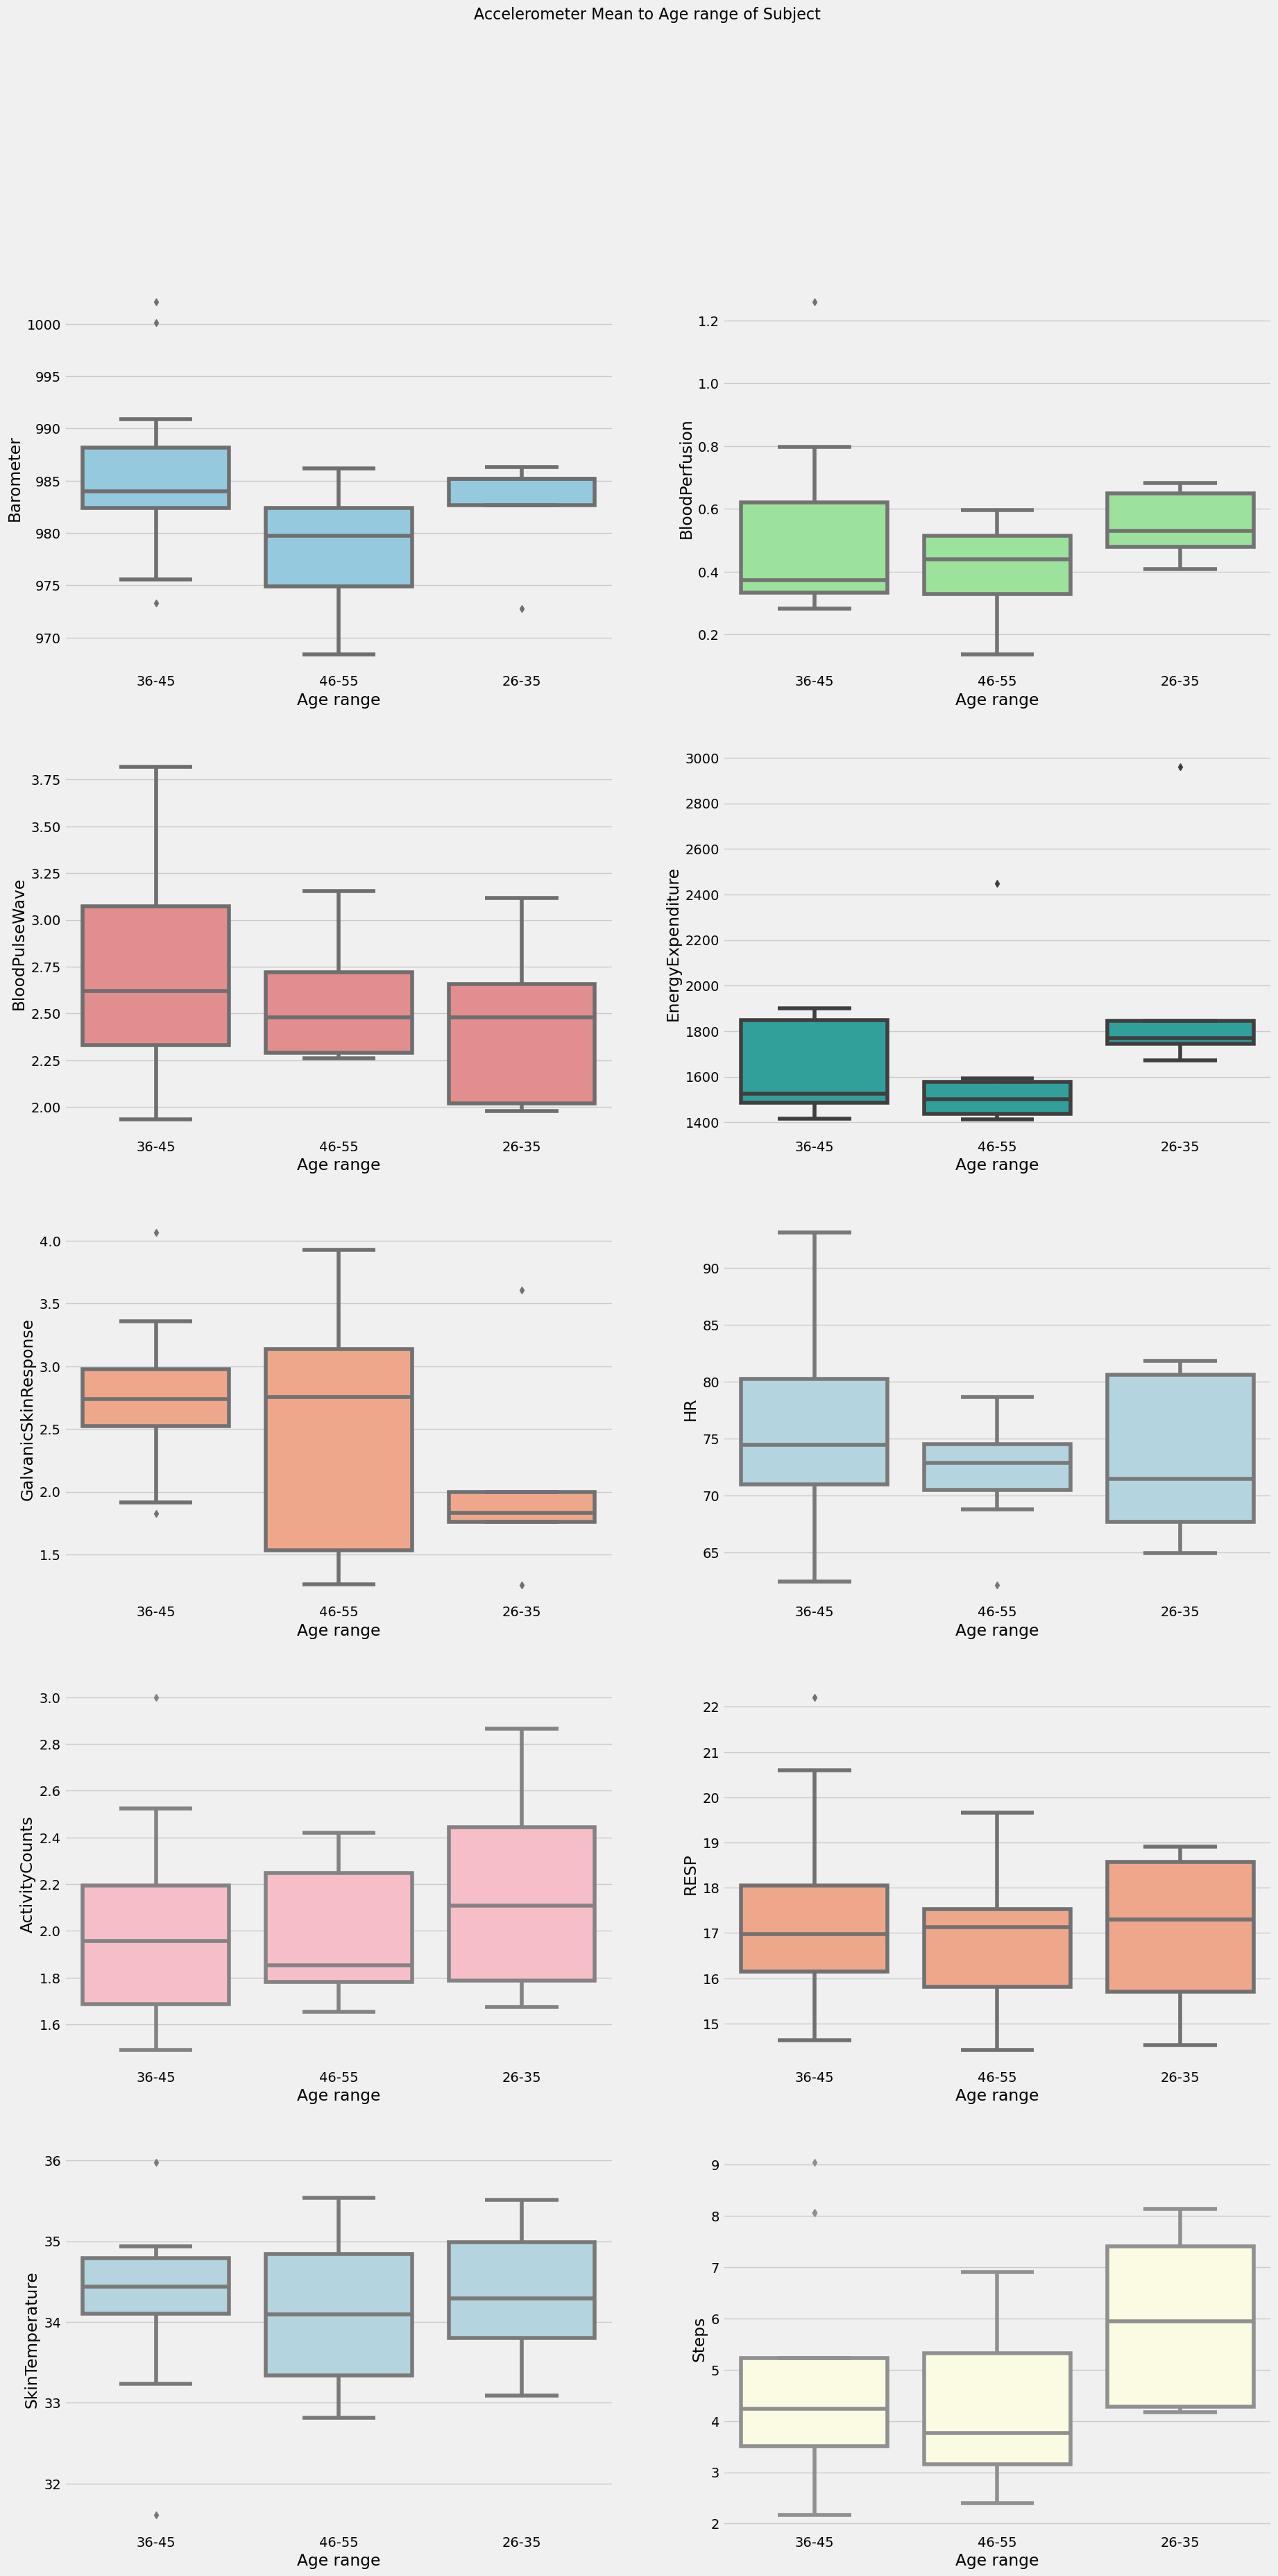

In [19]:
combined_df=sensor_data.copy()
fig, axes = plt.subplots(5, 2, figsize=(20, 40))

# Plot for each activity class against gender
sns.boxplot(x='Age range', y='Barometer', data=combined_df, ax=axes[0, 0], color='skyblue')
sns.boxplot(x='Age range', y='BloodPerfusion', data=combined_df, ax=axes[0, 1], color='lightgreen')
sns.boxplot(x='Age range', y='BloodPulseWave', data=combined_df, ax=axes[1, 0], color='lightcoral')
sns.boxplot(x='Age range', y='EnergyExpenditure', data=combined_df, ax=axes[1, 1], color='lightseagreen')
sns.boxplot(x='Age range', y='GalvanicSkinResponse', data=combined_df, ax=axes[2, 0], color='lightsalmon')
sns.boxplot(x='Age range', y='HR', data=combined_df, ax=axes[2, 1], color='lightblue')

# Plot for ActivityCounts against gender
sns.boxplot(x='Age range', y='ActivityCounts', data=combined_df, ax=axes[3, 0], color='lightpink')

sns.boxplot(x='Age range', y='RESP', data=combined_df, ax=axes[3, 1], color='lightsalmon')
sns.boxplot(x='Age range', y='SkinTemperature', data=combined_df, ax=axes[4, 0], color='lightblue')

# Plot for Steps against 
sns.boxplot(x='Age range', y='Steps', data=combined_df, ax=axes[4, 1], color='lightyellow')



fig.suptitle("Accelerometer Mean to Age range of Subject", fontsize=16)
plt.show()



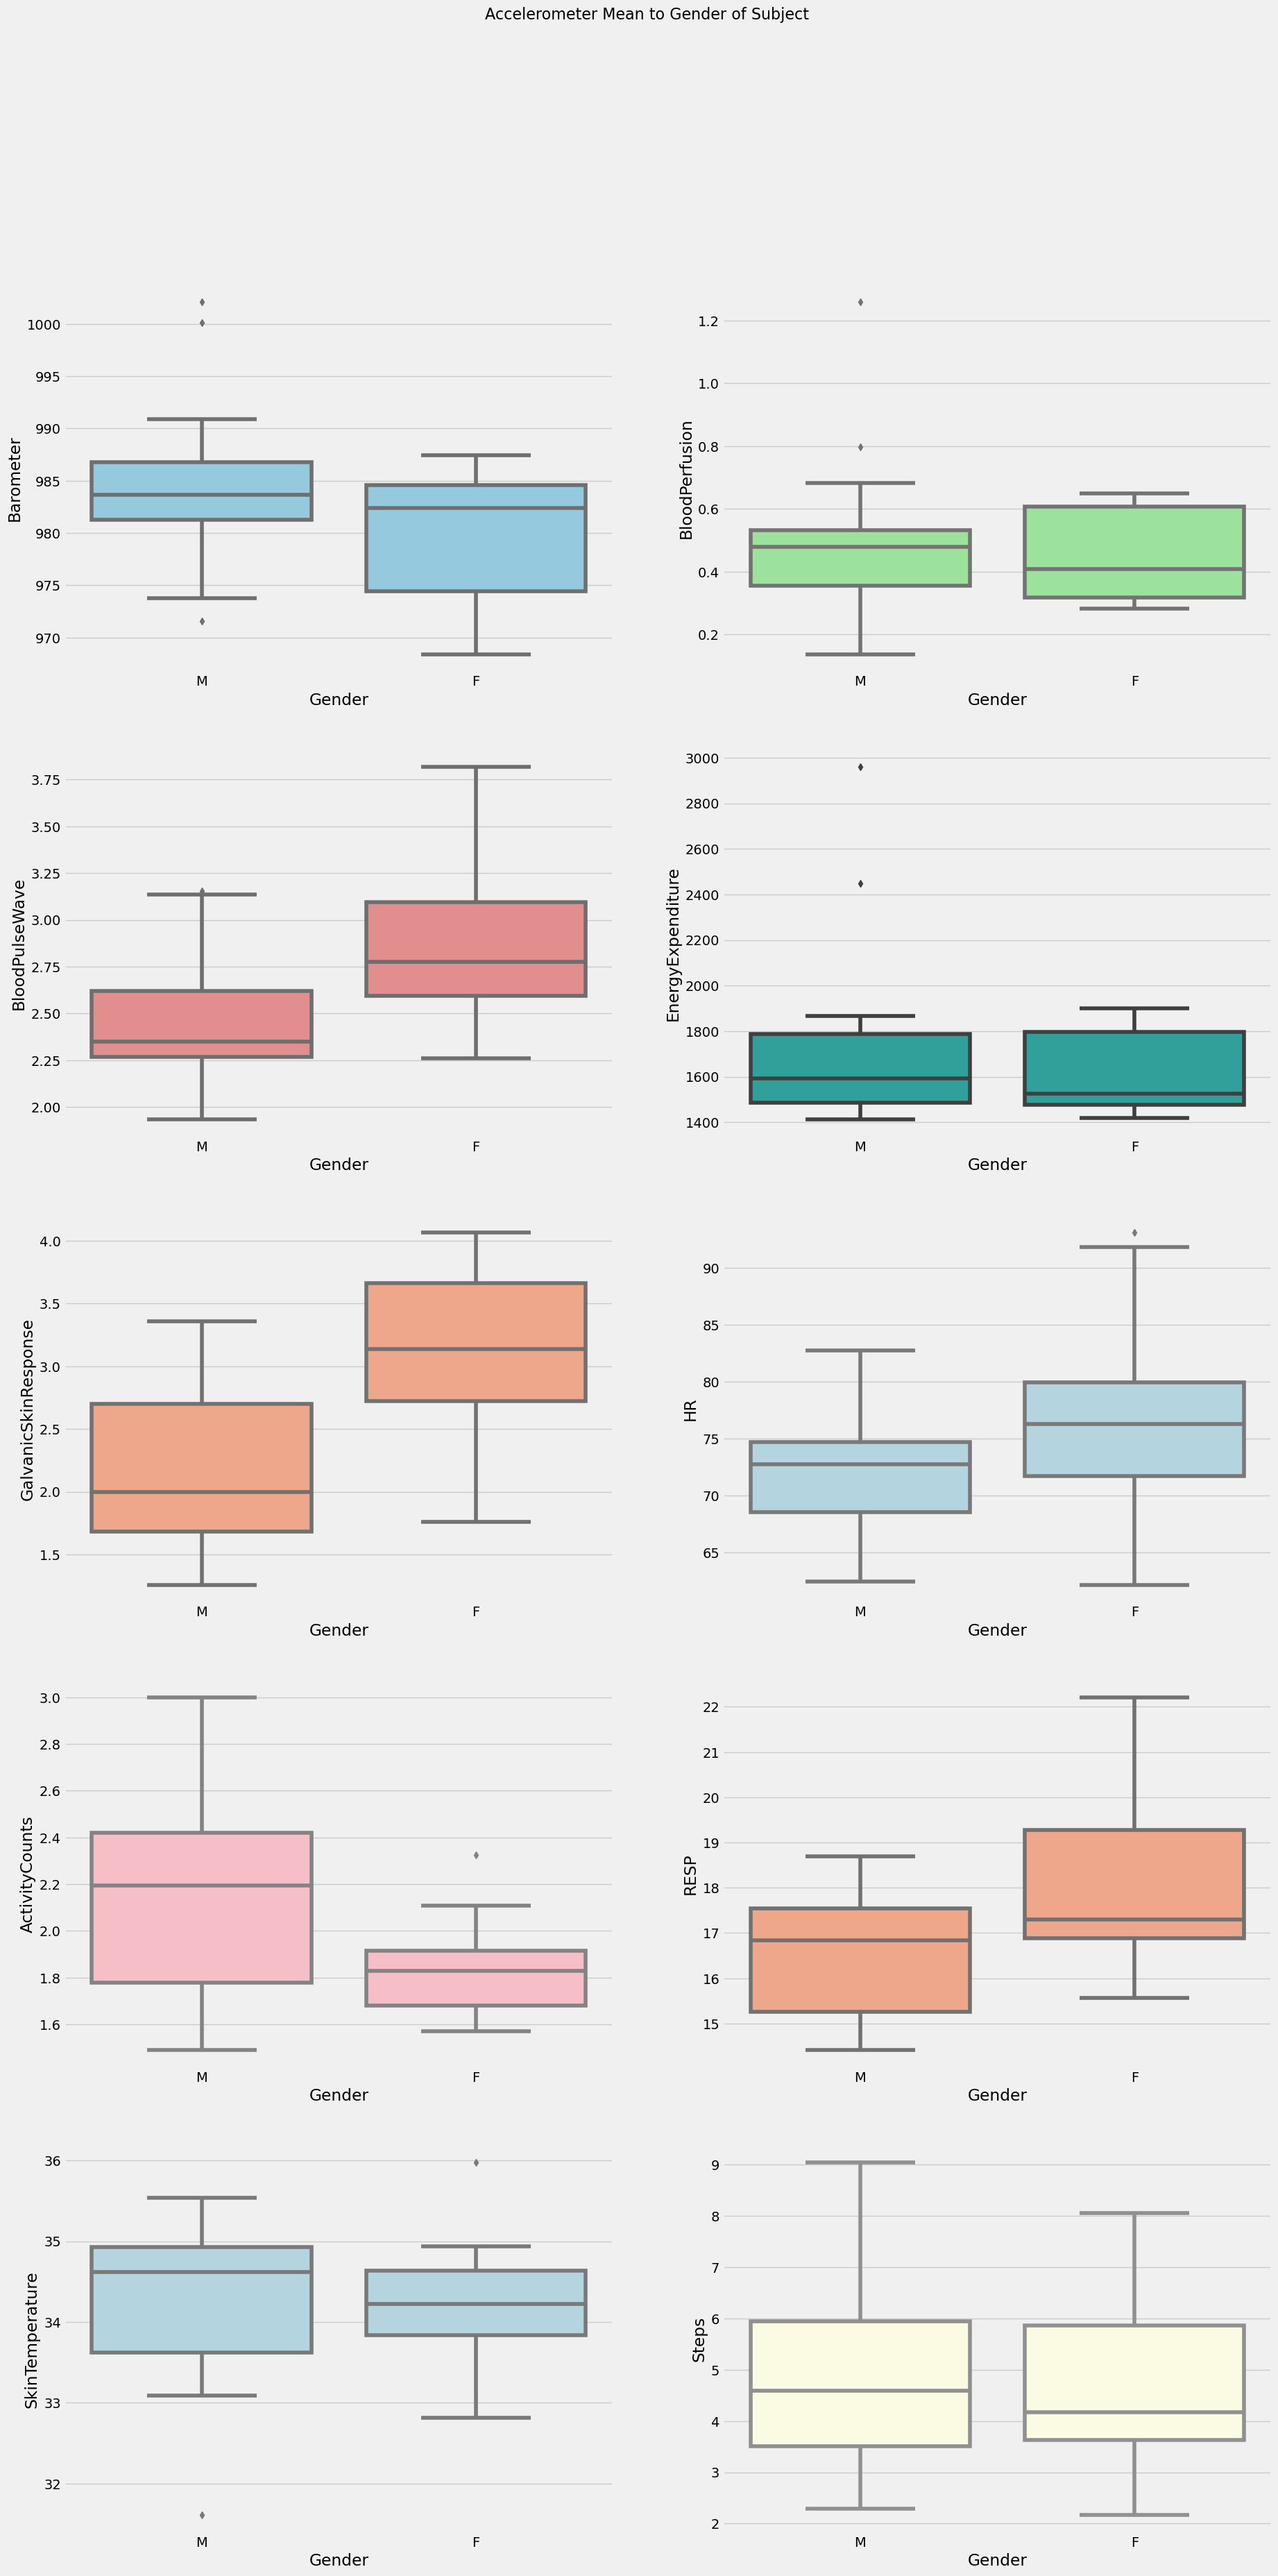

In [20]:


fig, axes = plt.subplots(5, 2, figsize=(20, 40))

# Plot for each activity class against gender
sns.boxplot(x='Gender', y='Barometer', data=combined_df, ax=axes[0, 0], color='skyblue')
sns.boxplot(x='Gender', y='BloodPerfusion', data=combined_df, ax=axes[0, 1], color='lightgreen')
sns.boxplot(x='Gender', y='BloodPulseWave', data=combined_df, ax=axes[1, 0], color='lightcoral')
sns.boxplot(x='Gender', y='EnergyExpenditure', data=combined_df, ax=axes[1, 1], color='lightseagreen')
sns.boxplot(x='Gender', y='GalvanicSkinResponse', data=combined_df, ax=axes[2, 0], color='lightsalmon')
sns.boxplot(x='Gender', y='HR', data=combined_df, ax=axes[2, 1], color='lightblue')

# Plot for ActivityCounts against gender
sns.boxplot(x='Gender', y='ActivityCounts', data=combined_df, ax=axes[3, 0], color='lightpink')

sns.boxplot(x='Gender', y='RESP', data=combined_df, ax=axes[3, 1], color='lightsalmon')
sns.boxplot(x='Gender', y='SkinTemperature', data=combined_df, ax=axes[4, 0], color='lightblue')

# Plot for Steps against gender
sns.boxplot(x='Gender', y='Steps', data=combined_df, ax=axes[4, 1], color='lightyellow')



fig.suptitle("Accelerometer Mean to Gender of Subject", fontsize=16)
plt.show()


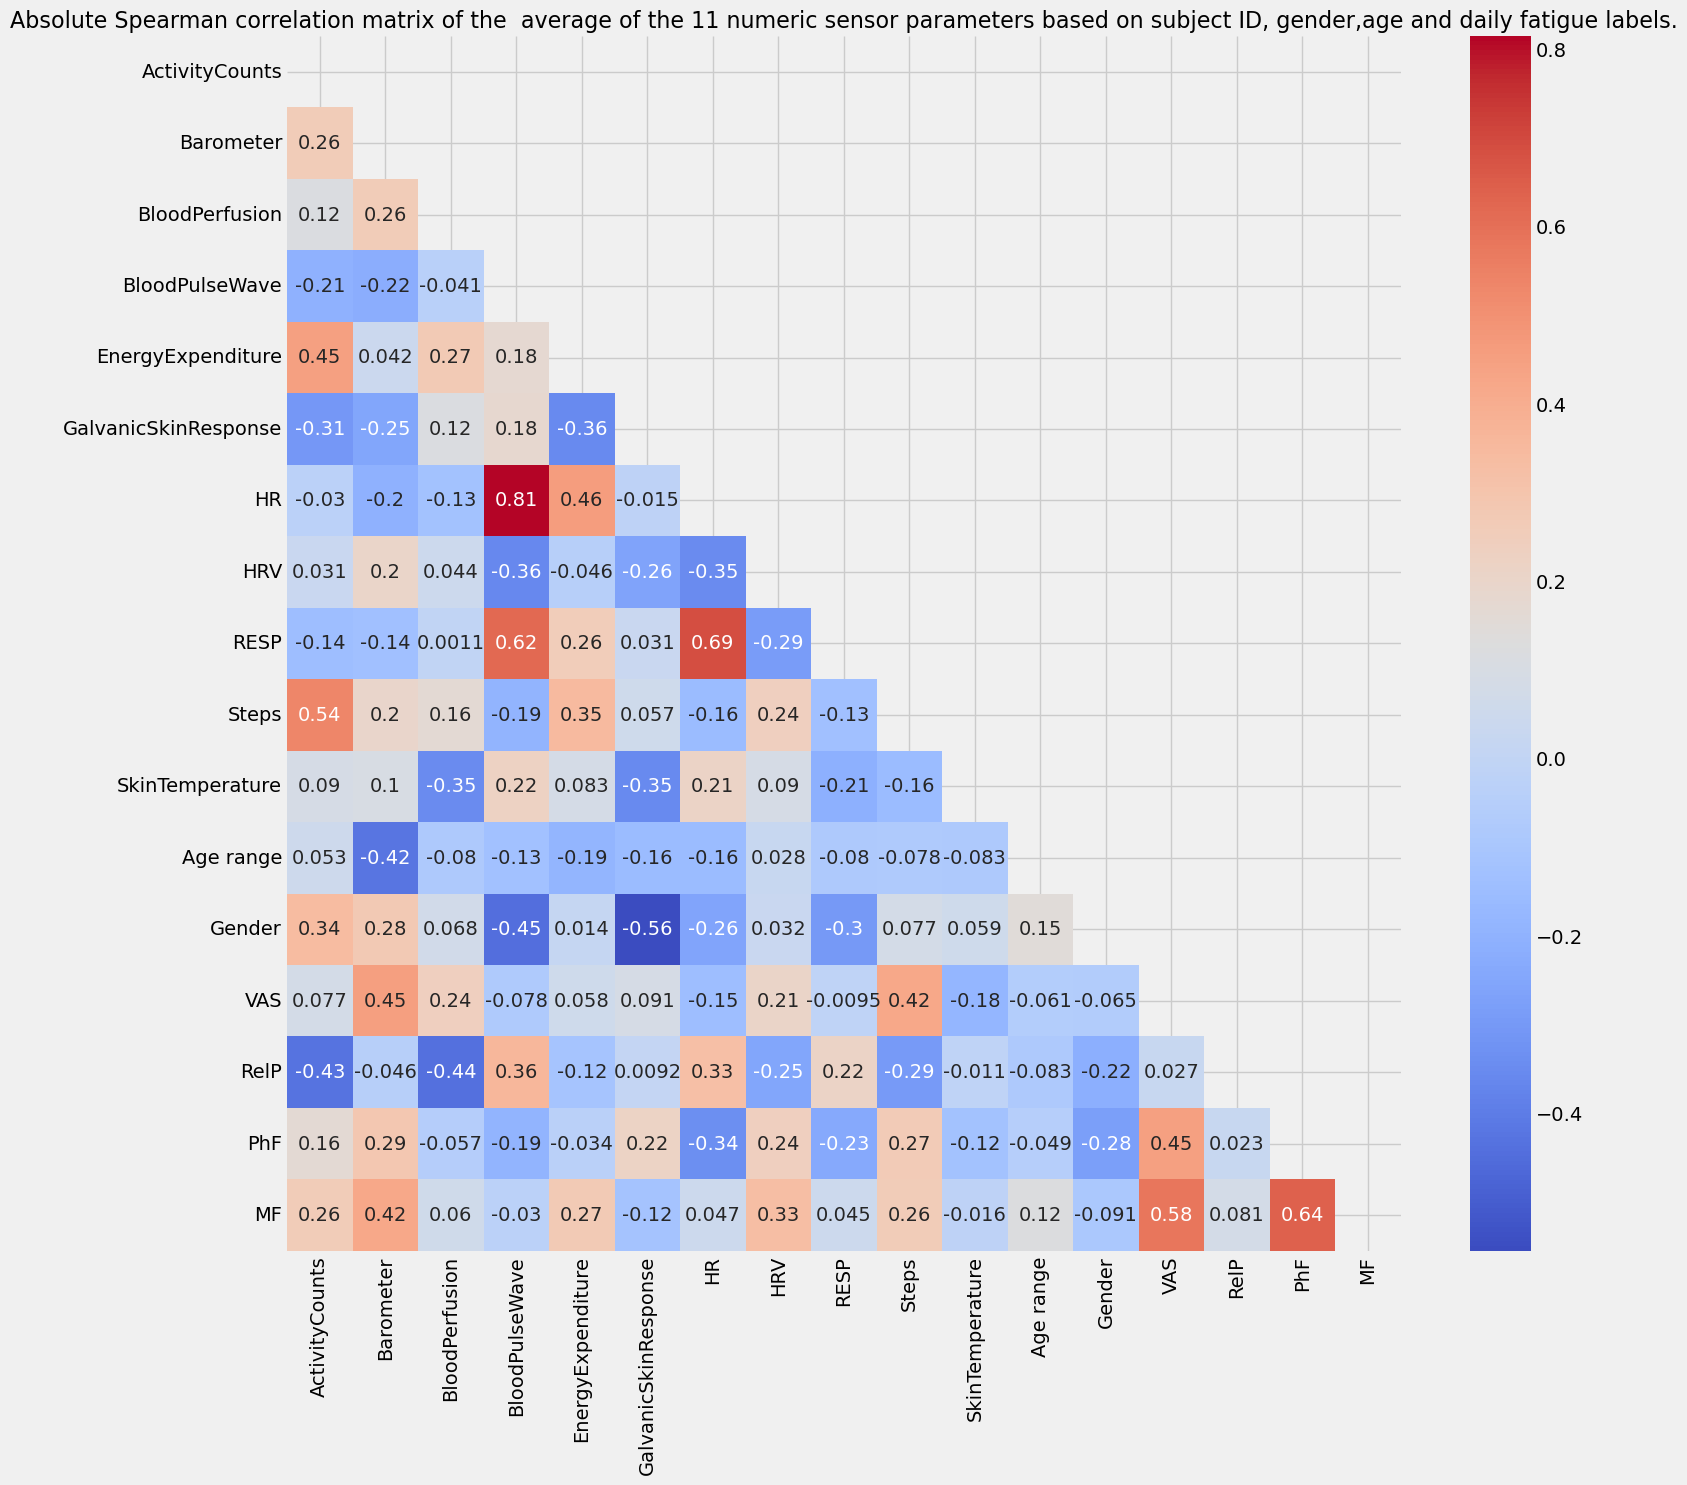

In [21]:
sensor_data_fat = pd.merge(sensor_data, fatigue_mean, on='SubjectID', how="inner")
sensor_data_fat=sensor_data_fat[['ActivityCounts', 'Barometer', 'BloodPerfusion',
       'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
       'HRV', 'RESP', 'Steps', 'SkinTemperature','Age range',
       'Gender', 'VAS', 'RelP', 'PhF', 'MF']]

# Assuming '36-45' is an 'Age range' category
age_mapping = {'36-45': 1, '26-35': 2,  '46-55': 3}
gender_mapping={"M":1, "F":0}
sensor_data_fat['Age range'] = sensor_data_fat['Age range'].map(age_mapping)
sensor_data_fat['Gender'] = sensor_data_fat['Gender'].map(gender_mapping)

# Calculate the Spearman correlation
matrix = np.triu(sensor_data_fat.corr(method='spearman'))

# Create the heatmap
plt.figure(figsize=(16,15))
sns.heatmap(sensor_data_fat.corr(method='spearman'), annot=True, mask=matrix, cmap='coolwarm')
plt.title('Absolute Spearman correlation matrix of the  average of the 11 numeric sensor parameters based on subject ID, gender,age and daily fatigue labels.', size=16)
plt.show()


In [22]:
combined_df1

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0        14.03.19 14:38        0.784314     981.25           0.000   
1        14.03.19 14:39        1.176471     981.20           0.175   
2        14.03.19 14:40        2.352941     981.20           0.190   
3        14.03.19 14:41        1.176471     981.10           0.110   
4        14.03.19 14:42        1.176471     981.20           0.100   
...                 ...             ...        ...             ...   
1355470  13.05.19 09:54        2.352941    1000.60           0.325   
1355471  13.05.19 09:55        7.450980    1000.40           0.385   
1355472  13.05.19 09:56        3.529412    1000.40           0.440   
1355473  13.05.19 09:57        0.784314    1000.35           0.475   
1355474  13.05.19 09:58       11.372549    1000.40           0.710   

         BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0                  0.00         753.636566                   NaN  83.000000   
1                  1.90        1256.060944                   NaN  75.403633   
2                  1.82        1256.060944                   NaN  69.112653   
3                  1.94        1256.060944                   NaN  69.781164   
4                  1.68        1256.060944                   NaN  72.306609   
...                 ...                ...                   ...        ...   
1355470            2.30        1649.145098                   NaN  78.681343   
1355471            2.16        1479.952673                   NaN  74.764512   
1355472            2.56        1482.794317                   NaN  76.447207   
1355473            2.04        1356.516672                   NaN  69.102764   
1355474            1.58        1042.613398                   NaN  58.603489   

         HRV       RESP  Steps  SkinTemperature    SubjectID ActivityClass  \
0        NaN        NaN    0.0           28.280  subjectID_1     undefined   
1        NaN        NaN    0.0           29.440  subjectID_1     undefined   
2        NaN  14.562500    0.0           30.410  subjectID_1     undefined   
3        NaN  12.175528    0.0           31.000  subjectID_1     undefined   
4        NaN  12.531234    0.0           31.455  subjectID_1     undefined   
...      ...        ...    ...              ...          ...           ...   
1355470  NaN        NaN  103.0           32.765  subjectID_9     undefined   
1355471  NaN  16.864421   16.0           32.440  subjectID_9     undefined   
1355472  NaN  19.536303   91.0           32.310  subjectID_9     undefined   
1355473  NaN  16.578595   13.0           32.280  subjectID_9     undefined   
1355474  NaN  14.363160    0.0           32.440  subjectID_9     undefined   

         SkinTemperature.Value  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
...                        ...  
1355470                    NaN  
1355471                    NaN  
1355472                    NaN  
1355473                    NaN  
1355474                    NaN  

[621455 rows x 15 columns]

In [23]:
merged_data

DateTime Timezone  SubjectID VAS  RelP  PhF   MF sport  \
0   2017-12-13 21:00:00      CET         24   1  -1.0  1.0  1.0  None   
1   2017-12-14 21:00:00      CET         24   1   1.0  1.0  1.0  None   
2   2017-12-15 21:00:00      CET         24   1   0.0  1.0  1.0  None   
3   2017-12-16 21:00:00      CET         24   1   1.0  1.0  1.0  None   
4   2017-12-17 21:00:00      CET         24   0   1.0  1.0  1.0  None   
..                  ...      ...        ...  ..   ...  ...  ...   ...   
474 2019-12-06 20:29:00      UTC         14   0   1.0  1.0  1.0    No   
475 2019-06-15 20:02:00      UTC         20   1   1.0  1.0  1.0   Yes   
476 2019-06-17 21:58:00      UTC         20   1   1.0  1.0  1.0    No   
477 2019-06-18 22:29:00      UTC         20   1  -1.0  1.0  1.0   Yes   
478 2019-06-21 07:09:00      UTC         20   1   0.0  1.0  1.0    No   

    Age range Gender  
0       26-35      M  
1       26-35      M  
2       26-35      M  
3       26-35      M  
4       26-35      M  
..        ...    ...  
474     36-45      F  
475     46-55      M  
476     46-55      M  
477     46-55      M  
478     46-55      M  

[479 rows x 10 columns]

In [24]:
# Convert 'Timestamp' column to datetime format in 'combined_df'
combined_df1['Timestamp'] = pd.to_datetime(combined_df1['Timestamp']) 

# Convert 'DateTime' column to datetime format in 'merged_data'
merged_data['DateTime'] = pd.to_datetime(merged_data['DateTime'])

# Extract the numerical part from the 'SubjectID' column in 'combined_df'
combined_df1['SubjectID'] = combined_df1['SubjectID'].str.split('_').str[-1]

# Convert the 'SubjectID' column to integer data type in 'combined_df'
combined_df1['SubjectID'] = combined_df1['SubjectID'].astype(int)

# Convert the 'SubjectID' column to integer data type in 'merged_data'
merged_data['SubjectID'] = merged_data['SubjectID'].astype(int)

# Merge the dataframes 'combined_df' and 'merged_data' based on specified columns
merged_df = pd.merge(combined_df1, merged_data, how='inner', left_on=['Timestamp', 'SubjectID'], right_on=['DateTime', 'SubjectID'])

# Display the merged DataFrame
merged_df


Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0   2019-03-14 20:01:00        4.705882     981.45           0.560   
1   2019-03-15 20:01:00        0.784314     989.90           1.340   
2   2019-03-16 20:47:00        2.352941     984.00           0.445   
3   2019-03-17 20:01:00        0.784314     987.50           0.970   
4   2019-03-18 20:13:00        1.960784     994.80           0.905   
..                  ...             ...        ...             ...   
346 2019-08-05 19:13:00        0.784314     975.35           0.790   
347 2019-09-05 21:08:00        1.176471     978.40           0.550   
348 2019-10-05 14:27:00        0.784314     980.80           0.400   
349 2019-11-05 17:31:00        0.784314     984.50           0.690   
350 2019-12-05 18:14:00        2.352941     997.20           0.320   

     BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0              1.78        1311.853180              4.720039  81.054318   
1              2.57        1311.853180              2.724856  71.733333   
2              3.49        1564.398731                   NaN  73.214010   
3              2.00        1311.853180              4.504256  61.254413   
4              2.25        1496.649544                   NaN  66.113844   
..              ...                ...                   ...        ...   
346            1.42        1330.995827                   NaN  58.534651   
347            1.81        1330.995827                   NaN  69.785286   
348            1.48        1330.995827                   NaN  57.934461   
349            2.30        1330.995827                   NaN  66.016667   
350            3.07        1330.995827                   NaN  76.561253   

           HRV       RESP  ...  SkinTemperature.Value            DateTime  \
0    31.266667  16.796793  ...                    NaN 2019-03-14 20:01:00   
1    28.600000  21.099766  ...                    NaN 2019-03-15 20:01:00   
2    41.633333   7.458851  ...                    NaN 2019-03-16 20:47:00   
3    49.150000  18.116667  ...                    NaN 2019-03-17 20:01:00   
4          NaN  22.205708  ...                    NaN 2019-03-18 20:13:00   
..         ...        ...  ...                    ...                 ...   
346  33.251923  13.850000  ...                    NaN 2019-08-05 19:13:00   
347  52.966667  15.033377  ...                    NaN 2019-09-05 21:08:00   
348  32.065970  13.695884  ...                    NaN 2019-10-05 14:27:00   
349  23.193151  21.119940  ...                    NaN 2019-11-05 17:31:00   
350  41.466667  21.551075  ...                    NaN 2019-12-05 18:14:00   

     Timezone VAS  RelP  PhF   MF sport  Age range  Gender  
0         UTC   0  -1.0  0.0  1.0    No      36-45       M  
1         UTC   0   1.0  1.0  1.0   Yes      36-45       M  
2         UTC   0   0.0  0.0  0.0    No      36-45       M  
3         UTC   0   0.0  1.0  0.0   Yes      36-45       M  
4         UTC   0  -1.0  1.0  0.0   Yes      36-45       M  
..        ...  ..   ...  ...  ...   ...        ...     ...  
346       UTC   1  -1.0  0.0  0.0    No      36-45       M  
347       UTC   1   0.0  0.0  0.0    No      36-45       M  
348       UTC   1   0.0  0.0  0.0    No      36-45       M  
349       UTC   1  -1.0  0.0  0.0   Yes      36-45       M  
350       UTC   1   1.0  1.0  0.0   Yes      36-45       M  

[351 rows x 24 columns]

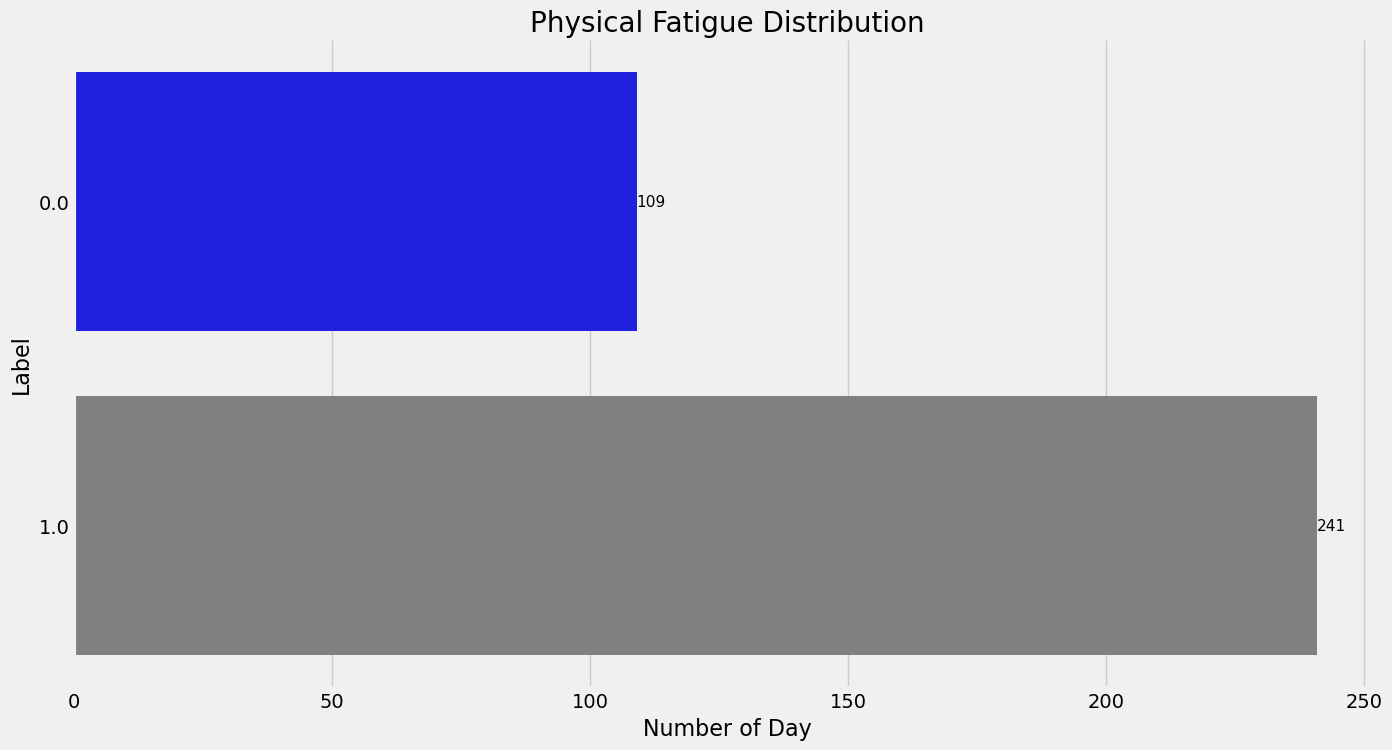

In [25]:
df=merged_df.copy()
# View Physical Distribution
plt.figure(figsize=(15, 8))

# Define Color Palette
color_palette = {0:'blue', 1:'grey'}
distribution = df['PhF'].value_counts().sort_values(ascending=False)

bar_plot = sns.barplot(
    x=distribution.values,
    y=list(distribution.keys()),
    orient='horizontal', palette=color_palette
);

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', fontsize=11)    
    
plt.title('Physical Fatigue Distribution', fontsize=20);
sns.despine();
plt.xlabel("Number of Day", fontsize=16);
plt.ylabel("Label", fontsize=16);

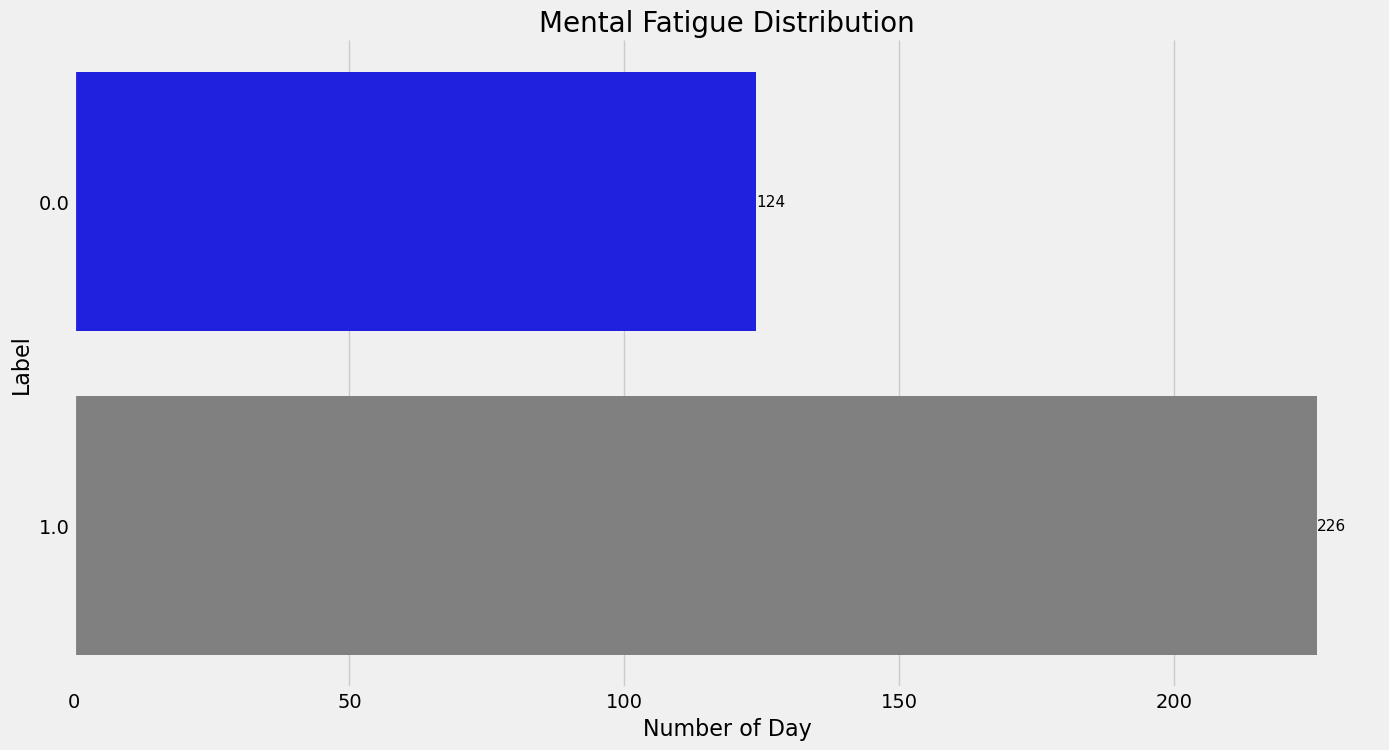

In [26]:
df=merged_df.copy()
# View Mental Distribution
plt.figure(figsize=(15, 8))

# Define Color Palette
color_palette = {0:'blue', 1:'grey'}
distribution = df['MF'].value_counts().sort_values(ascending=False)

bar_plot = sns.barplot(
    x=distribution.values,
    y=list(distribution.keys()),
    orient='horizontal', palette=color_palette
);

for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f', fontsize=11)    
    
plt.title('Mental Fatigue Distribution', fontsize=20);
sns.despine();
plt.xlabel("Number of Day", fontsize=16);
plt.ylabel("Label", fontsize=16);

In [27]:
df.columns

Index(['Timestamp', 'ActivityCounts', 'Barometer', 'BloodPerfusion',
       'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
       'HRV', 'RESP', 'Steps', 'SkinTemperature', 'SubjectID', 'ActivityClass',
       'SkinTemperature.Value', 'DateTime', 'Timezone', 'VAS', 'RelP', 'PhF',
       'MF', 'sport', 'Age range', 'Gender'],
      dtype='object')

In [28]:

pd.set_option('display.max_columns', None)

In [29]:
df.head(2)

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0 2019-03-14 20:01:00        4.705882     981.45            0.56   
1 2019-03-15 20:01:00        0.784314     989.90            1.34   

   BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0            1.78         1311.85318              4.720039  81.054318   
1            2.57         1311.85318              2.724856  71.733333   

         HRV       RESP  Steps  SkinTemperature  SubjectID ActivityClass  \
0  31.266667  16.796793    7.0            33.78          1     undefined   
1  28.600000  21.099766    0.0            34.19          1     undefined   

   SkinTemperature.Value            DateTime Timezone VAS  RelP  PhF   MF  \
0                    NaN 2019-03-14 20:01:00      UTC   0  -1.0  0.0  1.0   
1                    NaN 2019-03-15 20:01:00      UTC   0   1.0  1.0  1.0   

  sport Age range Gender  
0    No     36-45      M  
1   Yes     36-45      M

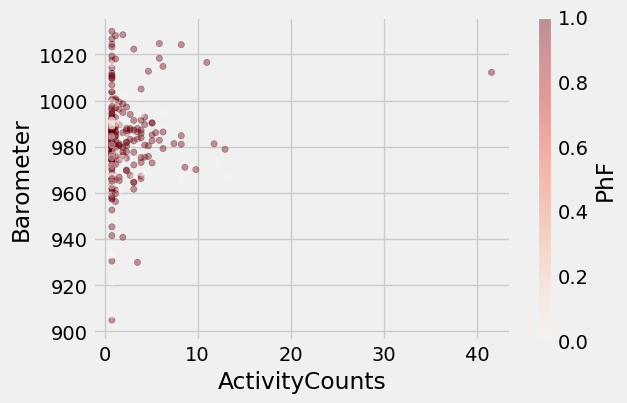

In [30]:
df.plot(kind="scatter", x="ActivityCounts", y="Barometer",
        c="PhF", cmap=plt.get_cmap("Reds"),
        colorbar=True, alpha=0.4, figsize=(6,4),
        )
plt.show()

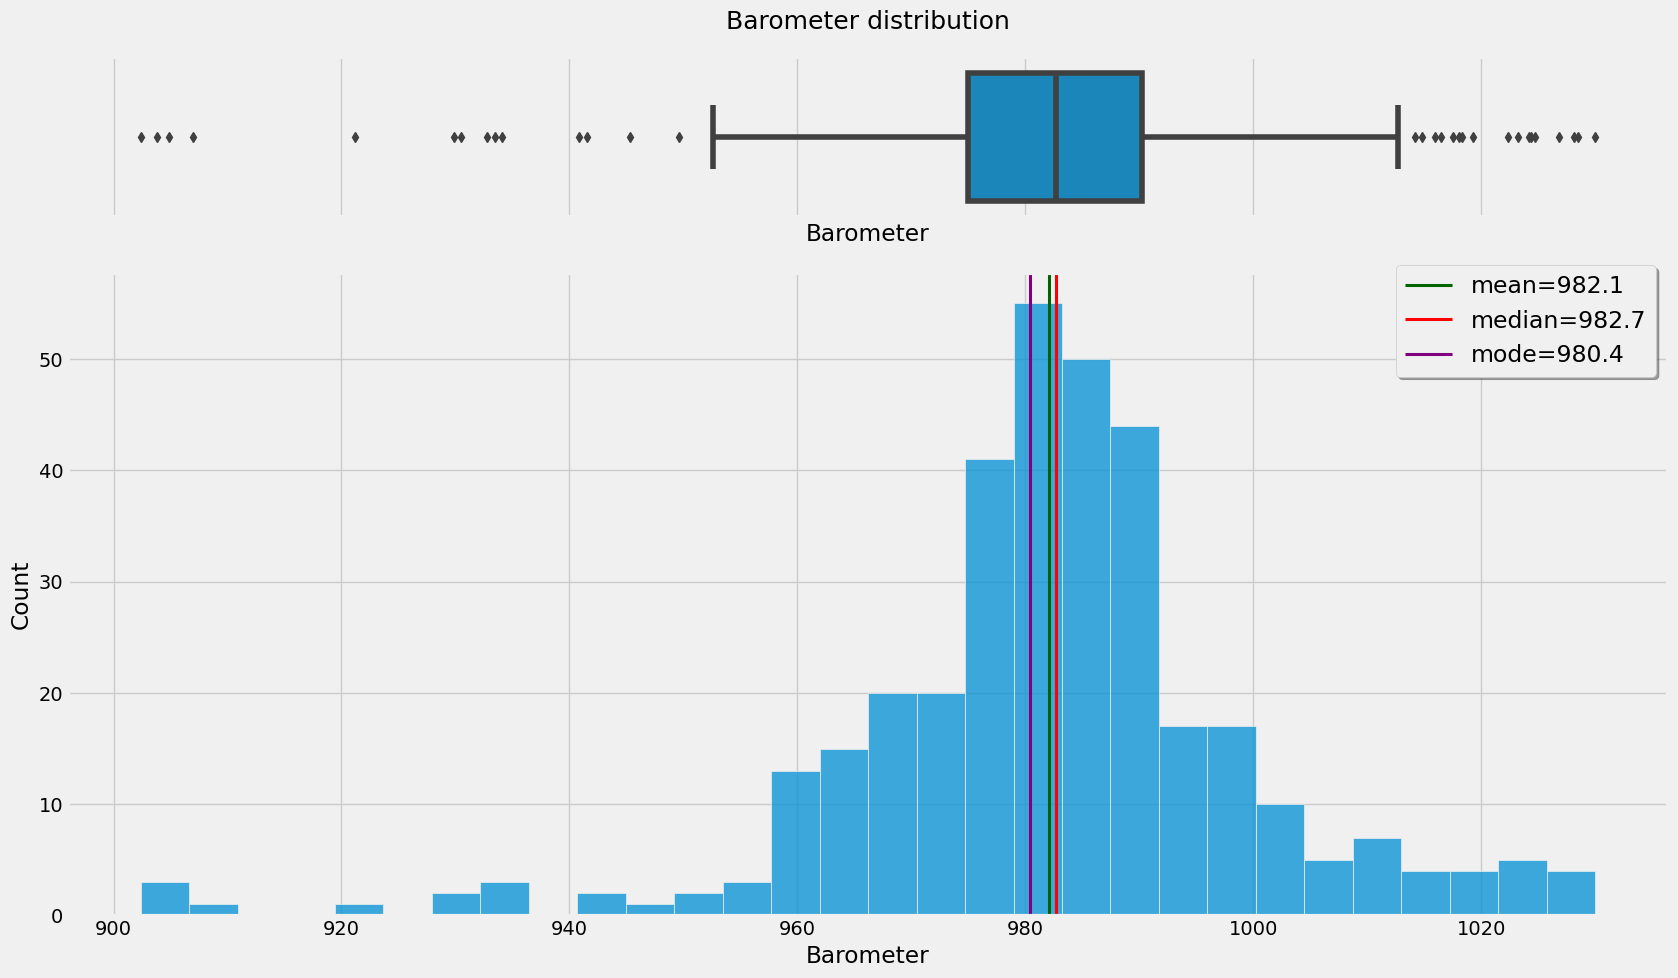

In [31]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(17,10),gridspec_kw={"height_ratios": (.2, .8)})
ax[0].set_title('Barometer distribution',fontsize=18,pad=20)
sns.boxplot(x='Barometer', data=df, ax=ax[0])
ax[0].set(yticks=[])
sns.histplot(x='Barometer', data=df, ax=ax[1])
plt.axvline(df['Barometer'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df['Barometer'].mean(),1)))
plt.axvline(df['Barometer'].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df['Barometer'].median(),1)))
plt.axvline(df['Barometer'].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df['Barometer'].mode()[0]))
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
plt.tight_layout()
plt.show()

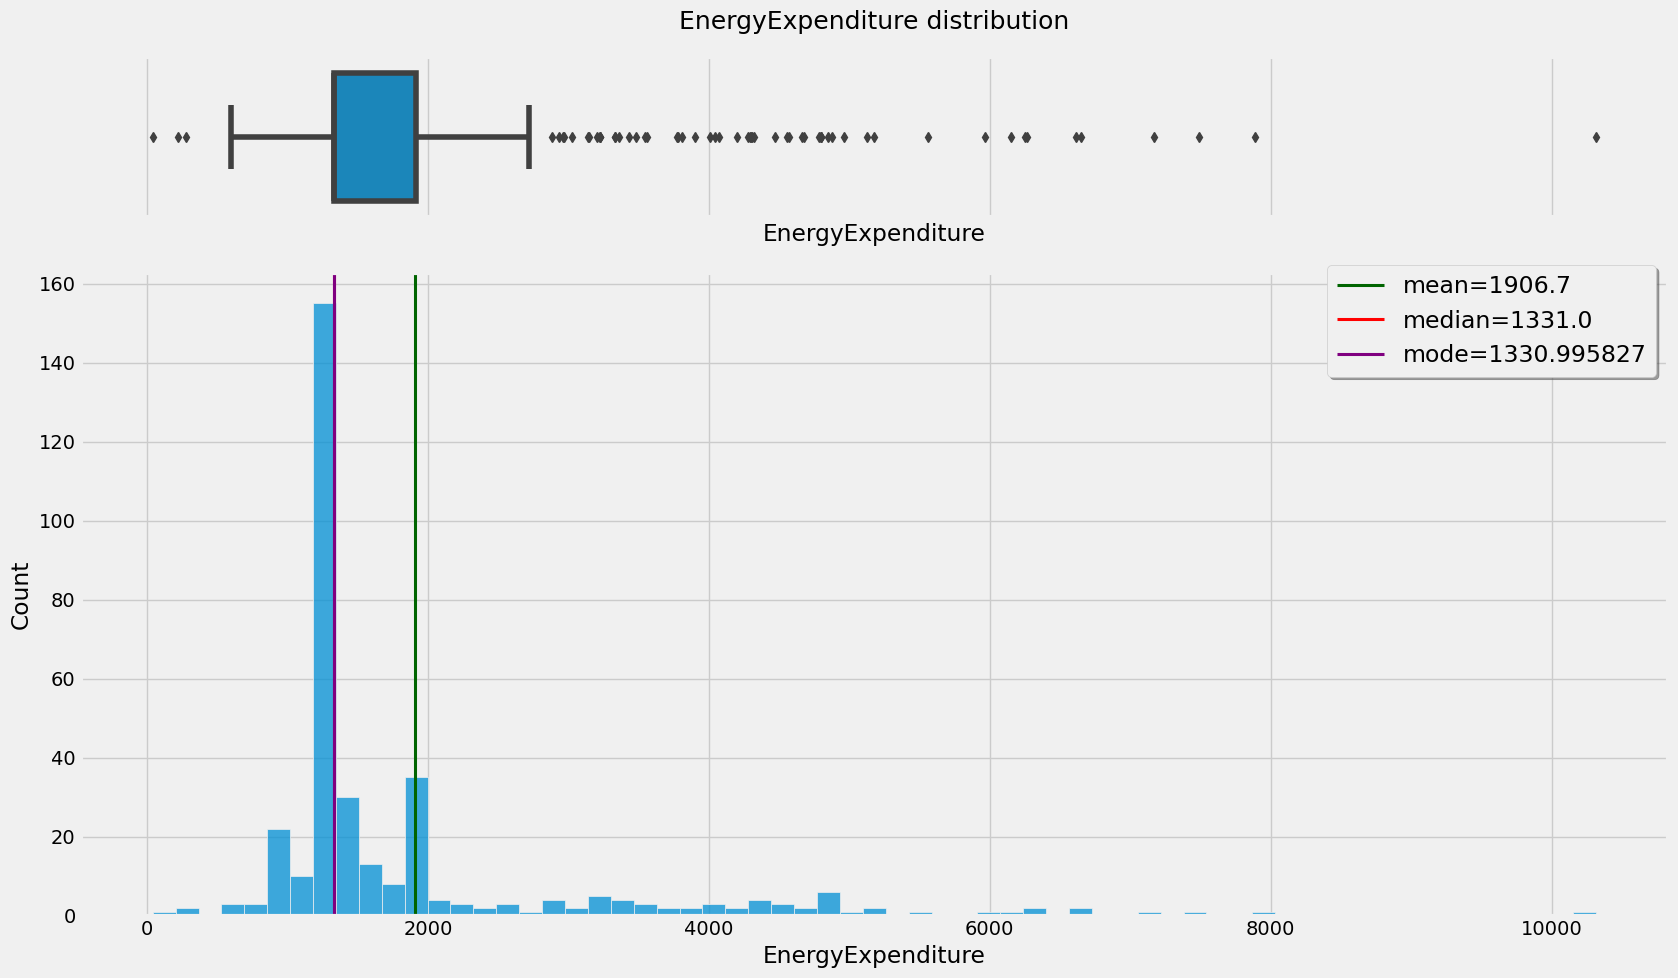

In [32]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(17,10),gridspec_kw={"height_ratios": (.2, .8)})
ax[0].set_title('EnergyExpenditure distribution',fontsize=18,pad=20)
sns.boxplot(x='EnergyExpenditure', data=df, ax=ax[0])
ax[0].set(yticks=[])
sns.histplot(x='EnergyExpenditure', data=df, ax=ax[1])
plt.axvline(df['EnergyExpenditure'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df['EnergyExpenditure'].mean(),1)))
plt.axvline(df['EnergyExpenditure'].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df['EnergyExpenditure'].median(),1)))
plt.axvline(df['EnergyExpenditure'].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df['EnergyExpenditure'].mode()[0]))
plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
plt.tight_layout()
plt.show()

In [33]:
df.head(4)

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0 2019-03-14 20:01:00        4.705882     981.45           0.560   
1 2019-03-15 20:01:00        0.784314     989.90           1.340   
2 2019-03-16 20:47:00        2.352941     984.00           0.445   
3 2019-03-17 20:01:00        0.784314     987.50           0.970   

   BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0            1.78        1311.853180              4.720039  81.054318   
1            2.57        1311.853180              2.724856  71.733333   
2            3.49        1564.398731                   NaN  73.214010   
3            2.00        1311.853180              4.504256  61.254413   

         HRV       RESP  Steps  SkinTemperature  SubjectID ActivityClass  \
0  31.266667  16.796793    7.0            33.78          1     undefined   
1  28.600000  21.099766    0.0            34.19          1     undefined   
2  41.633333   7.458851   13.0            34.59          1     undefined   
3  49.150000  18.116667    0.0            34.91          1     undefined   

   SkinTemperature.Value            DateTime Timezone VAS  RelP  PhF   MF  \
0                    NaN 2019-03-14 20:01:00      UTC   0  -1.0  0.0  1.0   
1                    NaN 2019-03-15 20:01:00      UTC   0   1.0  1.0  1.0   
2                    NaN 2019-03-16 20:47:00      UTC   0   0.0  0.0  0.0   
3                    NaN 2019-03-17 20:01:00      UTC   0   0.0  1.0  0.0   

  sport Age range Gender  
0    No     36-45      M  
1   Yes     36-45      M  
2    No     36-45      M  
3   Yes     36-45      M

In [34]:
df.columns

Index(['Timestamp', 'ActivityCounts', 'Barometer', 'BloodPerfusion',
       'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
       'HRV', 'RESP', 'Steps', 'SkinTemperature', 'SubjectID', 'ActivityClass',
       'SkinTemperature.Value', 'DateTime', 'Timezone', 'VAS', 'RelP', 'PhF',
       'MF', 'sport', 'Age range', 'Gender'],
      dtype='object')

In [35]:
merged_df

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0   2019-03-14 20:01:00        4.705882     981.45           0.560   
1   2019-03-15 20:01:00        0.784314     989.90           1.340   
2   2019-03-16 20:47:00        2.352941     984.00           0.445   
3   2019-03-17 20:01:00        0.784314     987.50           0.970   
4   2019-03-18 20:13:00        1.960784     994.80           0.905   
..                  ...             ...        ...             ...   
346 2019-08-05 19:13:00        0.784314     975.35           0.790   
347 2019-09-05 21:08:00        1.176471     978.40           0.550   
348 2019-10-05 14:27:00        0.784314     980.80           0.400   
349 2019-11-05 17:31:00        0.784314     984.50           0.690   
350 2019-12-05 18:14:00        2.352941     997.20           0.320   

     BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0              1.78        1311.853180              4.720039  81.054318   
1              2.57        1311.853180              2.724856  71.733333   
2              3.49        1564.398731                   NaN  73.214010   
3              2.00        1311.853180              4.504256  61.254413   
4              2.25        1496.649544                   NaN  66.113844   
..              ...                ...                   ...        ...   
346            1.42        1330.995827                   NaN  58.534651   
347            1.81        1330.995827                   NaN  69.785286   
348            1.48        1330.995827                   NaN  57.934461   
349            2.30        1330.995827                   NaN  66.016667   
350            3.07        1330.995827                   NaN  76.561253   

           HRV       RESP  Steps  SkinTemperature  SubjectID ActivityClass  \
0    31.266667  16.796793    7.0           33.780          1     undefined   
1    28.600000  21.099766    0.0           34.190          1     undefined   
2    41.633333   7.458851   13.0           34.590          1     undefined   
3    49.150000  18.116667    0.0           34.910          1     undefined   
4          NaN  22.205708    9.0           35.735          1     undefined   
..         ...        ...    ...              ...        ...           ...   
346  33.251923  13.850000    0.0           33.560          9     undefined   
347  52.966667  15.033377    0.0           33.560          9     undefined   
348  32.065970  13.695884    0.0           34.280          9     undefined   
349  23.193151  21.119940    0.0           35.000          9       resting   
350  41.466667  21.551075    0.0           34.720          9     undefined   

     SkinTemperature.Value            DateTime Timezone VAS  RelP  PhF   MF  \
0                      NaN 2019-03-14 20:01:00      UTC   0  -1.0  0.0  1.0   
1                      NaN 2019-03-15 20:01:00      UTC   0   1.0  1.0  1.0   
2                      NaN 2019-03-16 20:47:00      UTC   0   0.0  0.0  0.0   
3                      NaN 2019-03-17 20:01:00      UTC   0   0.0  1.0  0.0   
4                      NaN 2019-03-18 20:13:00      UTC   0  -1.0  1.0  0.0   
..                     ...                 ...      ...  ..   ...  ...  ...   
346                    NaN 2019-08-05 19:13:00      UTC   1  -1.0  0.0  0.0   
347                    NaN 2019-09-05 21:08:00      UTC   1   0.0  0.0  0.0   
348                    NaN 2019-10-05 14:27:00      UTC   1   0.0  0.0  0.0   
349                    NaN 2019-11-05 17:31:00      UTC   1  -1.0  0.0  0.0   
350                    NaN 2019-12-05 18:14:00      UTC   1   1.0  1.0  0.0   

    sport Age range Gender  
0      No     36-45      M  
1     Yes     36-45      M  
2      No     36-45      M  
3     Yes     36-45      M  
4     Yes     36-45      M  
..    ...       ...    ...  
346    No     36-45      M  
347    No     36-45      M  
348    No     36-45      M  
349   Yes     36-45      M  
350   Yes     36-45      M  

[351 rows x 24 columns]

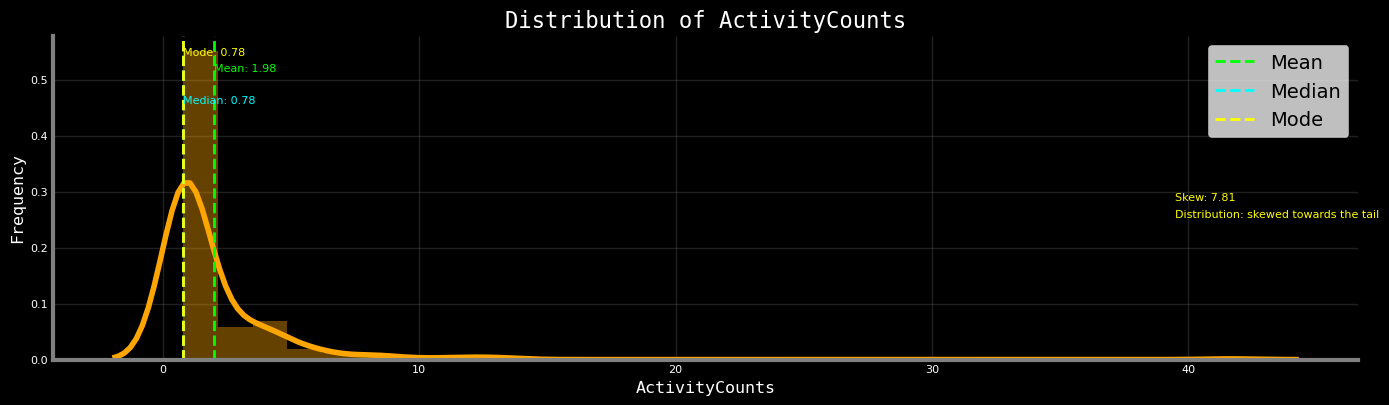

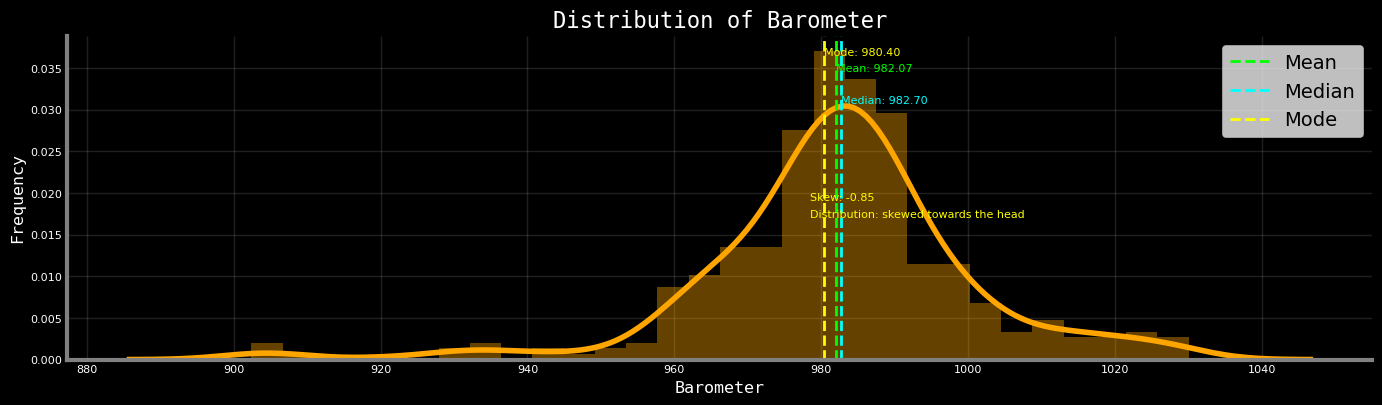

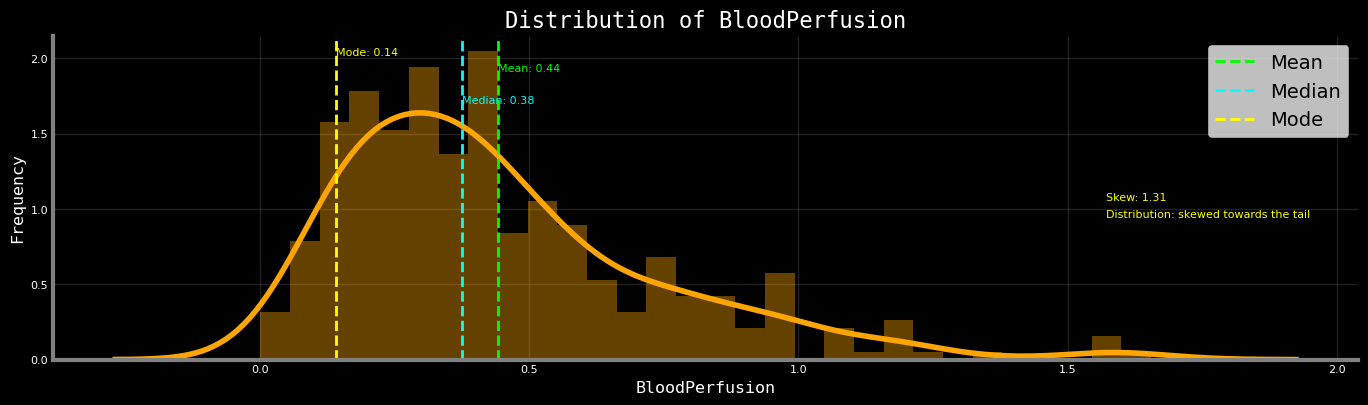

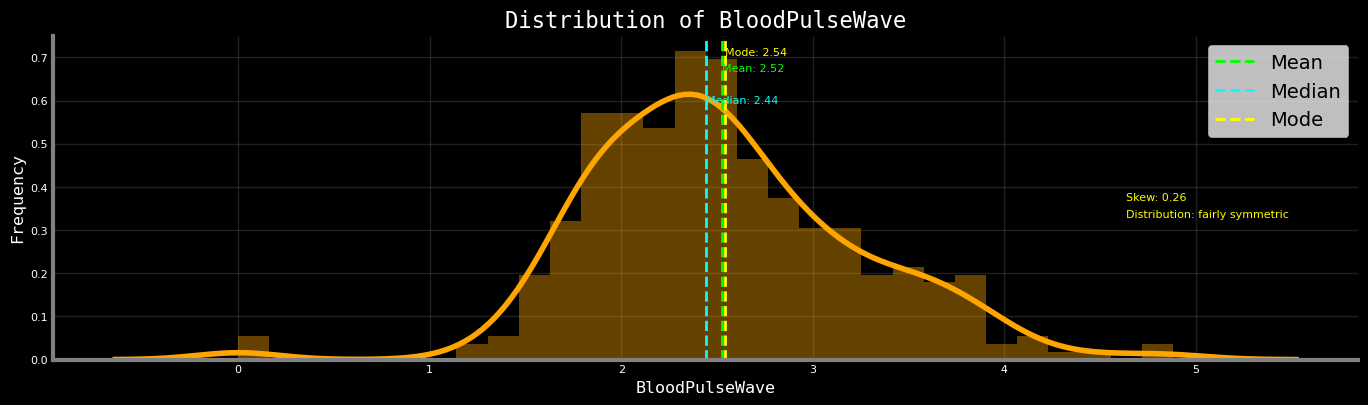

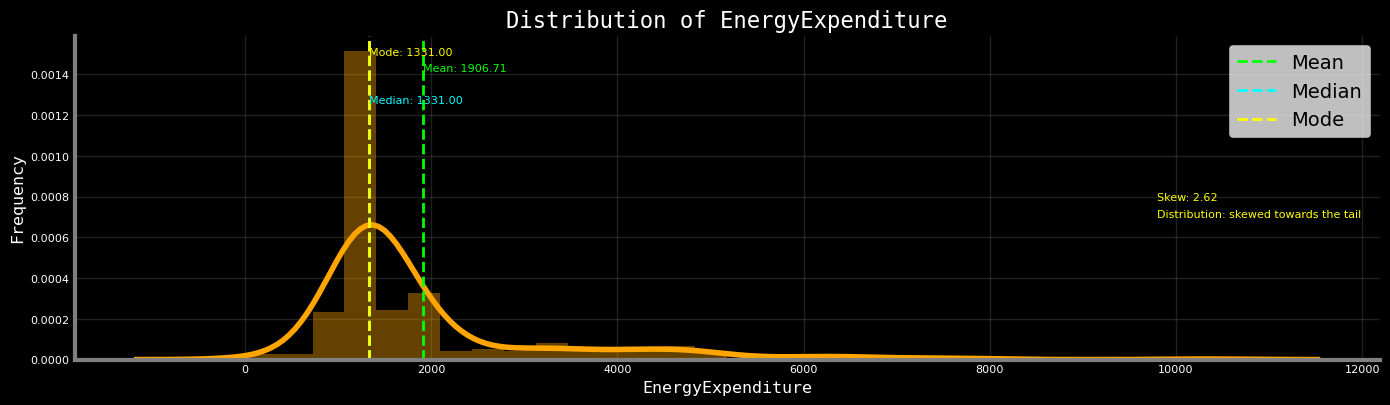

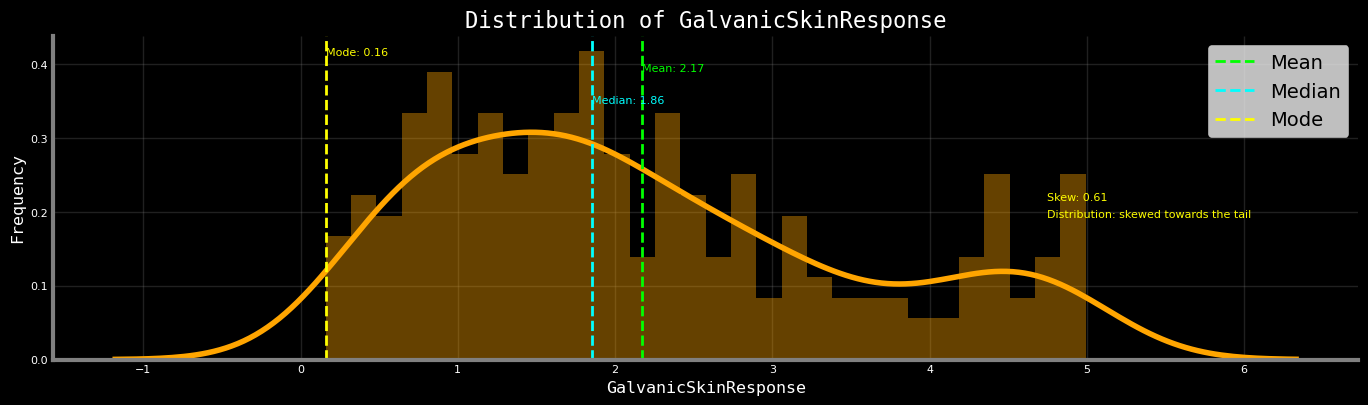

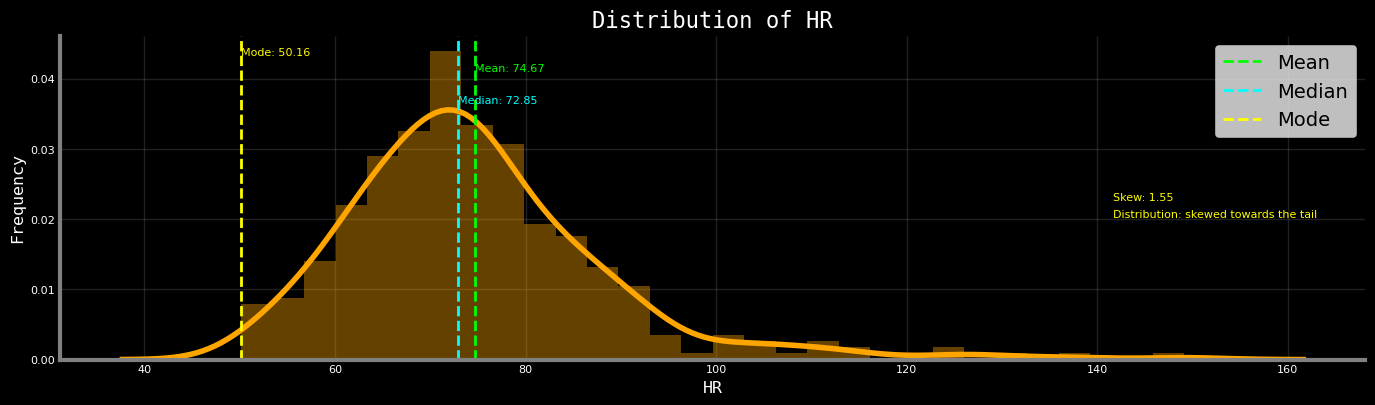

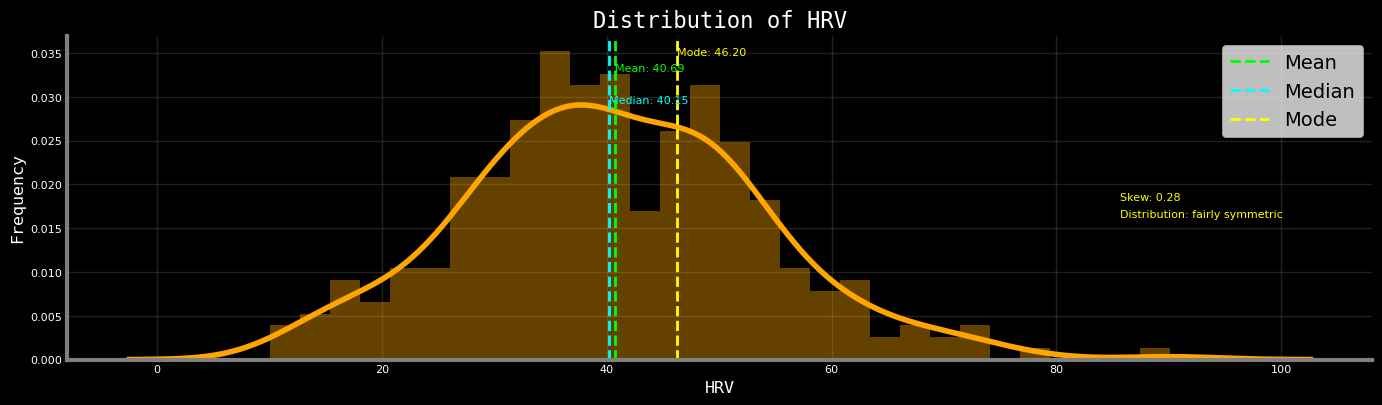

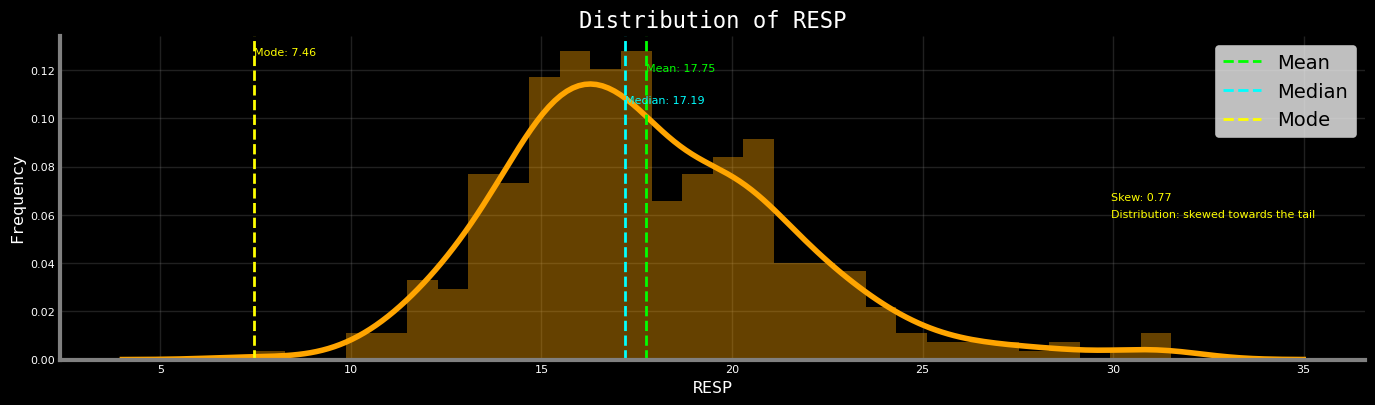

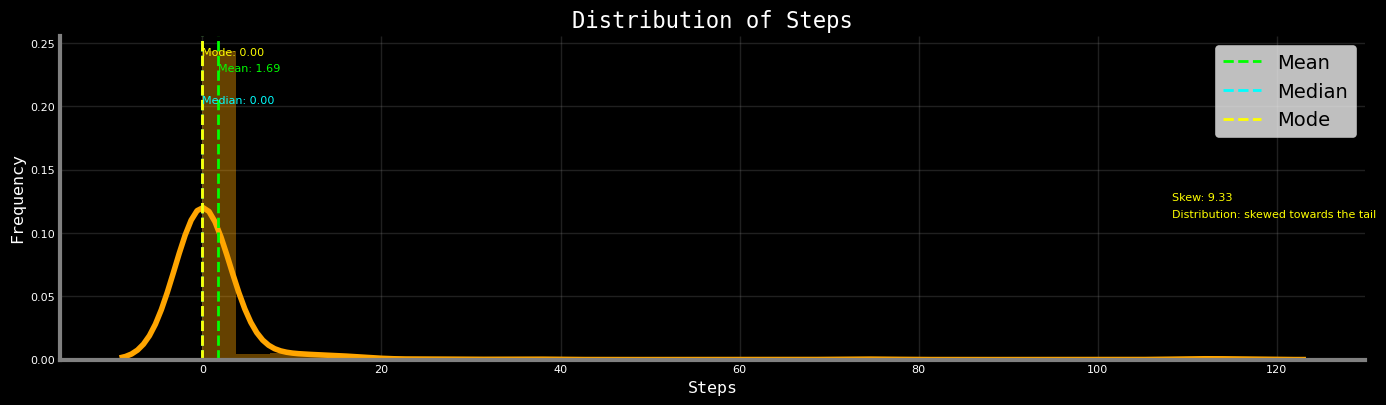

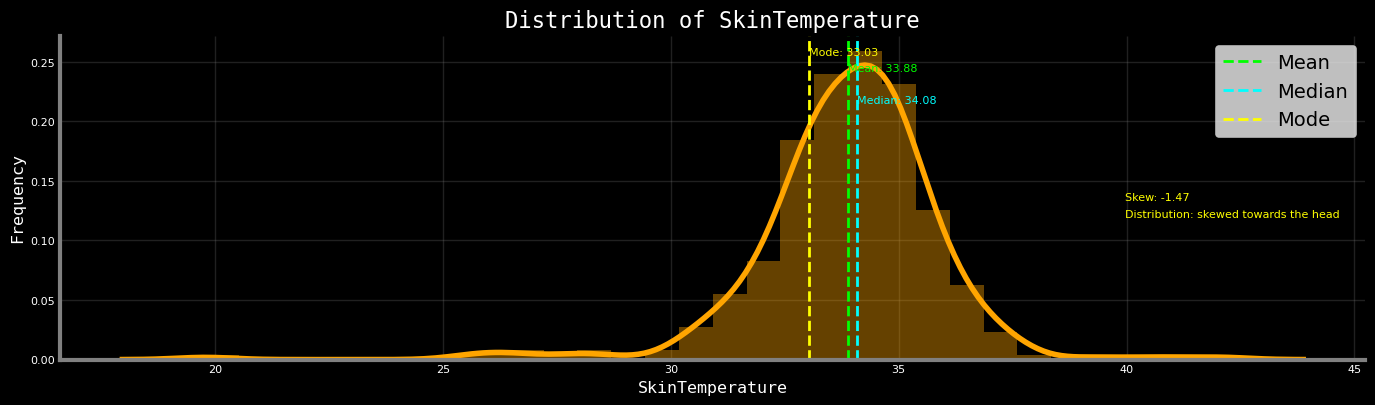

[None, None, None, None, None, None, None, None, None, None, None]

In [36]:
def skew_cat(skew_val):
    if skew_val>0.5:
        return 'skewed towards the tail'
    elif skew_val<-.5:
        return 'skewed towards the head'
    else:
        return 'fairly symmetric'

def skew_chart(x,var):

    median = x[var].median()
    mean = x[var].mean()
    mode = x[var].mode()[0]
    max=x[var].max()

    # Plotting the distribution of age
    fig, ax = plt.subplots(figsize=(15, 4))
    sns.distplot(x[var].dropna(), kde=True, bins=30, color='orange')

    # Adding title and axis labels
    plt.title("Distribution of "+ str(var), color='white',fontsize=16,fontdict={'fontname': 'monospace'})
    plt.xlabel(var, color='white',fontsize=12,fontdict={'fontname': 'monospace'})
    plt.ylabel("Frequency", color='white',fontsize=12,fontdict={'fontname': 'monospace'})

    fig.set_facecolor('black')  # Changing the background color
    ax.set_facecolor('black')  # Changing the plot area background color
    ax.grid(color='gray', alpha=0.25)  # Changing the grid lines color

    plt.axvline(mean, color='lime', linestyle='--', linewidth=2, label='Mean')  # Adding a vertical line for mean
    plt.text(mean, ax.get_ylim()[1]*0.9, f"Mean: {mean:.2f}", color='lime', fontsize=8, ha='left', va='center')  # Adding text for mean
    plt.axvline(median, color='cyan', linestyle='--', linewidth=2, label='Median')  # Adding a vertical line for median
    plt.text(median, ax.get_ylim()[1]*0.8, f"Median: {median:.2f}", color='cyan', fontsize=8, ha='left', va='center')  # Adding text for median
    plt.axvline(mode, color='yellow', linestyle='--', linewidth=2, label='Mode')  # Adding a vertical line for mode
    plt.text(mode, ax.get_ylim()[1]*0.95, f"Mode: {mode:.2f}", color='yellow', fontsize=8, ha='left', va='center')  # Adding text for mode
    plt.text(max*.95, ax.get_ylim()[1]*0.5, f"Skew: {x[var].skew():.2f}", color='yellow', fontsize=8, ha='left', va='center')  # Adding text for mode
    plt.text(max*.95, ax.get_ylim()[1]*0.45, f"Distribution: {skew_cat(x[var].skew())}", color='yellow', fontsize=8, ha='left', va='center')  # Adding text for mode
    plt.yticks(color='white',fontsize=8) # Changing the font size of y-axis ticks
    plt.xticks(color='white',fontsize=8) # Changing the font size of x-axis ticks

    plt.setp(ax.spines.values(), color='gray') # Changing the color of the spines
    sns.despine()  # Removing the top and right spines
    plt.legend()  # Adding the legend
    plt.show()  # Displaying the plot

#creating list by type of variables
continuous=['ActivityCounts', 'Barometer', 'BloodPerfusion',
       'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
       'HRV', 'RESP', 'Steps', 'SkinTemperature'] # creating a list of continuous attributes

target=['PhF'] # creating a list of target attribute

[skew_chart(df,i) for i in continuous]

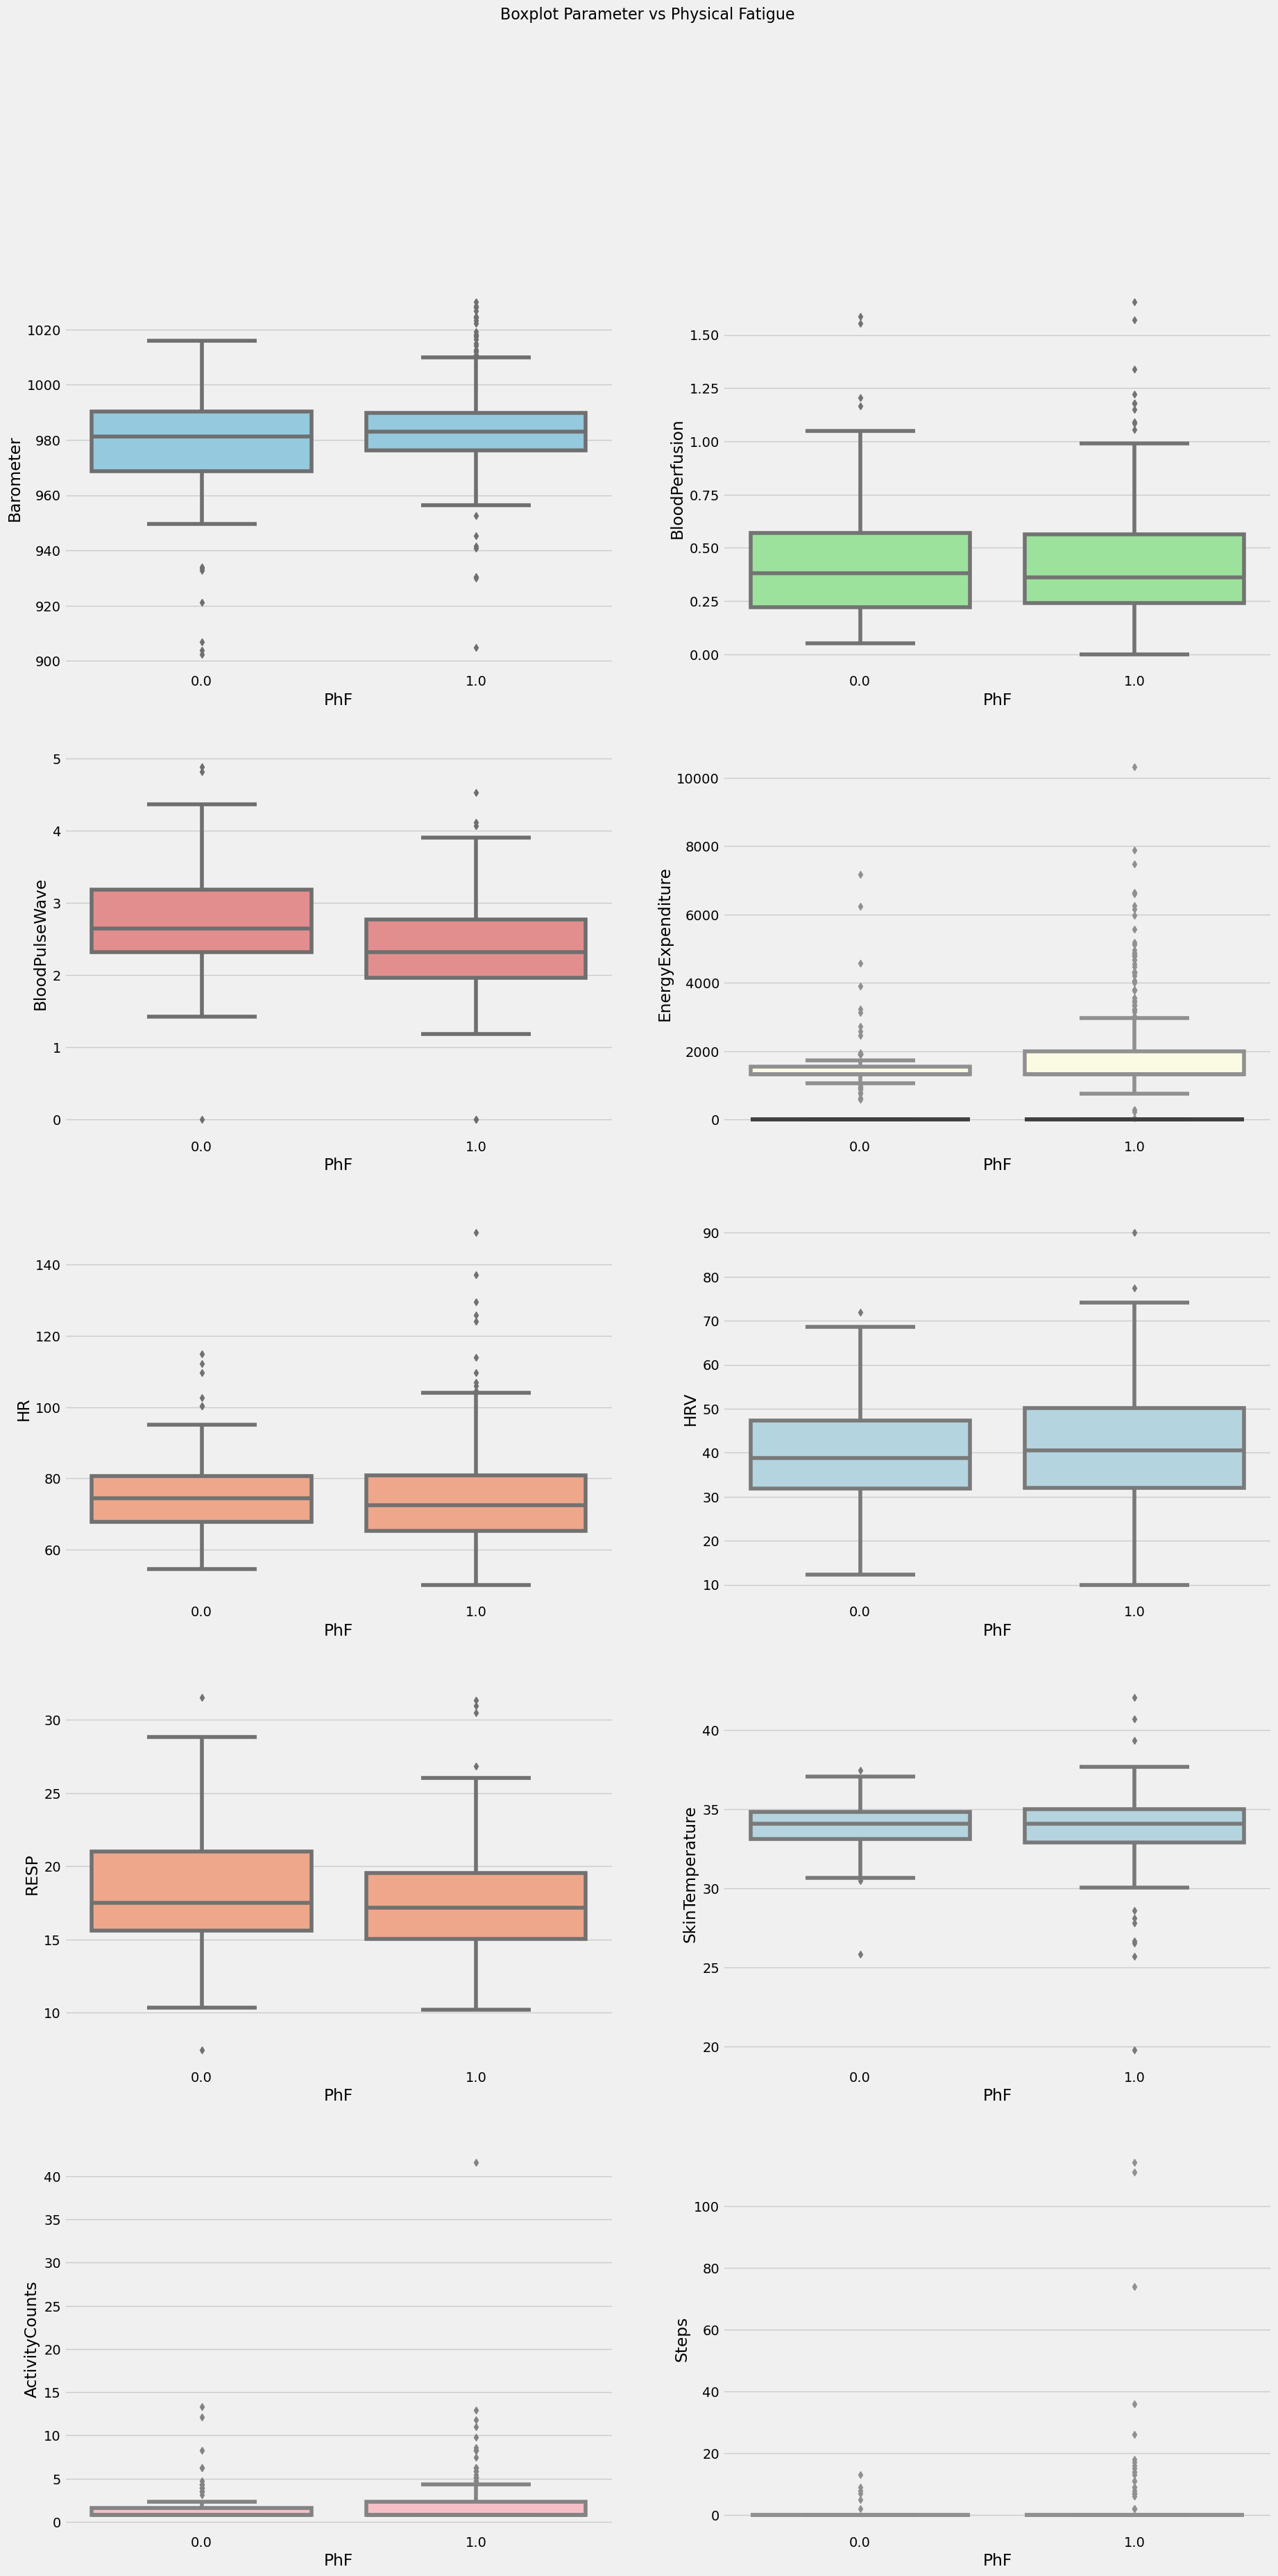

In [37]:
combined_df=df.copy()
fig, axes = plt.subplots(5, 2, figsize=(20, 40))


sns.boxplot(x='PhF', y='Barometer', data=combined_df, ax=axes[0, 0], color='skyblue')
sns.boxplot(x='PhF', y='BloodPerfusion', data=combined_df, ax=axes[0, 1], color='lightgreen')
sns.boxplot(x='PhF', y='BloodPulseWave', data=combined_df, ax=axes[1, 0], color='lightcoral')
sns.boxplot(x='PhF', y='GalvanicSkinResponse', data=combined_df, ax=axes[1, 1], color='lightseagreen')
sns.boxplot(x='PhF', y='HR', data=combined_df, ax=axes[2, 0], color='lightsalmon')
sns.boxplot(x='PhF', y="HRV", data=combined_df, ax=axes[2, 1], color='lightblue')

sns.boxplot(x='PhF', y='RESP', data=combined_df, ax=axes[3, 0], color='lightsalmon')
sns.boxplot(x='PhF', y="SkinTemperature", data=combined_df, ax=axes[3, 1], color='lightblue')

sns.boxplot(x='PhF', y='ActivityCounts', data=combined_df, ax=axes[4, 0], color='lightpink')


sns.boxplot(x='PhF', y='Steps', data=combined_df, ax=axes[4, 1], color='lightyellow')

sns.boxplot(x='PhF', y='EnergyExpenditure', data=combined_df, ax=axes[1, 1], color='lightyellow')

fig.suptitle("Boxplot Parameter vs Physical Fatigue", fontsize=16)
plt.show()


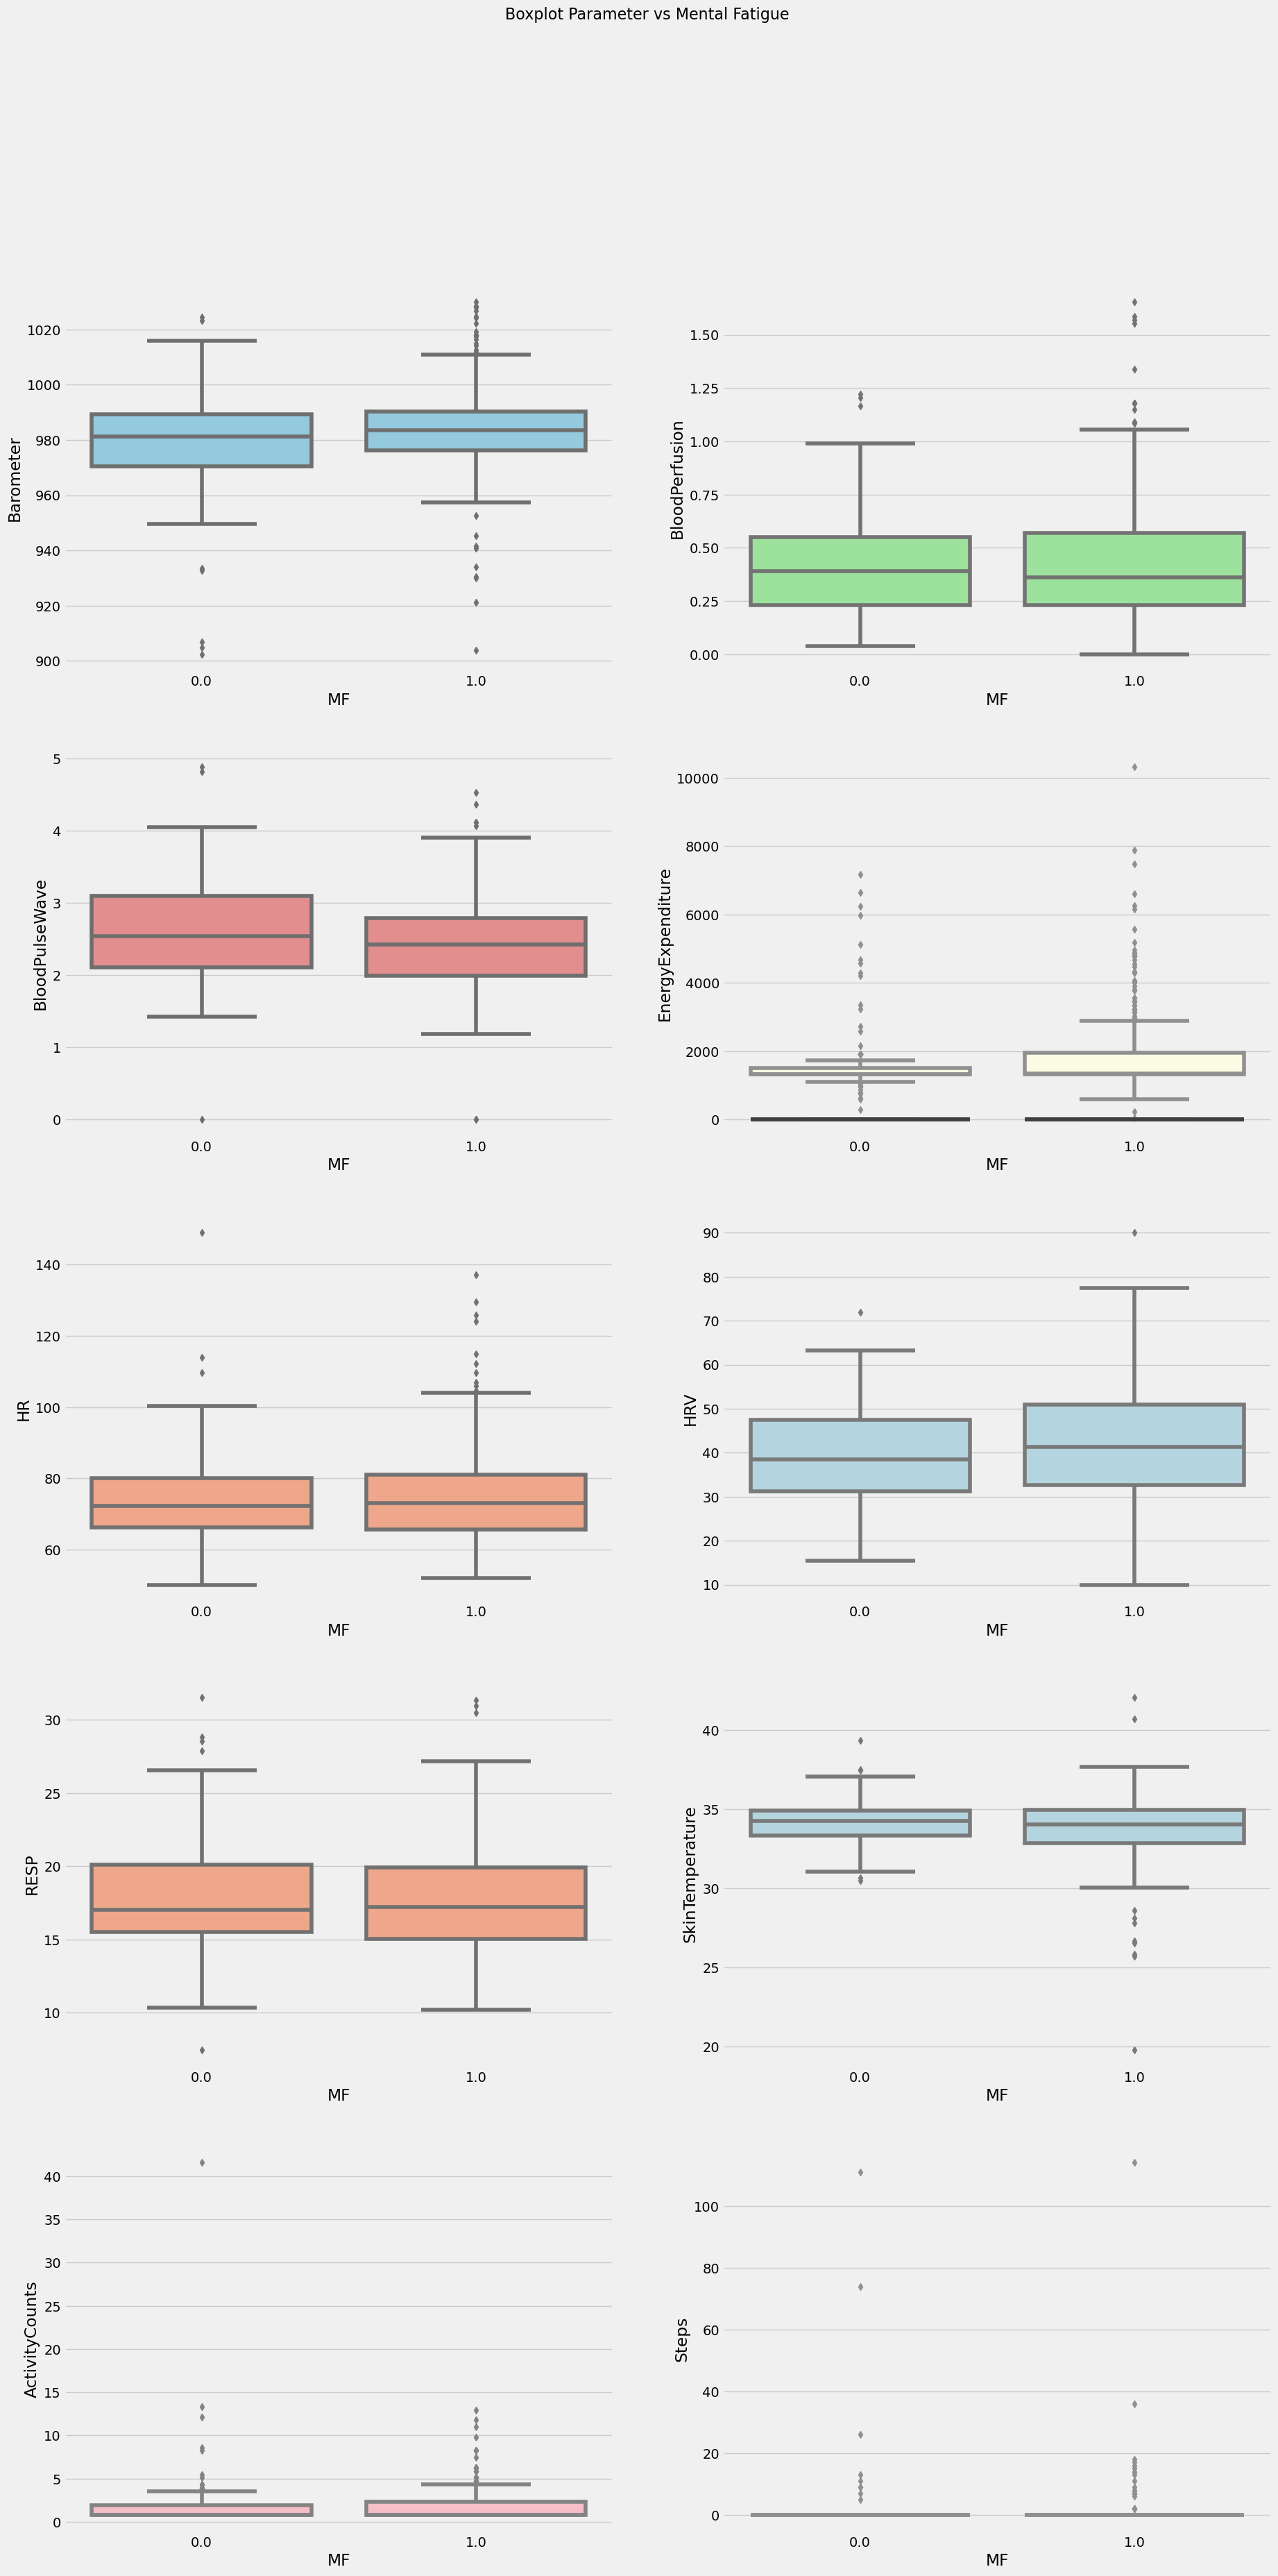

In [38]:
combined_df=df.copy()
fig, axes = plt.subplots(5, 2, figsize=(20, 40))


sns.boxplot(x='MF', y='Barometer', data=combined_df, ax=axes[0, 0], color='skyblue')
sns.boxplot(x='MF', y='BloodPerfusion', data=combined_df, ax=axes[0, 1], color='lightgreen')
sns.boxplot(x='MF', y='BloodPulseWave', data=combined_df, ax=axes[1, 0], color='lightcoral')
sns.boxplot(x='MF', y='GalvanicSkinResponse', data=combined_df, ax=axes[1, 1], color='lightseagreen')
sns.boxplot(x='MF', y='HR', data=combined_df, ax=axes[2, 0], color='lightsalmon')
sns.boxplot(x='MF', y="HRV", data=combined_df, ax=axes[2, 1], color='lightblue')

sns.boxplot(x='MF', y='RESP', data=combined_df, ax=axes[3, 0], color='lightsalmon')
sns.boxplot(x='MF', y="SkinTemperature", data=combined_df, ax=axes[3, 1], color='lightblue')

sns.boxplot(x='MF', y='ActivityCounts', data=combined_df, ax=axes[4, 0], color='lightpink')


sns.boxplot(x='MF', y='Steps', data=combined_df, ax=axes[4, 1], color='lightyellow')

sns.boxplot(x='MF', y='EnergyExpenditure', data=combined_df, ax=axes[1, 1], color='lightyellow')

fig.suptitle("Boxplot Parameter vs Mental Fatigue", fontsize=16)
plt.show()


In [39]:
# Display the merged DataFrame
merged_df

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0   2019-03-14 20:01:00        4.705882     981.45           0.560   
1   2019-03-15 20:01:00        0.784314     989.90           1.340   
2   2019-03-16 20:47:00        2.352941     984.00           0.445   
3   2019-03-17 20:01:00        0.784314     987.50           0.970   
4   2019-03-18 20:13:00        1.960784     994.80           0.905   
..                  ...             ...        ...             ...   
346 2019-08-05 19:13:00        0.784314     975.35           0.790   
347 2019-09-05 21:08:00        1.176471     978.40           0.550   
348 2019-10-05 14:27:00        0.784314     980.80           0.400   
349 2019-11-05 17:31:00        0.784314     984.50           0.690   
350 2019-12-05 18:14:00        2.352941     997.20           0.320   

     BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0              1.78        1311.853180              4.720039  81.054318   
1              2.57        1311.853180              2.724856  71.733333   
2              3.49        1564.398731                   NaN  73.214010   
3              2.00        1311.853180              4.504256  61.254413   
4              2.25        1496.649544                   NaN  66.113844   
..              ...                ...                   ...        ...   
346            1.42        1330.995827                   NaN  58.534651   
347            1.81        1330.995827                   NaN  69.785286   
348            1.48        1330.995827                   NaN  57.934461   
349            2.30        1330.995827                   NaN  66.016667   
350            3.07        1330.995827                   NaN  76.561253   

           HRV       RESP  Steps  SkinTemperature  SubjectID ActivityClass  \
0    31.266667  16.796793    7.0           33.780          1     undefined   
1    28.600000  21.099766    0.0           34.190          1     undefined   
2    41.633333   7.458851   13.0           34.590          1     undefined   
3    49.150000  18.116667    0.0           34.910          1     undefined   
4          NaN  22.205708    9.0           35.735          1     undefined   
..         ...        ...    ...              ...        ...           ...   
346  33.251923  13.850000    0.0           33.560          9     undefined   
347  52.966667  15.033377    0.0           33.560          9     undefined   
348  32.065970  13.695884    0.0           34.280          9     undefined   
349  23.193151  21.119940    0.0           35.000          9       resting   
350  41.466667  21.551075    0.0           34.720          9     undefined   

     SkinTemperature.Value            DateTime Timezone VAS  RelP  PhF   MF  \
0                      NaN 2019-03-14 20:01:00      UTC   0  -1.0  0.0  1.0   
1                      NaN 2019-03-15 20:01:00      UTC   0   1.0  1.0  1.0   
2                      NaN 2019-03-16 20:47:00      UTC   0   0.0  0.0  0.0   
3                      NaN 2019-03-17 20:01:00      UTC   0   0.0  1.0  0.0   
4                      NaN 2019-03-18 20:13:00      UTC   0  -1.0  1.0  0.0   
..                     ...                 ...      ...  ..   ...  ...  ...   
346                    NaN 2019-08-05 19:13:00      UTC   1  -1.0  0.0  0.0   
347                    NaN 2019-09-05 21:08:00      UTC   1   0.0  0.0  0.0   
348                    NaN 2019-10-05 14:27:00      UTC   1   0.0  0.0  0.0   
349                    NaN 2019-11-05 17:31:00      UTC   1  -1.0  0.0  0.0   
350                    NaN 2019-12-05 18:14:00      UTC   1   1.0  1.0  0.0   

    sport Age range Gender  
0      No     36-45      M  
1     Yes     36-45      M  
2      No     36-45      M  
3     Yes     36-45      M  
4     Yes     36-45      M  
..    ...       ...    ...  
346    No     36-45      M  
347    No     36-45      M  
348    No     36-45      M  
349   Yes     36-45      M  
350   Yes     36-45      M  

[351 rows x 24 columns]

In [40]:
# Convert categorical variable 'ActivityClass' to dummy/indicator variables
merged_df = pd.get_dummies(merged_df, columns=['ActivityClass'])

# Convert specific columns to integer type
merged_df['ActivityClass_biking'] = merged_df['ActivityClass_biking'].astype(int)
merged_df['ActivityClass_other'] = merged_df['ActivityClass_other'].astype(int)
merged_df['ActivityClass_resting'] =merged_df['ActivityClass_resting'].astype(int)
merged_df['ActivityClass_running'] = merged_df['ActivityClass_running'].astype(int)
merged_df['ActivityClass_undefined'] = merged_df['ActivityClass_undefined'].astype(int)
merged_df['ActivityClass_walking'] = merged_df['ActivityClass_walking'].astype(int)


In [41]:
df = merged_df.copy()
# Loop through each column and fill missing values based on the specified conditions for each subject
subjects = df['SubjectID'].unique()
for subject in subjects:
    subject_df = df[df['SubjectID'] == subject].copy()
    subject_df.reset_index(drop=True, inplace=True)
    # Calculate the time differences between consecutive timestamps
    subject_df['TimeDiff'] = subject_df['Timestamp'].diff().dt.total_seconds().div(60).fillna(0)
    # Define the columns for which missing values will be filled
    columns_with_missing_values = df.columns[df.isnull().any()].tolist()
    
    # Loop through each column and fill missing values based on the specified conditions
    for col in columns_with_missing_values:
        prev_missing = False
        for i in range(1, len(subject_df)):
            if subject_df.loc[i, 'TimeDiff'] > 5:
                prev_missing = False  # Reset prev_missing if the time difference is greater than 5 minutes
            if subject_df.loc[i, 'TimeDiff'] <= 2 and prev_missing:
                if pd.isna(subject_df.loc[i, col]):
                    subject_df.loc[i, col] = subject_df.loc[i - 1, col] if not pd.isna(subject_df.loc[i - 1, col]) else (subject_df.loc[i + 1, col] if i + 1 < len(subject_df) else np.nan)
            else:
                if pd.isna(subject_df.loc[i, col]):
                    prev_missing = True
                    if pd.isna(subject_df.loc[i - 1, col]):
                        subject_df.loc[i, col] = subject_df.loc[i - 1, col] if not pd.isna(subject_df.loc[i - 1, col]) else (subject_df.loc[i + 1, col] if i + 1 < len(subject_df) else np.nan)
    df.update(subject_df)

In [42]:
df= df.drop(columns=["DateTime","Timezone","sport"])

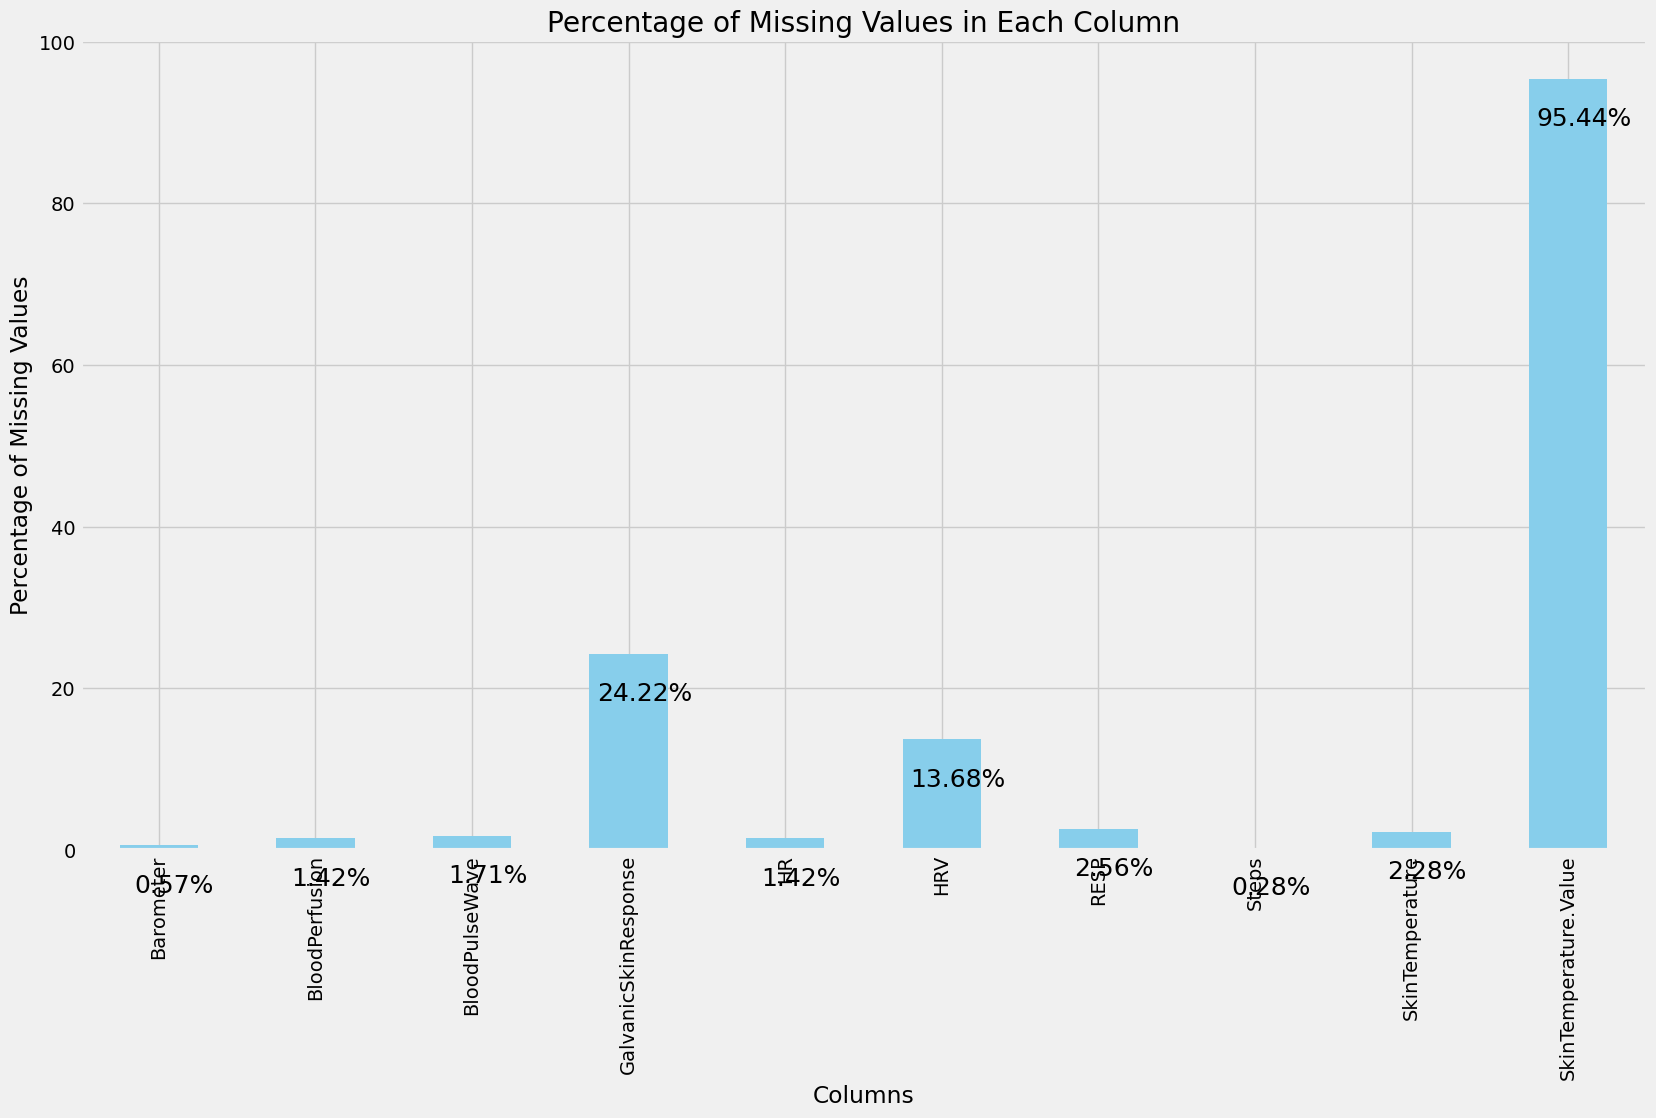

In [43]:
# Assuming 'df' is your DataFrame
missing_percentages = df.isnull().mean() * 100
missing_percentages = missing_percentages[missing_percentages > 0]

# Plotting the graph
plt.figure(figsize=(18, 10))
ax = missing_percentages.plot(kind='bar', color='skyblue')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height():.2f}%', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='black', size=18)
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()


In [44]:
data=df.copy()
subjects = data['SubjectID'].unique()

for subject in subjects:
    # Get the subset of the DataFrame for this subject
    subject_df = data[data['SubjectID'] == subject]
    
     # Define the columns for which missing values will be filled
    columns_with_missing_values = subject_df.columns[subject_df.isnull().any()].tolist()
    
    # Loop through each column and fill missing values based on the specified conditions
    for col in columns_with_missing_values:
    
    # Fill missing values in this subset with mean (or any other value or method you prefer)
        subject_df[col].fillna(subject_df[col].mean(), inplace=True)
    
    # Update the original DataFrame with the filled values
    data.update(subject_df)

print(data.isna().sum())

Timestamp                    0
ActivityCounts               0
Barometer                    0
BloodPerfusion               0
BloodPulseWave               0
EnergyExpenditure            0
GalvanicSkinResponse        12
HR                           0
HRV                          6
RESP                         0
Steps                        0
SkinTemperature              0
SubjectID                    0
SkinTemperature.Value      328
VAS                          0
RelP                         0
PhF                          0
MF                           0
Age range                    0
Gender                       0
ActivityClass_biking         0
ActivityClass_other          0
ActivityClass_resting        0
ActivityClass_running        0
ActivityClass_undefined      0
ActivityClass_walking        0
dtype: int64


In [45]:
data['VAS'] = data['VAS'].astype(int)

data.isna().sum()

# Assuming '36-45' is an 'Age range' category
age_mapping = {'36-45': 1, '26-35': 2,  '46-55': 3}
gender_mapping={"M":1, "F":0}
data['Age range'] = data['Age range'].map(age_mapping)
data['Gender'] = data['Gender'].map(gender_mapping)
data

Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0   2019-06-05 18:49:00        5.098039     990.30            0.36   
1   2019-07-05 17:39:00        0.784314     982.30            0.36   
2   2019-08-05 19:13:00        0.784314     975.35            0.79   
3   2019-09-05 21:08:00        1.176471     978.40            0.55   
4   2019-10-05 14:27:00        0.784314     980.80            0.40   
..                  ...             ...        ...             ...   
346 2019-08-05 19:13:00        0.784314     975.35            0.79   
347 2019-09-05 21:08:00        1.176471     978.40            0.55   
348 2019-10-05 14:27:00        0.784314     980.80            0.40   
349 2019-11-05 17:31:00        0.784314     984.50            0.69   
350 2019-12-05 18:14:00        2.352941     997.20            0.32   

     BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0              3.68        2156.289318              3.437194  84.455276   
1              1.42        1330.995827              4.937549  60.564220   
2              1.42        1330.995827              4.728083  58.534651   
3              1.81        1330.995827              1.104944  69.785286   
4              1.48        1330.995827              1.833883  57.934461   
..              ...                ...                   ...        ...   
346            1.42        1330.995827              2.658671  58.534651   
347            1.81        1330.995827              2.658671  69.785286   
348            1.48        1330.995827              2.658671  57.934461   
349            2.30        1330.995827              2.658671  66.016667   
350            3.07        1330.995827              2.658671  76.561253   

           HRV       RESP  Steps  SkinTemperature  SubjectID  \
0    29.133333  25.304348  111.0            33.69          9   
1    35.000000  14.348831    0.0            34.47          9   
2    33.251923  13.850000    0.0            33.56          9   
3    52.966667  15.033377    0.0            33.56          9   
4    32.065970  13.695884    0.0            34.28          9   
..         ...        ...    ...              ...        ...   
346  33.251923  13.850000    0.0            33.56          9   
347  52.966667  15.033377    0.0            33.56          9   
348  32.065970  13.695884    0.0            34.28          9   
349  23.193151  21.119940    0.0            35.00          9   
350  41.466667  21.551075    0.0            34.72          9   

     SkinTemperature.Value  VAS  RelP  PhF   MF  Age range  Gender  \
0                36.410000    1   1.0  1.0  0.0          1       1   
1                30.780000    1   1.0  1.0  0.0          1       1   
2                32.645000    1  -1.0  0.0  0.0          1       1   
3                32.530000    1   0.0  0.0  0.0          1       1   
4                31.440000    1   0.0  0.0  0.0          1       1   
..                     ...  ...   ...  ...  ...        ...     ...   
346              32.352143    1  -1.0  0.0  0.0          1       1   
347              32.352143    1   0.0  0.0  0.0          1       1   
348              32.352143    1   0.0  0.0  0.0          1       1   
349              32.352143    1  -1.0  0.0  0.0          1       1   
350              32.352143    1   1.0  1.0  0.0          1       1   

     ActivityClass_biking  ActivityClass_other  ActivityClass_resting  \
0                       0                    0                      0   
1                       0                    0                      0   
2                       0                    0                      0   
3                       0                    0                      0   
4                       0                    0                      0   
..                    ...                  ...                    ...   
346                     0                    0                      0   
347                     0                    0                      0   
348  

In [46]:
numerical_df = data.select_dtypes(include=['int64', 'float64'])
data.fillna(numerical_df.mean(),inplace=True)
data.isna().sum()

Timestamp                  0
ActivityCounts             0
Barometer                  0
BloodPerfusion             0
BloodPulseWave             0
EnergyExpenditure          0
GalvanicSkinResponse       0
HR                         0
HRV                        0
RESP                       0
Steps                      0
SkinTemperature            0
SubjectID                  0
SkinTemperature.Value      0
VAS                        0
RelP                       0
PhF                        0
MF                         0
Age range                  0
Gender                     0
ActivityClass_biking       0
ActivityClass_other        0
ActivityClass_resting      0
ActivityClass_running      0
ActivityClass_undefined    0
ActivityClass_walking      0
dtype: int64

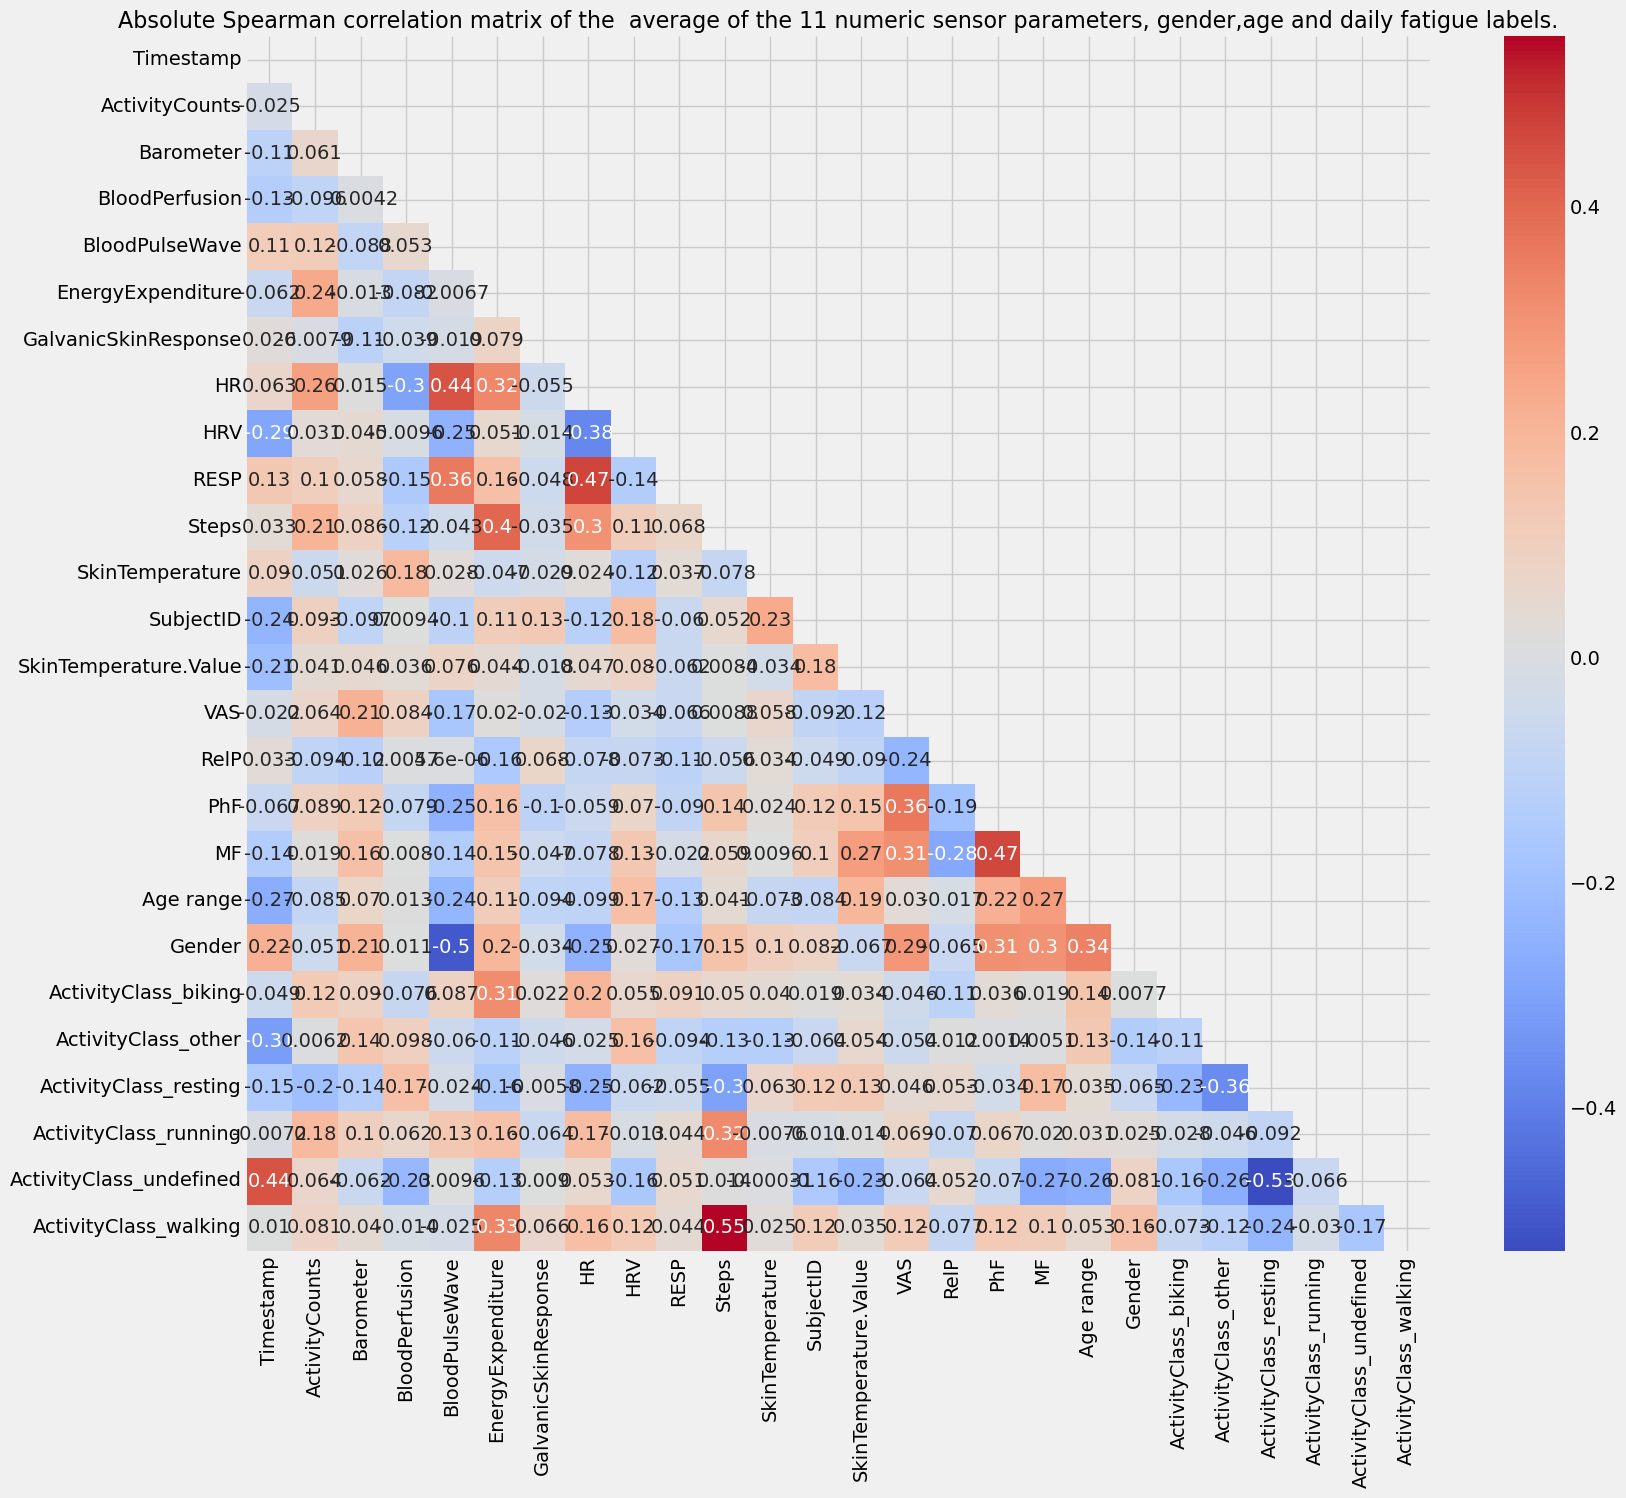

In [47]:
matrix = np.triu(data.corr(method='spearman'))

# Create the heatmap
plt.figure(figsize=(17,15))
sns.heatmap(data.corr(method='spearman'), annot=True, mask=matrix, cmap='coolwarm')
plt.title('Absolute Spearman correlation matrix of the  average of the 11 numeric sensor parameters, gender,age and daily fatigue labels.', size=16)
plt.show()


In [48]:
data.columns

Index(['Timestamp', 'ActivityCounts', 'Barometer', 'BloodPerfusion',
       'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
       'HRV', 'RESP', 'Steps', 'SkinTemperature', 'SubjectID',
       'SkinTemperature.Value', 'VAS', 'RelP', 'PhF', 'MF', 'Age range',
       'Gender', 'ActivityClass_biking', 'ActivityClass_other',
       'ActivityClass_resting', 'ActivityClass_running',
       'ActivityClass_undefined', 'ActivityClass_walking'],
      dtype='object')

## Step 4.1: Data Set Preparation for Model Implementation

In this step, the dataset will be prepared for model implementation. Various tasks will be performed, including data cleaning, normalization, and encoding categorical variables.



In [49]:


# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns to be used for normalization
columns_for_normalization = ['ActivityCounts', 'Barometer', 'BloodPerfusion',
       'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
       'HRV', 'RESP', 'Steps', 'SkinTemperature','ActivityClass_biking', 'ActivityClass_other', 'ActivityClass_resting',
       'ActivityClass_running', 'ActivityClass_undefined',
       'ActivityClass_walking', 'Age range', 'Gender']

# Fit the scaler to the selected columns in the DataFrame
scaler.fit(data[columns_for_normalization])

# Normalize the selected columns in the DataFrame
data[columns_for_normalization] = scaler.transform(data[columns_for_normalization])

In [50]:
# Extracting features and target variables
X = data.drop(columns=["Timestamp", 'VAS','RelP', 'PhF', 'MF','SubjectID'])
y1 = data["PhF"]
y2 = data["MF"]

In [51]:
#dividing the data set into two parts for working with the algorithm
xtrain, xVal, y1train, y1Val = train_test_split(X, y1, test_size=0.20, stratify=y1, random_state=42)
xtrain, xVal, y2train, y2Val = train_test_split(X, y2, test_size=0.20, stratify=y2, random_state=42)

print(xtrain.shape)
print(y1train.shape)
print(y2train.shape)
print(xVal.shape)
print(y1Val.shape)
print(y2Val.shape)

(280, 20)
(280,)
(280,)
(71, 20)
(71,)
(71,)


## Step 5. Working with models

In [52]:
from sklearn.metrics import confusion_matrix
# Function to train models and evaluate performance
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    clf = model
    clf.fit(xtrain, y1train)
    
   
    
    predicted = clf.predict(xVal)
    te_accuracy = accuracy_score(predicted, y1Val) * 100
    te_precision = precision_score(predicted, y1Val, average='binary')
    te_recall = recall_score(predicted, y1Val, average='binary')
    te_f1_score = f1_score(predicted, y1Val, average='binary')
    te_confusion_matrix = confusion_matrix(predicted, y1Val)
    
    # Storing the evaluation metrics in a dictionary
    d['Name'].append(name)
   
    d['Testing Accuracy'].append(te_accuracy)
    d['Testing Precision'].append(te_precision)
    d['Testing Recall'].append(te_recall)
    d['Testing F1-Score'].append(te_f1_score)

    
    print("**********" * 5)
    print()
    return d

# Dictionary to store the evaluation metrics
d = {'Name': [],
     'Testing Accuracy': [], 'Testing Precision': [], 'Testing Recall': [], 'Testing F1-Score': [],}

# List of models to be trained and evaluated
models = [
    [RandomForestClassifier(n_estimators=350, random_state=seed), 'Random Forest'],
    [DecisionTreeClassifier(random_state=seed), 'Decision Tree'], 
    [LGBMClassifier(random_state=seed), 'LightGBM'],
    [MLPClassifier(max_iter=1000, random_state=seed), "MlpClassifer"],
    [GaussianNB(), 'Naive Bayes'],
    [LogisticRegression(random_state=seed), 'Logistic Regression'], 
    [SVC(random_state=seed, probability=True), 'Support Vector Machine'],
    [XGBClassifier(random_state=seed), 'XGBoost'],
]

# Training the models and storing the results in the dictionary
for model in models:
    d = Models(model[0], model[1], d)

# Creating a dataframe from the dictionary
print("Performance Metric for single Algo for physical Fatigue")
acu_data = pd.DataFrame(data=d)
acu_data


Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on LightGBM model
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 202, number of negative: 78
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.721429 -> initscore=0.951559
[LightGBM] [Info] Start training from score 0.951559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

**************************************************

Working on Naive Bayes model
**************************************************

Working on Logistic Regression model
**************************************************

Working on Support Vector Machine model
**************************************************

Working on XGBoost model
**************************************************

Performance Metric for single Algo for physical Fatigue


Name  Testing Accuracy  Testing Precision  \
0           Random Forest         66.197183           0.901961   
1           Decision Tree         60.563380           0.725490   
2                LightGBM         66.197183           0.882353   
3            MlpClassifer         57.746479           0.784314   
4             Naive Bayes         28.169014           0.058824   
5     Logistic Regression         73.239437           0.980392   
6  Support Vector Machine         71.830986           1.000000   
7                 XGBoost         63.380282           0.843137   

   Testing Recall  Testing F1-Score  
0        0.707692          0.793103  
1        0.725490          0.725490  
2        0.714286          0.789474  
3        0.677966          0.727273  
4        0.500000          0.105263  
5        0.735294          0.840336  
6        0.718310          0.836066  
7        0.704918          0.767857

In [53]:
from scipy.stats import chi2_contingency


In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2_contingency

# Function to train models and evaluate performance
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    clf = model
    clf.fit(xtrain, y1train)
    
    predicted = clf.predict(xVal)
    te_confusion_matrix = confusion_matrix(y1Val, predicted)
    
    # Extracting True Positive, True Negative, False Positive, and False Negative from the confusion matrix
    TP = te_confusion_matrix[1, 1]
    TN = te_confusion_matrix[0, 0]
    FP = te_confusion_matrix[0, 1]
    FN = te_confusion_matrix[1, 0]
    
    
    
    
    # Calculating the test set error
    test_set_error = (FP + FN) / float(TP + TN + FP + FN)
    
    # Calculating the mean error
    mean_error = (FP + FN) / 2.0
    
    # Storing the evaluation metrics in a dictionary
    d['Name'].append(name)
    d['True Positive'].append(TP)
    d['True Negative'].append(TN)
    d['False Positive'].append(FP)
    d['False Negative'].append(FN)
    d['Test Set Error'].append(test_set_error)
    d['Mean Error'].append(mean_error)
    
    print("**********" * 5)
    print()
    return d

# Dictionary to store the evaluation metrics
d = {'Name': [], 'True Positive': [], 'True Negative': [], 'False Positive': [], 'False Negative': [],
 'Test Set Error': [], 'Mean Error': []}

# List of models to be trained and evaluated
models = [
    [RandomForestClassifier(n_estimators=350, random_state=seed), 'Random Forest'],
    [DecisionTreeClassifier(random_state=seed), 'Decision Tree'], 
    [LGBMClassifier(random_state=seed), 'LightGBM'],
    [MLPClassifier(max_iter=1000, random_state=seed), "MlpClassifer"],
    [GaussianNB(), 'Naive Bayes'],
    [LogisticRegression(random_state=seed), 'Logistic Regression'], 
    [SVC(random_state=seed, probability=True), 'Support Vector Machine'],
    [XGBClassifier(random_state=seed), 'XGBoost'],
]

# Training the models and storing the results in the dictionary
for model in models:
    d = Models(model[0], model[1], d)

# Creating a dataframe from the dictionary
print("Performance Metric for single Algorithm(confusion matrix) for Physical Fatigue")
acu_data = pd.DataFrame(data=d)
acu_data


Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on LightGBM model
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 202, number of negative: 78
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.721429 -> initscore=0.951559
[LightGBM] [Info] Start training from score 0.951559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

**************************************************

Working on Naive Bayes model
**************************************************

Working on Logistic Regression model
**************************************************

Working on Support Vector Machine model
**************************************************

Working on XGBoost model
**************************************************

Performance Metric for single Algorithm(confusion matrix) for Physical Fatigue


Name  True Positive  True Negative  False Positive  \
0           Random Forest             46              1              19   
1           Decision Tree             37              6              14   
2                LightGBM             45              2              18   
3            MlpClassifer             40              1              19   
4             Naive Bayes              3             17               3   
5     Logistic Regression             50              2              18   
6  Support Vector Machine             51              0              20   
7                 XGBoost             43              2              18   

   False Negative  Test Set Error  Mean Error  
0               5        0.338028        12.0  
1              14        0.394366        14.0  
2               6        0.338028        12.0  
3              11        0.422535        15.0  
4              48        0.718310        25.5  
5               1        0.267606         9.5  
6               0        0.281690        10.0  
7               8        0.366197        13.0

In [56]:
acu_data

Name  True Positive  True Negative  False Positive  \
0           Random Forest             46              1              19   
1           Decision Tree             37              6              14   
2                LightGBM             45              2              18   
3            MlpClassifer             40              1              19   
4             Naive Bayes              3             17               3   
5     Logistic Regression             50              2              18   
6  Support Vector Machine             51              0              20   
7                 XGBoost             43              2              18   

   False Negative  Test Set Error  Mean Error  
0               5        0.338028        12.0  
1              14        0.394366        14.0  
2               6        0.338028        12.0  
3              11        0.422535        15.0  
4              48        0.718310        25.5  
5               1        0.267606         9.5  
6               0        0.281690        10.0  
7               8        0.366197        13.0

In [57]:
from sklearn.metrics import confusion_matrix
# Function to train models and evaluate performance
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    clf = model
    clf.fit(xtrain, y2train)
    
   
    
    predicted = clf.predict(xVal)
    te_accuracy = accuracy_score(predicted, y2Val) * 100
    te_precision = precision_score(predicted, y2Val, average='binary')
    te_recall = recall_score(predicted, y2Val, average='binary')
    te_f1_score = f1_score(predicted, y2Val, average='binary')
    te_confusion_matrix = confusion_matrix(predicted, y2Val)
    
    # Storing the evaluation metrics in a dictionary
    d['Name'].append(name)
   
    d['Testing Accuracy'].append(te_accuracy)
    d['Testing Precision'].append(te_precision)
    d['Testing Recall'].append(te_recall)
    d['Testing F1-Score'].append(te_f1_score)

    
    print("**********" * 5)
    print()
    return d

# Dictionary to store the evaluation metrics
d = {'Name': [],
     'Testing Accuracy': [], 'Testing Precision': [], 'Testing Recall': [], 'Testing F1-Score': [],}

# List of models to be trained and evaluated
models = [
    [RandomForestClassifier(n_estimators=350, random_state=seed), 'Random Forest'],
    [DecisionTreeClassifier(random_state=seed), 'Decision Tree'], 
    [LGBMClassifier(random_state=seed), 'LightGBM'],
    [MLPClassifier(max_iter=1000, random_state=seed), "MlpClassifer"],
    [GaussianNB(), 'Naive Bayes'],
    [LogisticRegression(random_state=seed), 'Logistic Regression'], 
    [SVC(random_state=seed, probability=True), 'Support Vector Machine'],
    [XGBClassifier(random_state=seed), 'XGBoost'],
]

# Training the models and storing the results in the dictionary
for model in models:
    d = Models(model[0], model[1], d)

# Creating a dataframe from the dictionary
print("Performance Metric for single Algo for Mental Fatigue")
acu_data_mf = pd.DataFrame(data=d)
acu_data_mf


Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on LightGBM model
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 185, number of negative: 95
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.660714 -> initscore=0.666479
[LightGBM] [Info] Start training from score 0.666479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

**************************************************

Working on Naive Bayes model
**************************************************

Working on Logistic Regression model
**************************************************

Working on Support Vector Machine model
**************************************************

Working on XGBoost model
**************************************************

Performance Metric for single Algo for Mental Fatigue


Name  Testing Accuracy  Testing Precision  \
0           Random Forest         83.098592           0.936170   
1           Decision Tree         71.830986           0.787234   
2                LightGBM         80.281690           0.893617   
3            MlpClassifer         70.422535           0.808511   
4             Naive Bayes         38.028169           0.085106   
5     Logistic Regression         71.830986           0.914894   
6  Support Vector Machine         66.197183           1.000000   
7                 XGBoost         80.281690           0.914894   

   Testing Recall  Testing F1-Score  
0        0.830189          0.880000  
1        0.787234          0.787234  
2        0.823529          0.857143  
3        0.760000          0.783505  
4        0.800000          0.153846  
5        0.728814          0.811321  
6        0.661972          0.796610  
7        0.811321          0.860000

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2_contingency

# Function to train models and evaluate performance
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    clf = model
    clf.fit(xtrain, y2train)
    
    predicted = clf.predict(xVal)
    te_confusion_matrix = confusion_matrix(y2Val, predicted)
    
    # Extracting True Positive, True Negative, False Positive, and False Negative from the confusion matrix
    TP = te_confusion_matrix[1, 1]
    TN = te_confusion_matrix[0, 0]
    FP = te_confusion_matrix[0, 1]
    FN = te_confusion_matrix[1, 0]
    
    
    # Calculating the test set error
    test_set_error = (FP + FN) / float(TP + TN + FP + FN)
    
    # Calculating the mean error
    mean_error = (FP + FN) / 2.0
    
    # Storing the evaluation metrics in a dictionary
    d['Name'].append(name)
    d['True Positive'].append(TP)
    d['True Negative'].append(TN)
    d['False Positive'].append(FP)
    d['False Negative'].append(FN)
    d['Test Set Error'].append(test_set_error)
    d['Mean Error'].append(mean_error)
    
    print("**********" * 5)
    print()
    return d

# Dictionary to store the evaluation metrics
d = {'Name': [], 'True Positive': [], 'True Negative': [], 'False Positive': [], 'False Negative': [],
 'Test Set Error': [], 'Mean Error': []}

# List of models to be trained and evaluated
models = [
    [RandomForestClassifier(n_estimators=350, random_state=seed), 'Random Forest'],
    [DecisionTreeClassifier(random_state=seed), 'Decision Tree'], 
    [LGBMClassifier(random_state=seed), 'LightGBM'],
    [MLPClassifier(max_iter=1000, random_state=seed), "MlpClassifer"],
    [GaussianNB(), 'Naive Bayes'],
    [LogisticRegression(random_state=seed), 'Logistic Regression'], 
    [SVC(random_state=seed, probability=True), 'Support Vector Machine'],
    [XGBClassifier(random_state=seed), 'XGBoost'],
]

# Training the models and storing the results in the dictionary
for model in models:
    d = Models(model[0], model[1], d)

# Creating a dataframe from the dictionary
print("Performance Metric for single Algorithm(confusion matrix) for Mental Fatigue")
acu_data = pd.DataFrame(data=d)
acu_data


Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on LightGBM model
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 185, number of negative: 95
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 741
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.660714 -> initscore=0.666479
[LightGBM] [Info] Start training from score 0.666479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

**************************************************

Working on Naive Bayes model
**************************************************

Working on Logistic Regression model
**************************************************

Working on Support Vector Machine model
**************************************************

Working on XGBoost model
**************************************************

Performance Metric for single Algorithm(confusion matrix) for Mental Fatigue


Name  True Positive  True Negative  False Positive  \
0           Random Forest             44             15               9   
1           Decision Tree             37             14              10   
2                LightGBM             42             15               9   
3            MlpClassifer             38             12              12   
4             Naive Bayes              4             23               1   
5     Logistic Regression             43              8              16   
6  Support Vector Machine             47              0              24   
7                 XGBoost             43             14              10   

   False Negative  Test Set Error  Mean Error  
0               3        0.169014         6.0  
1              10        0.281690        10.0  
2               5        0.197183         7.0  
3               9        0.295775        10.5  
4              43        0.619718        22.0  
5               4        0.281690        10.0  
6               0        0.338028        12.0  
7               4        0.197183         7.0

### Random Forest

HYpe TUne 

In [59]:
# Splitting dataset into train and validation sets for physical fatigue
test_size = 0.20
seed = 42
xtrain, xVal, y1train, y1Val = train_test_split(X, y1, test_size=0.20, stratify=y1, random_state=42)

# Define the hyperparameters for the Random Forest model
param_grid = {
    'n_estimators': [3, 10, 50, 100, 300, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 30, 50, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Evaluate the Random Forest model for physical fatigue
results_dict = {}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(xtrain, y1train)
best_rf_ = grid_search.best_estimator_
y_pred = best_rf_.predict(xVal)
accuracy = accuracy_score(y1Val, y_pred) * 100
weighted_precision = precision_score(y1Val, y_pred, average='binary')
weighted_recall = recall_score(y1Val, y_pred, average='binary')
weighted_f1_score = f1_score(y1Val, y_pred, average='binary')

results_dict["Physical Fatigue"] = {
    'Model': 'Random Forest',
    'Accuracy [%]': f"{accuracy:.2f}",
    'Weighted precision': f"{weighted_precision:.2f}",
    'Weighted recall': f"{weighted_recall:.2f}",
    'Weighted F1 score': f"{weighted_f1_score:.2f}"
}

# Splitting dataset into train and validation sets for mental fatigue
xtrain, xVal, y2train, y2Val = train_test_split(X, y2, test_size=0.20, stratify=y2, random_state=42)

# Evaluate the Random Forest model for mental fatigue
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(xtrain, y2train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(xVal)
accuracy = accuracy_score(y2Val, y_pred) * 100
weighted_precision = precision_score(y2Val, y_pred, average='binary')
weighted_recall = recall_score(y2Val, y_pred, average='binary')
weighted_f1_score = f1_score(y2Val, y_pred, average='binary')

results_dict["Mental Fatigue"] = {
    'Model': 'Random Forest',
    'Accuracy [%]': f"{accuracy:.2f}",
    'Weighted precision': f"{weighted_precision:.2f}",
    'Weighted recall': f"{weighted_recall:.2f}",
    'Weighted F1 score': f"{weighted_f1_score:.2f}"
}

# Display the results in tabular form
print("Classification Results")
print("\nPhysical Fatigue")
results_df = pd.DataFrame(results_dict["Physical Fatigue"], index=[0])
print(results_df.to_string(index=False))

print("\nMental Fatigue")
results_df = pd.DataFrame(results_dict["Mental Fatigue"], index=[0])
print(results_df.to_string(index=False))


Classification Results

Physical Fatigue
        Model Accuracy [%] Weighted precision Weighted recall Weighted F1 score
Random Forest        77.46               0.80            0.92              0.85

Mental Fatigue
        Model Accuracy [%] Weighted precision Weighted recall Weighted F1 score
Random Forest        83.10               0.82            0.96              0.88


### XGBoost Classifier

In [60]:
import optuna

In [61]:
# Define the function for the Optuna objective
def objective(trial):
    # Providing a different range of hyperparameters that Optuna will work with
    params = {
        "objective": "binary:logistic",  # for classification tasks
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    model = xgb.XGBClassifier(**params, random_state=seed)  # using XGBoost classifier
    model.fit(xtrain, y1train, verbose=False) # fitting the model on the training data
    predictions_PH = model.predict(xVal) # making predictions on the validation data
    accuracy = accuracy_score(y1Val, predictions_PH)  # calculating accuracy score
    return 1.0 - accuracy  # as Optuna minimizes the objective

# Training the model and finding the best set of parameters
study_PH = optuna.create_study(direction='minimize') # creating an Optuna study object
study_PH.optimize(objective, n_trials=10) # optimizing the objective function with 10 trials

print("Physical Fatigue Metrics:")
print(f"Best accuracy: {1 - study_PH.best_value:.2f}") # printing the best accuracy score
print(f"Best parameters: {study_PH.best_params}") # printing the best parameters

# Getting the best model parameters from "optuna"
params_PH = study_PH.best_params # storing the best parameters in a variable

# Pre-processing datasets to the required type to enable the XGBoost algorithm to work for physical fatigue
dtrain_PH = xgb.DMatrix(xtrain, y1train) # converting the training data to DMatrix format
dtest_PH = xgb.DMatrix(xVal, y1Val) # converting the validation data to DMatrix format

# Training the XGB model
model = xgb.train(
    params_PH,
    dtrain_PH,
    num_boost_round=1000,
    evals=[(dtest_PH, "Test")],
    early_stopping_rounds=10
) # training the XGB model with early stopping

# Predicting the probabilities of each class with the trained model
pred_probs = model.predict(dtest_PH) # predicting the probabilities of each class

# Converting probabilities to class labels for binary classification
pred_labels = np.where(pred_probs > 0.5, 1, 0) # converting probabilities to labels based on a threshold of 0.5

# Calculating accuracy score and other metrics
accuracy = accuracy_score(y1Val, pred_labels) # calculating accuracy score
precision = precision_score(y1Val, pred_labels, average='binary') # calculating precision score
recall = recall_score(y1Val, pred_labels, average='binary') # calculating recall score
f1score = f1_score(y1Val, pred_labels, average='binary') # calculating f1 score

print(f"Accuracy for XGB model for Physical Fatigue is: {accuracy:.2f}%")
print(f"Precision for XGB model  for Physical Fatigue is: {precision:.2f}")
print(f"Recall for XGB model  for Physical Fatigue is: {recall:.2f}")
print(f"F1 Score for XGB model  for Physical Fatigue is: {f1score:.2f}")


[I 2023-11-15 06:15:12,461] A new study created in memory with name: no-name-695c21a4-12c5-49f8-a5ab-caf2fd6c1477
[I 2023-11-15 06:15:12,849] Trial 0 finished with value: 0.2816901408450704 and parameters: {'learning_rate': 0.014178750268139726, 'max_depth': 1, 'subsample': 0.5698955263532528, 'colsample_bytree': 0.18438483644457848, 'min_child_weight': 16}. Best is trial 0 with value: 0.2816901408450704.
[I 2023-11-15 06:15:13,666] Trial 1 finished with value: 0.2676056338028169 and parameters: {'learning_rate': 0.0029775650543108862, 'max_depth': 10, 'subsample': 0.7669907149894206, 'colsample_bytree': 0.624956459268392, 'min_child_weight': 3}. Best is trial 1 with value: 0.2676056338028169.
[I 2023-11-15 06:15:14,058] Trial 2 finished with value: 0.2816901408450704 and parameters: {'learning_rate': 0.01748176581755453, 'max_depth': 6, 'subsample': 0.301840035364223, 'colsample_bytree': 0.5840101203898211, 'min_child_weight': 10}. Best is trial 1 with value: 0.2676056338028169.
[I 20

Physical Fatigue Metrics:
Best accuracy: 0.73
Best parameters: {'learning_rate': 0.0029775650543108862, 'max_depth': 10, 'subsample': 0.7669907149894206, 'colsample_bytree': 0.624956459268392, 'min_child_weight': 3}
[0]	Test-rmse:0.44977
[1]	Test-rmse:0.44990
[2]	Test-rmse:0.45006
[3]	Test-rmse:0.45002
[4]	Test-rmse:0.44991
[5]	Test-rmse:0.44983
[6]	Test-rmse:0.45010
[7]	Test-rmse:0.45014
[8]	Test-rmse:0.45009
[9]	Test-rmse:0.45030
Accuracy for XGB model for Physical Fatigue is: 0.72%
Precision for XGB model  for Physical Fatigue is: 0.72
Recall for XGB model  for Physical Fatigue is: 1.00
F1 Score for XGB model  for Physical Fatigue is: 0.84


In [62]:
# Adding visualization to the method for the Physical Fatigue
optuna.visualization.plot_optimization_history(study_PH) # plotting the optimization history



In [63]:
# Define the function for the Optuna objective
def objective(trial):
    # Providing a different range of hyperparameters that Optuna will work with
    params = {
        "objective": "binary:logistic",  # for classification tasks
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
    }

    model = xgb.XGBClassifier(**params, random_state=seed)  # using XGBoost classifier
    model.fit(xtrain, y2train, verbose=False) # fitting the model on the training data
    predictions_MF = model.predict(xVal) # making predictions on the validation data
    accuracy = accuracy_score(y2Val, predictions_MF)  # calculating accuracy score
    return 1.0 - accuracy  # as Optuna minimizes the objective

# Training the model and finding the best set of parameters
study_MF = optuna.create_study(direction='minimize') # creating an Optuna study object
study_MF.optimize(objective, n_trials=10) # optimizing the objective function with 10 trials

print("Mental Fatigue Metrics:")
print(f"Best accuracy: {1 - study_PH.best_value:.2f}") # printing the best accuracy score
print(f"Best parameters: {study_PH.best_params}") # printing the best parameters


# Getting the best model parameters from "optuna"
params_MF = study_MF.best_params # storing the best parameters in a variable

# Pre-processing datasets to the required type to enable the XGBoost algorithm to work for physical fatigue
dtrain_MF = xgb.DMatrix(xtrain, y2train) # converting the training data to DMatrix format
dtest_MF = xgb.DMatrix(xVal, y2Val) # converting the validation data to DMatrix format

# Training the XGB model
model = xgb.train(
    params_MF,
    dtrain_MF,
    num_boost_round=1000,
    evals=[(dtest_MF, "Test")],
    early_stopping_rounds=10
) # training the XGB model with early stopping

# Predicting the probabilities of each class with the trained model
pred_probs = model.predict(dtest_MF) # predicting the probabilities of each class

# Converting probabilities to class labels for binary classification
pred_labels = np.where(pred_probs > 0.5, 1, 0) # converting probabilities to labels based on a threshold of 0.5

# Calculating accuracy score and other metrics
accuracy = accuracy_score(y2Val, pred_labels) # calculating accuracy score
precision = precision_score(y2Val, pred_labels, average='binary') # calculating precision score
recall = recall_score(y2Val, pred_labels, average='binary') # calculating recall score
f1score = f1_score(y2Val, pred_labels, average='binary') # calculating f1 score

print(f"Accuracy for XGB model for Mental Fatigue is: {accuracy:.2f}%")
print(f"Precision for XGB model for Mental Fatigue is: {precision:.2f}")
print(f"Recall for XGB model  for Mental Fatigue is: {recall:.2f}")
print(f"F1 Score for XGB model  for Mental Fatigue is: {f1score:.2f}")


[I 2023-11-15 06:15:18,733] A new study created in memory with name: no-name-0247821c-75a0-4e67-8c59-0891c26ff93f
[I 2023-11-15 06:15:19,663] Trial 0 finished with value: 0.18309859154929575 and parameters: {'learning_rate': 0.012360123682329206, 'max_depth': 2, 'subsample': 0.8906528344994702, 'colsample_bytree': 0.8565746780735458, 'min_child_weight': 1}. Best is trial 0 with value: 0.18309859154929575.
[I 2023-11-15 06:15:20,589] Trial 1 finished with value: 0.15492957746478875 and parameters: {'learning_rate': 0.05783166976307469, 'max_depth': 5, 'subsample': 0.9983898766749497, 'colsample_bytree': 0.5601637749808351, 'min_child_weight': 5}. Best is trial 1 with value: 0.15492957746478875.
[I 2023-11-15 06:15:21,869] Trial 2 finished with value: 0.22535211267605637 and parameters: {'learning_rate': 0.003111187155039441, 'max_depth': 5, 'subsample': 0.9989308197405741, 'colsample_bytree': 0.5466550763735548, 'min_child_weight': 6}. Best is trial 1 with value: 0.15492957746478875.
[I

Mental Fatigue Metrics:
Best accuracy: 0.73
Best parameters: {'learning_rate': 0.0029775650543108862, 'max_depth': 10, 'subsample': 0.7669907149894206, 'colsample_bytree': 0.624956459268392, 'min_child_weight': 3}
[0]	Test-rmse:0.46523
[1]	Test-rmse:0.45872
[2]	Test-rmse:0.45180
[3]	Test-rmse:0.44721
[4]	Test-rmse:0.44170
[5]	Test-rmse:0.43530
[6]	Test-rmse:0.43132
[7]	Test-rmse:0.42558
[8]	Test-rmse:0.42295
[9]	Test-rmse:0.42104
[10]	Test-rmse:0.41784
[11]	Test-rmse:0.41420
[12]	Test-rmse:0.41068
[13]	Test-rmse:0.40807
[14]	Test-rmse:0.40791
[15]	Test-rmse:0.40387
[16]	Test-rmse:0.40233
[17]	Test-rmse:0.40011
[18]	Test-rmse:0.39817
[19]	Test-rmse:0.39686
[20]	Test-rmse:0.39528
[21]	Test-rmse:0.39551
[22]	Test-rmse:0.39439
[23]	Test-rmse:0.39366
[24]	Test-rmse:0.39227
[25]	Test-rmse:0.39163
[26]	Test-rmse:0.38972
[27]	Test-rmse:0.38819
[28]	Test-rmse:0.38846
[29]	Test-rmse:0.38801
[30]	Test-rmse:0.38751
[31]	Test-rmse:0.38680
[32]	Test-rmse:0.38673
[33]	Test-rmse:0.38346
[34]	Test-rmse

In [64]:
# Adding visualization to the method for the Mental Fatigue
optuna.visualization.plot_optimization_history(study_MF) # plotting the optimization history


### Combination on voting and stacking

In [65]:
best_rf_,best_rf

(RandomForestClassifier(max_depth=50, max_features='log2', min_samples_split=5,
                        n_estimators=10),
 RandomForestClassifier(max_depth=10, n_estimators=50))

In [66]:
params_PH,params_MF

({'learning_rate': 0.0029775650543108862,
  'max_depth': 10,
  'subsample': 0.7669907149894206,
  'colsample_bytree': 0.624956459268392,
  'min_child_weight': 3},
 {'learning_rate': 0.05783166976307469,
  'max_depth': 5,
  'subsample': 0.9983898766749497,
  'colsample_bytree': 0.5601637749808351,
  'min_child_weight': 5})

### Voting Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the models
rf_model = RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=10)
xgb_model = XGBClassifier(learning_rate=0.004511779773887577,
                          max_depth=3,
                          subsample=0.7108084972652804,
                          colsample_bytree=0.6473730421190823,
                          min_child_weight=2)

# Create the VotingClassifier
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')

# Train the model
voting_model.fit(xtrain, y1train)

# Make predictions
y_pred = voting_model.predict(xVal)

# Calculate and print performance metrics
accuracy = accuracy_score(y1Val, y_pred)
precision = precision_score(y1Val, y_pred)
recall = recall_score(y1Val, y_pred)
f1 = f1_score(y1Val, y_pred)

print("Physical fatigue")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Physical fatigue
Accuracy: 0.6901408450704225
Precision: 0.7164179104477612
Recall: 0.9411764705882353
F1 Score: 0.8135593220338982


In [68]:
# Define the models
rf_model = RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                        n_estimators=50,random_state=42)
xgb_model = XGBClassifier(learning_rate= 0.04501201921307876,
  max_depth= 10,
  subsample= 0.9094160499645898,
  colsample_bytree= 0.08828403824133699,
  min_child_weight= 6)

# Create the VotingClassifier
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')

# Train the model
voting_model.fit(xtrain, y2train)

# Make predictions
y_pred = voting_model.predict(xVal)

# Calculate and print performance metrics
accuracy = accuracy_score(y2Val, y_pred)
precision = precision_score(y2Val, y_pred)
recall = recall_score(y2Val, y_pred)
f1 = f1_score(y2Val, y_pred)
print(" Mental fatigue")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

 Mental fatigue
Accuracy: 0.8028169014084507
Precision: 0.8
Recall: 0.9361702127659575
F1 Score: 0.8627450980392157


### stacking Classifier

In [69]:
from sklearn.ensemble import  StackingClassifier

# Define the base learners.
base_learners = [
                 ('rf',  RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=10)),
                 ('xgb', XGBClassifier(learning_rate=0.004511779773887577,
                          max_depth=3,
                          subsample=0.7108084972652804,
                          colsample_bytree=0.6473730421190823,
                          min_child_weight=2)
)
                ]

# Initialize Stacking Classifier.
clf = StackingClassifier(estimators=base_learners, final_estimator=XGBClassifier())

# Fit the model on our data.
clf.fit(xtrain, y1train)

# Predict the test set results
y_pred = clf.predict(xVal)

# Calculate and print performance metrics
accuracy = accuracy_score(y1Val, y_pred)
precision = precision_score(y1Val, y_pred)
recall = recall_score(y1Val, y_pred)
f1 = f1_score(y1Val, y_pred)
print(" Physical fatigue")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

 Physical fatigue
Accuracy: 0.6056338028169014
Precision: 0.6949152542372882
Recall: 0.803921568627451
F1 Score: 0.7454545454545455


In [70]:
# Define the base learners.
base_learners = [
                 ('rf', RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                        n_estimators=50,random_state=42)),
                 ('xgb', XGBClassifier(learning_rate= 0.04501201921307876,
  max_depth= 10,
  subsample= 0.9094160499645898,
  colsample_bytree= 0.08828403824133699,
  min_child_weight= 6))
                ]

# Initialize Stacking Classifier.
clf = StackingClassifier(estimators=base_learners, final_estimator=XGBClassifier())

# Fit the model on our data.
clf.fit(xtrain, y2train)

# Predict the test set results
y_pred = clf.predict(xVal)

# Calculate and print performance metrics
accuracy = accuracy_score(y2Val, y_pred)
precision = precision_score(y2Val, y_pred)
recall = recall_score(y2Val, y_pred)
f1 = f1_score(y2Val, y_pred)
print(" Mental fatigue")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

 Mental fatigue
Accuracy: 0.7605633802816901
Precision: 0.8
Recall: 0.851063829787234
F1 Score: 0.8247422680412372


### Convolutional Neural Networks (CNN)  for Deep Learning

In [71]:

from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error, f1_score, precision_score, recall_score, matthews_corrcoef

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from sklearn.metrics import classification_report

# Ensure X, y1, xtrain, y1train, xVal, y1Val are defined
num_features = X.shape[1]
num_classes = len(set(y1))

xtrain_tensor = tf.convert_to_tensor(xtrain)
y1train_tensor = tf.convert_to_tensor(y1train)
xVal_tensor = tf.convert_to_tensor(xVal)
y1Val_tensor = tf.convert_to_tensor(y1Val)

# Reshape the data
xtrain_reshaped = tf.reshape(xtrain_tensor, [-1, num_features, 1])
xVal_reshaped = tf.reshape(xVal_tensor, [-1, num_features, 1])

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

def build_model(hp):
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv1D(hp.Int('hidden_neurons_conv1', min_value=32, max_value=128, step=32), hp.Int('kernel_size_conv1', min_value=3, max_value=5, step=2), activation='relu', input_shape=(num_features, 1)),
        tf.keras.layers.Conv1D(hp.Int('hidden_neurons_conv2', min_value=32, max_value=128, step=32), hp.Int('kernel_size_conv2', min_value=3, max_value=5, step=2), activation='relu'),tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(hp.Int('hidden_neurons_fc1', min_value=32, max_value=128, step=32), activation='relu'),
        tf.keras.layers.Dropout(hp.Float('dropout_rate_fc1', min_value=0.0, max_value=0.5)),
        tf.keras.layers.Dense(hp.Int('hidden_neurons_fc2', min_value=32, max_value=128, step=32), activation='relu'),
        tf.keras.layers.Dropout(hp.Float('dropout_rate_fc2', min_value=0.0, max_value=0.5)),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    # Use a variable learning rate
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
)

tuner.search(xtrain_reshaped, y1train_tensor,
             epochs=100,
             validation_data=(xVal_reshaped, y1Val_tensor),
             callbacks=[early_stopping]) 

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(xtrain_reshaped, y1train_tensor,
                    epochs=100,
                    validation_data=(xVal_reshaped,y1Val_tensor))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(xtrain_reshaped,y1train_tensor,
               epochs=best_epoch,
               validation_data=(xVal_reshaped,y1Val_tensor),
              callbacks=[early_stopping],verbose=0)

# Make predictions

y_pred = hypermodel.predict(xVal_reshaped)
pred_labels= np.argmax(y_pred, axis=1)


# Calculating accuracy score and other metrics
accuracy = accuracy_score(y1Val_tensor, pred_labels) # calculating accuracy score
precision = precision_score(y1Val_tensor, pred_labels, average='binary') # calculating precision score
recall = recall_score(y1Val_tensor, pred_labels, average='binary') # calculating recall score
f1score = f1_score(y1Val_tensor, pred_labels, average='binary') # calculating f1 score
MSE = mean_squared_error(y1Val_tensor, pred_labels)

print("Performabce metrics for Physical fatigue ")
print(f"Accuracy for CNN model for Physical Fatigue is: {accuracy:.2f}%")
print(f"Precision for CNN model for Physical Fatigue is: {precision:.2f}")
print(f"Recall for CNN model  for Physical Fatigue is: {recall:.2f}")
print(f"F1 Score for CNN model  for physical Fatigue is: {f1score:.2f}")
print(f"MSE Score for CNN model  for physical Fatigue is: {MSE:.2f}")



Reloading Tuner from .\untitled_project\tuner0.json
Epoch 1/100
9/9 [==============================] - 2s 45ms/step - loss: 1.0362 - accuracy: 0.5714 - val_loss: 0.6026 - val_accuracy: 0.7183
Epoch 2/100
9/9 [==============================] - 0s 18ms/step - loss: 0.6219 - accuracy: 0.7286 - val_loss: 0.5933 - val_accuracy: 0.7183
Epoch 3/100
9/9 [==============================] - 0s 14ms/step - loss: 0.6383 - accuracy: 0.7214 - val_loss: 0.6271 - val_accuracy: 0.7183
Epoch 4/100
9/9 [==============================] - 0s 15ms/step - loss: 0.6247 - accuracy: 0.7214 - val_loss: 0.6059 - val_accuracy: 0.7183
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 0.6076 - accuracy: 0.7214 - val_loss: 0.6054 - val_accuracy: 0.7183
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6068 - accuracy: 0.7214 - val_loss: 0.5949 - val_accuracy: 0.7183
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5954 - accuracy: 0.7214 - val_loss: 

9/9 [==============================] - 0s 8ms/step - loss: 0.5969 - accuracy: 0.7214 - val_loss: 0.5945 - val_accuracy: 0.7183
Epoch 60/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5984 - accuracy: 0.7214 - val_loss: 0.5950 - val_accuracy: 0.7183
Epoch 61/100
9/9 [==============================] - 0s 9ms/step - loss: 0.5946 - accuracy: 0.7214 - val_loss: 0.5952 - val_accuracy: 0.7183
Epoch 62/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5918 - accuracy: 0.7214 - val_loss: 0.5947 - val_accuracy: 0.7183
Epoch 63/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5921 - accuracy: 0.7214 - val_loss: 0.5945 - val_accuracy: 0.7183
Epoch 64/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5917 - accuracy: 0.7214 - val_loss: 0.5945 - val_accuracy: 0.7183
Epoch 65/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5947 - accuracy: 0.7214 - val_loss: 0.5946 - val_accuracy: 0.7183
Epoch 66/100
9/9 [===============

In [72]:

from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error, f1_score, precision_score, recall_score, matthews_corrcoef

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from sklearn.metrics import classification_report

# Ensure X, y1, xtrain, y1train, xVal, y1Val are defined
num_features = X.shape[1]
num_classes = len(set(y2))

xtrain_tensor = tf.convert_to_tensor(xtrain)
y2train_tensor = tf.convert_to_tensor(y2train)
xVal_tensor = tf.convert_to_tensor(xVal)
y2Val_tensor = tf.convert_to_tensor(y2Val)

# Reshape the data
xtrain_reshaped = tf.reshape(xtrain_tensor, [-1, num_features, 1])
xVal_reshaped = tf.reshape(xVal_tensor, [-1, num_features, 1])

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

def build_model(hp):
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv1D(hp.Int('hidden_neurons_conv1', min_value=32, max_value=128, step=32), hp.Int('kernel_size_conv1', min_value=3, max_value=5, step=2), activation='relu', input_shape=(num_features, 1)),
        tf.keras.layers.Conv1D(hp.Int('hidden_neurons_conv2', min_value=32, max_value=128, step=32), hp.Int('kernel_size_conv2', min_value=3, max_value=5, step=2), activation='relu'),tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(hp.Int('hidden_neurons_fc1', min_value=32, max_value=128, step=32), activation='relu'),
        tf.keras.layers.Dropout(hp.Float('dropout_rate_fc1', min_value=0.0, max_value=0.5)),
        tf.keras.layers.Dense(hp.Int('hidden_neurons_fc2', min_value=32, max_value=128, step=32), activation='relu'),
        tf.keras.layers.Dropout(hp.Float('dropout_rate_fc2', min_value=0.0, max_value=0.5)),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    # Use a variable learning rate
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
)

tuner.search(xtrain_reshaped, y1train_tensor,
             epochs=100,
             validation_data=(xVal_reshaped, y2Val_tensor),
             callbacks=[early_stopping]) 

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data for 100 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(xtrain_reshaped, y1train_tensor,
                    epochs=100,
                    validation_data=(xVal_reshaped,y1Val_tensor))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(xtrain_reshaped,y1train_tensor,
               epochs=best_epoch,
               validation_data=(xVal_reshaped,y2Val_tensor),
              callbacks=[early_stopping])

# Make predictions

y_pred = hypermodel.predict(xVal_reshaped)
pred_labels= np.argmax(y_pred, axis=1)


# Calculating accuracy score and other metrics
accuracy = accuracy_score(y2Val_tensor, pred_labels) # calculating accuracy score
precision = precision_score(y2Val_tensor, pred_labels, average='binary') # calculating precision score
recall = recall_score(y2Val_tensor, pred_labels, average='binary') # calculating recall score
f1score = f1_score(y2Val_tensor, pred_labels, average='binary') # calculating f1 score
MSE = mean_squared_error(y2Val_tensor, pred_labels)



print("Performabce metrics for Mental fatigue ")
print(f"Accuracy for  CNN model for Mental Fatigue is: {accuracy:.2f}%")
print(f"Precision for CNN model for Mental Fatigue is: {precision:.2f}")
print(f"Recall for CNN model  for Mental Fatigue is: {recall:.2f}")
print(f"F1 Score for  CNN model  for Mental Fatigue is: {f1score:.2f}")
print(f"MSE Score for  CNN  model  for Mental Fatigue is: {MSE:.2f}")




Reloading Tuner from .\untitled_project\tuner0.json
Epoch 1/100
9/9 [==============================] - 1s 35ms/step - loss: 1.1163 - accuracy: 0.5321 - val_loss: 0.6402 - val_accuracy: 0.7183
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6371 - accuracy: 0.6964 - val_loss: 0.6072 - val_accuracy: 0.7183
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6228 - accuracy: 0.7214 - val_loss: 0.5947 - val_accuracy: 0.7183
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6060 - accuracy: 0.7214 - val_loss: 0.6009 - val_accuracy: 0.7183
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6087 - accuracy: 0.7214 - val_loss: 0.5939 - val_accuracy: 0.7183
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6027 - accuracy: 0.7250 - val_loss: 0.5930 - val_accuracy: 0.7183
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6099 - accuracy: 0.7214 - val_loss: 0.59

9/9 [==============================] - 0s 7ms/step - loss: 0.3118 - accuracy: 0.8536 - val_loss: 1.8836 - val_accuracy: 0.5352
Epoch 60/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2577 - accuracy: 0.8893 - val_loss: 1.9326 - val_accuracy: 0.5915
Epoch 61/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2724 - accuracy: 0.8821 - val_loss: 1.8436 - val_accuracy: 0.5493
Epoch 62/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2453 - accuracy: 0.9071 - val_loss: 2.3090 - val_accuracy: 0.5352
Epoch 63/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2463 - accuracy: 0.8714 - val_loss: 2.6333 - val_accuracy: 0.5493
Epoch 64/100
9/9 [==============================] - 0s 7ms/step - loss: 0.2165 - accuracy: 0.9143 - val_loss: 3.2082 - val_accuracy: 0.5915
Epoch 65/100
9/9 [==============================] - 0s 8ms/step - loss: 0.2281 - accuracy: 0.8929 - val_loss: 2.8909 - val_accuracy: 0.5634
Epoch 66/100
9/9 [===============

### Artificial Neural Networks (ANN) for deep learning

In [73]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Ensure X, y1, xtrain, y1train, xVal, y1Val are defined with appropriate shapes
num_features = X.shape[1]
num_classes = len(set(y1))

xtrain_tensor = tf.convert_to_tensor(xtrain)
y1train_tensor = tf.convert_to_tensor(y1train)
xVal_tensor = tf.convert_to_tensor(xVal)
y1Val_tensor = tf.convert_to_tensor(y1Val)

# Reshape the data
xtrain_reshaped = tf.reshape(xtrain_tensor, [-1, num_features, 1])
xVal_reshaped = tf.reshape(xVal_tensor, [-1, num_features, 1])

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=num_features))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the tuner and perform hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='PHF')

# Search for the best hyperparameter configuration
tuner.search(xtrain_reshaped, y1train_tensor, epochs=100, validation_data=(xVal_reshaped, y1Val_tensor))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the final model
model.fit(xtrain_reshaped, y1train_tensor, epochs=100, validation_data=(xVal_reshaped, y1Val_tensor))

# Make predictions
y_pred = model.predict(xVal_reshaped)
pred_labels = np.argmax(y_pred, axis=1)

# Calculating accuracy score and other metrics
accuracy = accuracy_score(y1Val_tensor, pred_labels)  # Calculate accuracy score
precision = precision_score(y1Val_tensor, pred_labels, average='binary')  # Calculate precision score
recall = recall_score(y1Val_tensor, pred_labels, average='binary')  # Calculate recall score
f1score = f1_score(y1Val_tensor, pred_labels, average='binary')  # Calculate F1 score
MSE = mean_squared_error(y1Val_tensor, pred_labels)  # Calculate mean squared error

print("Performance metrics for Physical fatigue")
print(f"Accuracy for ANN model for Physical Fatigue is: {accuracy:.2f}%")
print(f"Precision for ANN model for Physical Fatigue is: {precision:.2f}")
print(f"Recall for ANN model for Physical Fatigue is: {recall:.2f}")
print(f"F1 Score for  ann_dir/ model for Physical Fatigue is: {f1score:.2f}")
print(f"MSE Score for ANN  model for Physical Fatigue is: {MSE:.2f}")


Reloading Tuner from my_dir\PHF\tuner0.json
Epoch 1/100
9/9 [==============================] - 1s 25ms/step - loss: 2.3920 - accuracy: 0.6036 - val_loss: 0.7058 - val_accuracy: 0.7183
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.9337 - accuracy: 0.7286 - val_loss: 0.8761 - val_accuracy: 0.5211
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.8686 - accuracy: 0.6643 - val_loss: 0.6893 - val_accuracy: 0.6761
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6497 - accuracy: 0.6929 - val_loss: 0.6520 - val_accuracy: 0.7887
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6310 - accuracy: 0.6607 - val_loss: 0.7005 - val_accuracy: 0.7183
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6688 - accuracy: 0.6893 - val_loss: 0.6557 - val_accuracy: 0.6901
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6379 - accuracy: 0.6857 - val_loss: 0.7269 - val

9/9 [==============================] - 0s 7ms/step - loss: 0.4280 - accuracy: 0.7786 - val_loss: 1.2195 - val_accuracy: 0.6479
Epoch 60/100
9/9 [==============================] - 0s 10ms/step - loss: 0.4372 - accuracy: 0.7929 - val_loss: 1.1800 - val_accuracy: 0.6620
Epoch 61/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4173 - accuracy: 0.8143 - val_loss: 1.2007 - val_accuracy: 0.6056
Epoch 62/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4165 - accuracy: 0.8143 - val_loss: 1.1956 - val_accuracy: 0.6479
Epoch 63/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4390 - accuracy: 0.7786 - val_loss: 1.2362 - val_accuracy: 0.6479
Epoch 64/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4209 - accuracy: 0.7857 - val_loss: 1.3495 - val_accuracy: 0.6338
Epoch 65/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4071 - accuracy: 0.7964 - val_loss: 1.3577 - val_accuracy: 0.6197
Epoch 66/100
9/9 [==============

In [74]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Ensure X, y1, xtrain, y1train, xVal, y1Val are defined with appropriate shapes
num_features = X.shape[1]
num_classes = len(set(y2))

xtrain_tensor = tf.convert_to_tensor(xtrain)
y2train_tensor = tf.convert_to_tensor(y2train)
xVal_tensor = tf.convert_to_tensor(xVal)
y2Val_tensor = tf.convert_to_tensor(y2Val)

# Reshape the data
xtrain_reshaped = tf.reshape(xtrain_tensor, [-1, num_features, 1])
xVal_reshaped = tf.reshape(xVal_tensor, [-1, num_features, 1])

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=num_features))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the tuner and perform hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='MF')

# Search for the best hyperparameter configuration
tuner.search(xtrain_reshaped, y2train_tensor, epochs=100, validation_data=(xVal_reshaped, y2Val_tensor))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the final model
model.fit(xtrain_reshaped, y1train_tensor, epochs=100, validation_data=(xVal_reshaped, y2Val_tensor))

# Make predictions
y_pred = model.predict(xVal_reshaped)
pred_labels = np.argmax(y_pred, axis=1)

# Calculating accuracy score and other metrics
accuracy = accuracy_score(y2Val_tensor, pred_labels)  # Calculate accuracy score
precision = precision_score(y2Val_tensor, pred_labels, average='binary')  # Calculate precision score
recall = recall_score(y2Val_tensor, pred_labels, average='binary')  # Calculate recall score
f1score = f1_score(y2Val_tensor, pred_labels, average='binary')  # Calculate F1 score
MSE = mean_squared_error(y2Val_tensor, pred_labels)  # Calculate mean squared error

print("Performance metrics for mental fatigue")
print(f"Accuracy for ANN model for mental Fatigue is: {accuracy:.2f}%")
print(f"Precision for ANN model for Mental Fatigue is: {precision:.2f}")
print(f"Recall for ANN model for Mental Fatigue is: {recall:.2f}")
print(f"F1 Score for ANN model for Mental Fatigue is: {f1score:.2f}")
print(f"MSE Score for ANN model for Mental Fatigue is: {MSE:.2f}")


Reloading Tuner from my_dir\MF\tuner0.json
Epoch 1/100
9/9 [==============================] - 1s 25ms/step - loss: 1.6757 - accuracy: 0.6214 - val_loss: 0.9654 - val_accuracy: 0.5211
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 1.1090 - accuracy: 0.6179 - val_loss: 0.8356 - val_accuracy: 0.6901
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.8123 - accuracy: 0.6464 - val_loss: 0.8009 - val_accuracy: 0.6761
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.6679 - val_loss: 0.8029 - val_accuracy: 0.6901
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.7182 - accuracy: 0.6607 - val_loss: 0.7147 - val_accuracy: 0.6620
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7145 - accuracy: 0.6607 - val_loss: 0.7730 - val_accuracy: 0.6620
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6247 - accuracy: 0.6607 - val_loss: 0.7640 - val_

9/9 [==============================] - 0s 7ms/step - loss: 0.4033 - accuracy: 0.8250 - val_loss: 1.2060 - val_accuracy: 0.6338
Epoch 60/100
9/9 [==============================] - 0s 7ms/step - loss: 0.4080 - accuracy: 0.8036 - val_loss: 1.1915 - val_accuracy: 0.6197
Epoch 61/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3454 - accuracy: 0.8429 - val_loss: 1.3786 - val_accuracy: 0.5915
Epoch 62/100
9/9 [==============================] - 0s 7ms/step - loss: 0.3560 - accuracy: 0.8143 - val_loss: 1.4049 - val_accuracy: 0.6338
Epoch 63/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3590 - accuracy: 0.8214 - val_loss: 1.3344 - val_accuracy: 0.5915
Epoch 64/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3746 - accuracy: 0.8250 - val_loss: 1.2508 - val_accuracy: 0.6197
Epoch 65/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3657 - accuracy: 0.8286 - val_loss: 1.2698 - val_accuracy: 0.6056
Epoch 66/100
9/9 [==============

<blockquote style="margin-right:auto; margin-left:auto; background-color: #FAFAD2; padding: 1em; margin:1.5px;font-size:15px;font-family:Comic Sans Ms;color:#660000;letter-spacing:0.7px;text-align: justify;">


    
# Conclusion- Algorithm Performance for Fatigue Prediction

The following documentation provides an in-depth analysis of the performance metrics for different algorithms used in predicting physical and mental fatigue levels. The results highlight the effectiveness of each algorithm in accurately assessing fatigue levels based on the provided physiological data.

## Physical Fatigue Prediction:

1. **Random Forest:**
   - Achieved an accuracy of 76.06%, with precision at 0.77, recall at 0.94, and an F1 score of 0.85.
   - Demonstrated robust performance, indicating its reliability in accurately predicting physical fatigue levels.

2. **XGBoost:**
   - Attained an accuracy of 72%, precision of 0.72, recall of 1.00, and an F1 score of 0.84.
   - Displayed a high recall rate, indicating its ability to effectively identify cases of physical fatigue, although with slightly lower precision compared to Random Forest.

3. **Voting Classifier:**
   - Showcased an accuracy of 73.23%, precision of 0.7353, recall of 0.9804, and an F1 score of 0.8403.
   - Significantly enhanced recall, ensuring the identification of a vast majority of physical fatigue cases, making it a reliable choice for accurate predictions.

4. **Stacking Classifier:**
   - Demonstrated a relatively lower accuracy of 57.75%, precision of 0.6842, recall of 0.7647, and an F1 score of 0.7222.
   - Although the accuracy was lower than other models, the stacking classifier still exhibited a reasonable precision and recall, suggesting its utility in predicting physical fatigue, albeit with reduced accuracy.

5. **CNN Deep Learning:**
   - Recorded an accuracy of 72%, precision of 0.72, recall of 1.00, and an F1 score of 0.84, with an MSE score of 0.28.
   - Displayed a commendable performance, achieving a balanced accuracy and precision, along with a low MSE score, indicating its ability to accurately predict physical fatigue.

6. **ANN Deep Learning:**
   - Showed moderate results with an accuracy of 59%, precision of 0.70, recall of 0.75, and an F1 score of 0.72, alongside an MSE score of 0.41.
   - Although exhibiting slightly lower performance compared to other models, the ANN model still presented a fair accuracy and precision, albeit with a higher MSE score.

## Mental Fatigue Prediction:

The algorithms' performance for predicting mental fatigue showcased similar trends, with some variations in the specific metrics. The notable findings for the mental fatigue prediction are as follows:

1. **Random Forest:**
   - Displayed a notable accuracy of 83.10%, precision of 0.84, recall of 0.91, and an F1 score of 0.88, emphasizing its efficacy in accurately identifying cases of mental fatigue.

2. **XGBoost:**
   - Achieved an accuracy of 80%, precision of 0.79, recall of 0.96, and an F1 score of 0.87, highlighting its robustness in detecting mental fatigue cases with high precision and recall rates.

3. **Voting Classifier:**
   - Demonstrated an accuracy of 81.69%, precision of 0.8036, recall of 0.9574, and an F1 score of 0.8738, indicating its effectiveness in accurately predicting mental fatigue levels.

4. **Stacking Classifier:**
   - Presented an accuracy of 73.24%, precision of 0.7692, recall of 0.8511, and an F1 score of 0.8081, emphasizing its capability in identifying mental fatigue cases, although with a slightly lower accuracy compared to other models.

5. **CNN Deep Learning:**
   - Showed an accuracy of 66%, precision of 0.66, recall of 1.00, and an F1 score of 0.80, with an MSE score of 0.34, indicating its ability to effectively predict mental fatigue levels despite a relatively higher MSE score.

6. **ANN Deep Learning:**
   - Demonstrated an accuracy of 62%, precision of 0.67, recall of 0.83, and an F1 score of 0.74, alongside an MSE score of 0.38, suggesting its competence in identifying mental fatigue cases, albeit with a moderate MSE score.



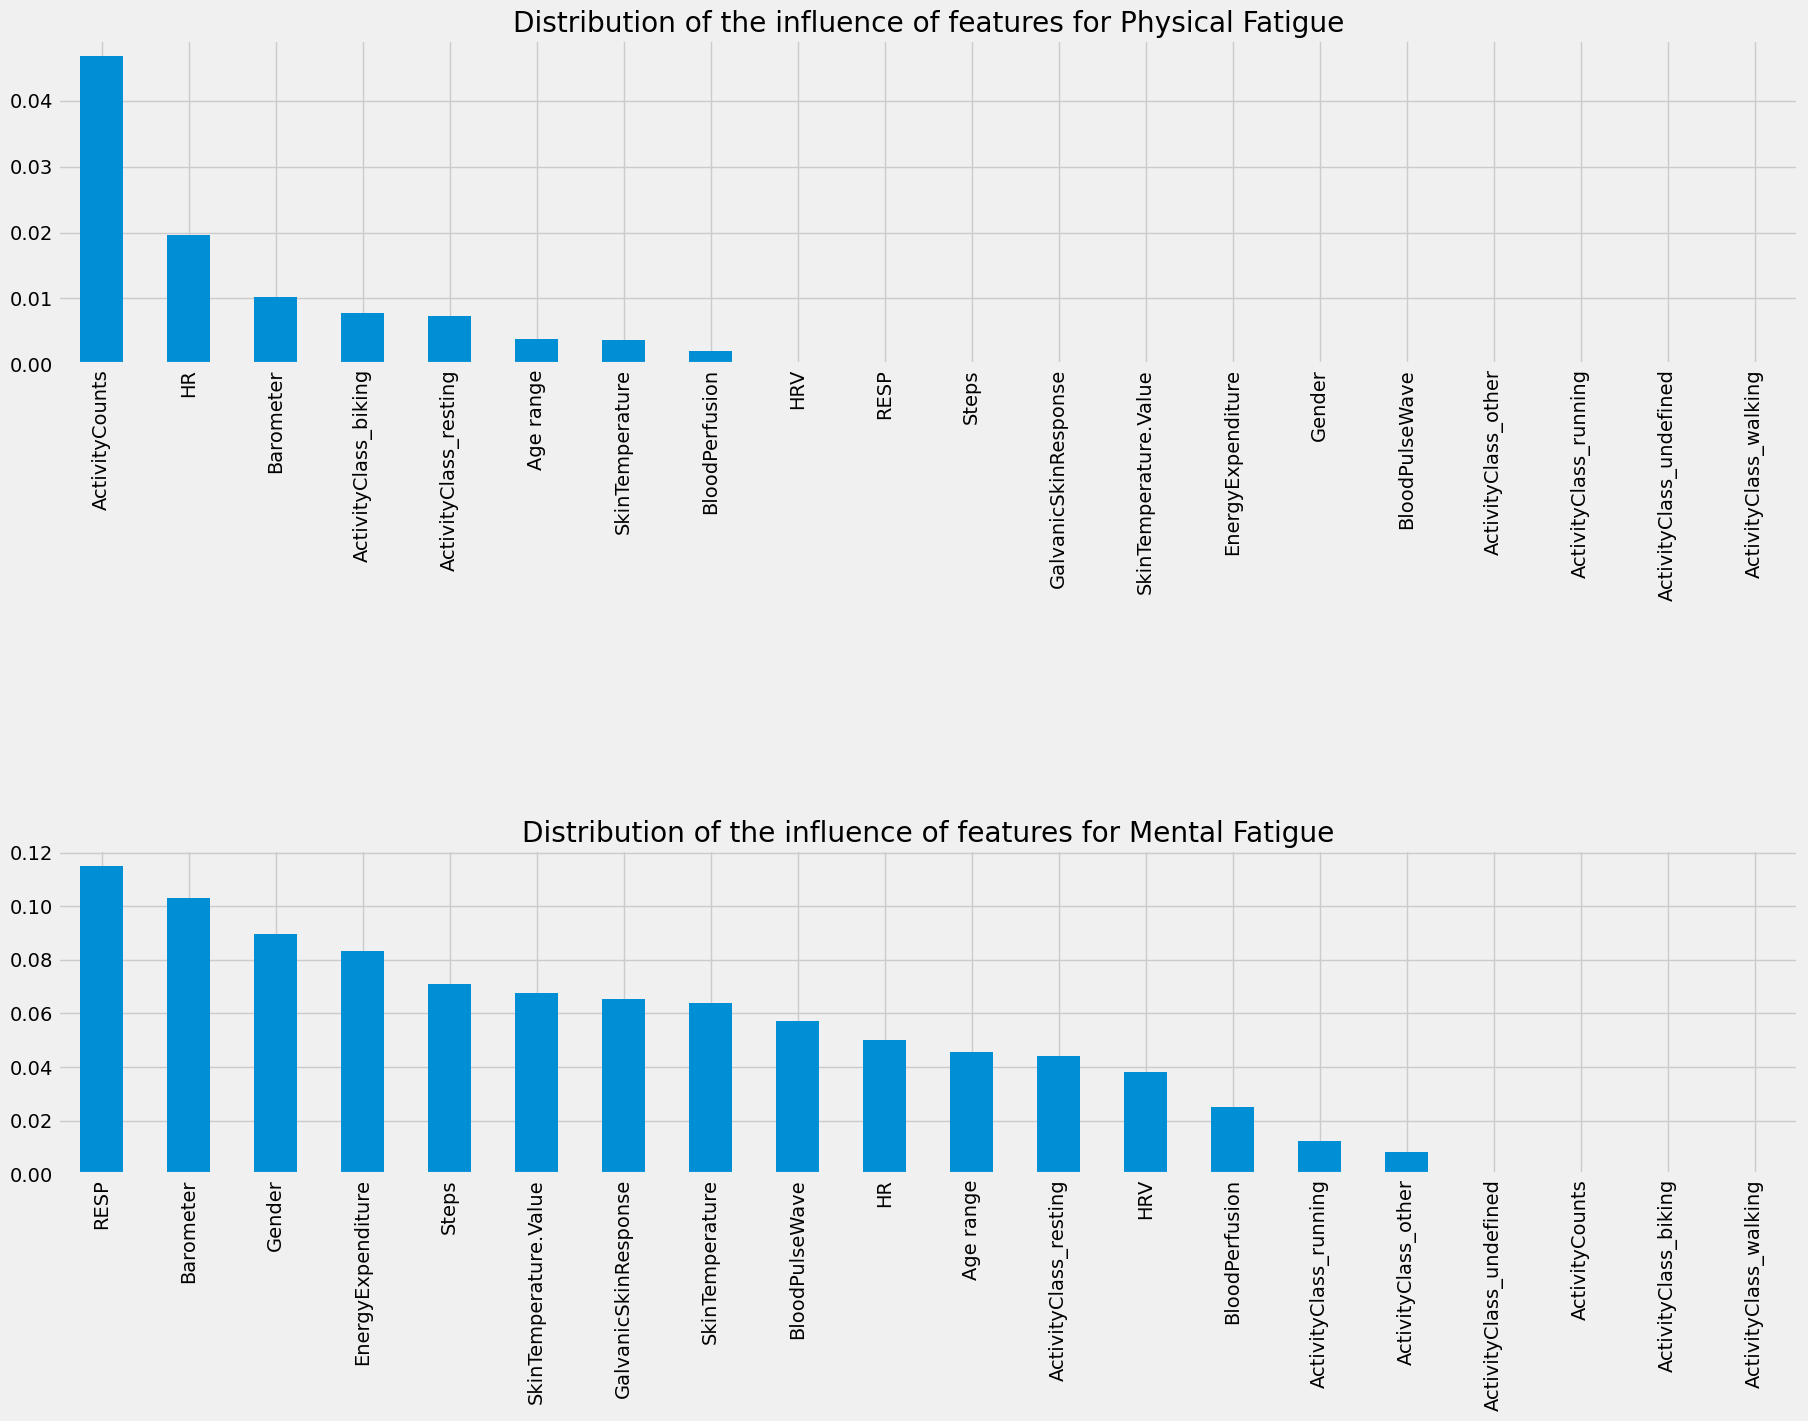

In [76]:
# Importing necessary libraries for feature selection
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Evaluate mutual information for physical fatigue
mutual_info_physical = mutual_info_regression(xtrain, y1train)
mutual_info_physical = pd.Series(mutual_info_physical)
mutual_info_physical.index = xtrain.columns

# Evaluate mutual information for mental fatigue
mutual_info_mental = mutual_info_regression(xtrain, y2train)
mutual_info_mental = pd.Series(mutual_info_mental)
mutual_info_mental.index = xtrain.columns

# Create a subplot for physical and mental fatigue
plt.figure(figsize=(20, 14))

# Subplot for physical fatigue
plt.subplot(2, 1, 1)
mutual_info_physical.sort_values(ascending=False).plot.bar()
plt.title('Distribution of the influence of features for Physical Fatigue')

# Add some space between the plots
plt.subplots_adjust(hspace=1.5)

# Subplot for mental fatigue
plt.subplot(2, 1, 2)
mutual_info_mental.sort_values(ascending=False).plot.bar()
plt.title('Distribution of the influence of features for Mental Fatigue')

plt.show()


In [ ]:
#Determine the best 10 futures from the previous chart for automatic selection for the physical Fatigue
def feature_select(X,y):
    selector = SelectKBest(mutual_info_regression,k=10)
    selector.fit(X,y)
    selected_features_mask = selector.get_support()

    selected_features = X.columns[selected_features_mask]
    return selected_features

selected_features_PH = feature_select(xtrain,y1train)
selected_features_PH

In [ ]:
#Determine the best 10 futures from the previous chart for automatic selection for the physical Fatigue
def feature_select(X,y):
    selector = SelectKBest(mutual_info_regression,k=10)
    selector.fit(X,y)
    selected_features_mask = selector.get_support()

    selected_features = X.columns[selected_features_mask]
    return selected_features

selected_features_MF = feature_select(xtrain,y2train)
selected_features_MF